Mapping: [('Q31', 'S1'),
 ('Q32', 'S2'),
 ('Q33', 'S3'),
 ('Q34Copy', 'S4'),
 ('Q34', 'S5'),
 ('Q35', 'S6'),
 ('Q36', 'S7'),
 ('Q36EXT', 'S8'),
 ('Q37', 'S9'),
 ('Q38', 'S10'),
 ('Q39', 'S11'),
 ('Q40_1', 'S12'),
 ('Q02', 'S13'),
 ('Q04_1', 'S14'),
 ('Q05', 'S15'),
 ('Q06', 'S16'),
 ('Q07', 'S17'),
 ('Q08', 'S18'),
 ('Q09', 'S19'),
 ('Q10', 'S20'),
 ('Q22', 'S21'),
 ('Q23', 'S22'),
 ('Q24', 'S23'),
 ('Q25', 'S24'),
 ('Q25EXT', 'S25'),
 ('Q26', 'S26'),
 ('Q26EXT', 'S27'),
 ('Q27', 'S28'),
 ('Q28', 'S29'),
 ('Q28EXT', 'S30'),
 ('Q29', 'S31'),
 ('Q30', 'S32'),
 ('Q11', 'S33'),
 ('Q12', 'S34'),
 ('Q13', 'S35'),
 ('Q13', 'S36'),
 ('Q14', 'S37'),
 ('Q15', 'S38'),
 ('Q16', 'S39'),
 ('Q17', 'S40'),
 ('Q17EXT', 'S41'),
 ('Q21', 'S42'),
 ('Q01', 'S43'),
 ('Q03', 'S44'),
 ('Q18', 'S45'),
 ('Q18EXT', 'S46'),
 ('Q19', 'S47'),
 ('Q20', 'S48'),
 ('Q99', 'S49'),
 ('Q100', 'S50')]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil
from textwrap import wrap
import plotly.graph_objects as go
import plotly.express as px

pd.set_option('display.max_columns', None) 

sns.set()
data = pd.read_csv("../results-survey736756.csv")
translation = pd.read_csv("../csv/sentences_translated.csv", sep=";")

In [4]:
translation

,id,text_de,text_en
0,1,Wie wichtig schätzen Sie Erkennungs- und Reakt...,How important do you consider detection and re...
1,2,Unwesentlich,Not significant
2,3,Neutral,Neutral
3,4,Wesentlich,Significant
4,5,Sehr wesentlich,Very significant
...,...,...,...
252,253,Einmalige Zahlungen,One-time payments
253,254,Einmalige Zahlungen zusätzlich eines laufenden...,One-off payments in addition to an ongoing sup...
254,255,Warum setzt Ihre Organisation diese Lizenzieru...,Why does your organization use this type of li...
255,256,Falls Sie am Gewinnspiel teilnehmen möchten hi...,If you would like to take part in the giveaway...


In [5]:
data.columns

Index(['id. Antwort ID', 'submitdate. Datum Abgeschickt',
       'lastpage. Letzte Seite', 'startlanguage. Start-Sprache',
       'seed. Zufallsgeneratorstartwert', 'token. Zugangscode',
       'startdate. Datum gestartet', 'datestamp. Datum letzte Aktivität',
       'refurl. Weiterleitungs-URL',
       'Q31. Wie wichtig schätzen Sie Erkennungs- und Reaktionssysteme ein?',
       ...
       'Q21Time. Fragenzeit: Q21',
       'groupTime13. Gruppenzeit: Ergänzende Fragen',
       'Q01Time. Fragenzeit: Q01', 'Q03Time. Fragenzeit: Q03',
       'Q18Time. Fragenzeit: Q18', 'Q18EXTTime. Fragenzeit: Q18EXT',
       'Q19Time. Fragenzeit: Q19', 'Q20Time. Fragenzeit: Q20',
       'Q99Time. Fragenzeit: Q99', 'Q100Time. Fragenzeit: Q100'],
      dtype='object', length=216)

In [6]:
import re
q_answer = {}
q_dict = {}
rename_dict = {}
for q in data.columns:
    q_id = q.split('.')[0]
    q_long = '.'.join(q.split('.')[1:]).lstrip(' ')
    match = re.match(r'^$Q(.*)\[(.*)\]$', q_long)
    if match:
        q_answer[q_id] = match.groups()[1]
        q_long = match.groups()[0]
    q_dict[q_id] = q_long
    rename_dict[q] = q_id


data.rename(columns=rename_dict, inplace=True)


In [7]:
def translate_text(source):
    for _, t in translation[['text_de', 'text_en']].iterrows():
        if source == t['text_de']:
            return t['text_en']
    return source
translate_text("Enorme")

'Enormous'

In [8]:
for key, q in q_dict.items():
    translated = 0
    multi = re.findall(r"([a-zA-Z0-9 ?-äöü/,()\.].*) \[([\w+0-9 ?-äöü/,()\.].*)\]", q)
    q = q.rstrip()
    #print(multi)
    #print(len(multi))
    for _, t in translation[['text_de', 'text_en']].iterrows():
        if q == t['text_de']:
            a = t['text_en']
            translated = 2
            break
        if len(multi) == 1:
            if multi[0][0] == t['text_de']:
                a = t['text_en']
                translated += 1
            if multi[0][1] == t['text_de']:
                b = t['text_en']
                translated += 1
                
    if translated == 2:
        if len(multi) == 1:
            q_dict[key] = f"{a} [{b}]"
        else:
            q_dict[key] = a            
        

In [9]:
q_dict.values()

dict_values(['Antwort ID', 'Datum Abgeschickt', 'Letzte Seite', 'Start-Sprache', 'Zufallsgeneratorstartwert', 'Zugangscode', 'Datum gestartet', 'Datum letzte Aktivität', 'Weiterleitungs-URL', 'How important do you consider detection and response systems?', 'Do you think the use of such a system increases the security of your organization?', 'Has the operation of detection and response systems generated benefits for your organization?', 'How would you feel if a government agency operates such a system for your organization?', 'How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?', 'Please describe why:', 'I trust a government agency regarding [Quality of operation]', 'I trust a government agency regarding [Expertise in cybersecurity]', 'I trust a government agency regarding [Compliance with data protection]', 'I trust a government agency regarding [Adherence to service level agreements]', 'I trust a government agency regard

**lastpage** - lists the page number where your respondent decided to quit the survey. To check whether he filled it out or not, see also the "completed" column

**completed** - shows whether the response is complete or not. An answer is marked as being complete if the respondent reaches the end page of your survey (by clicking the last "submit" button located on the last page of your survey). If there is an "x" in the table, then the respective response is marked as being incomplete

**timing** - this value is not displayed within the response table, however it can be seen in the response table if you choose to export the table in any format to work further with your data in other software such as sheets software, R, SPSS, etc. Shortly, it displays the time spent on each question group and on the whole survey. For further details, access timing statistics.

In [10]:
#all_questions
q_r = re.compile("^Q([0-9]{0,3})(Copy|EXT){,1}(\[(.*)\])?$") #some are missing
all_questions = list(filter(q_r.match, list(data.columns))) # Read Note below

In [11]:
for qid in all_questions:
    data[qid] = data[qid].apply(lambda x: translate_text(x))

In [19]:
import plotly.io as pio
pio.renderers.default = "notebook"  
pio.init_notebook_mode(connected=True)

AttributeError: module 'plotly.io' has no attribute 'init_notebook_mode'

# Drop of rate

In [13]:
data[all_questions].count()

Q31           110
Q32           110
Q33           110
Q34Copy       110
Q34           109
             ... 
Q19            49
Q19[other]      0
Q20            17
Q99            36
Q100            9
Length: 152, dtype: int64

In [16]:
px.line(data[all_questions].count()).show()

In [15]:
px.bar(data.value_counts("lastpage")).show()

# Filter: Attention check

In [13]:
data['Q38'].value_counts()

Q38
Very secure      92
Very insecure     8
Secure            6
No response       3
Insecure          1
Name: count, dtype: int64

In [14]:
data.value_counts("lastpage").reset_index()

,lastpage,count
0,0,86
1,5,74
2,2,20
3,3,8
4,1,3
5,4,1


In [15]:
print('ungefähres absprungverhalten (teilnehmer noch übrig)')
ud_lp = data.value_counts("lastpage").reset_index()
nw_teil = len(data)
for i in range(0,6):
    print(f'{i}: {nw_teil}')
    nw_teil = nw_teil - int(ud_lp[ud_lp['lastpage']==i]['count'])


ungefähres absprungverhalten (teilnehmer noch übrig)
0: 192
1: 106
2: 103
3: 83
4: 75
5: 74


/tmp/ipykernel_2082714/1707363669.py:6: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [16]:
usable_data = data[data['Q38'] == 'Very secure']

In [17]:
total_part = len(usable_data)
print(total_part)

92


In [18]:
ud_lp = usable_data.value_counts("lastpage").reset_index()

In [19]:
print('ungefähres absprungverhalten (teilnehmer noch übrig)')
nw_teil = total_part
for i in range(0,6):
    print(f'{i}: {nw_teil}')
    nw_teil = nw_teil - int(ud_lp[ud_lp['lastpage']==i]['count'])


ungefähres absprungverhalten (teilnehmer noch übrig)
0: 92
1: 90
2: 89
3: 70
4: 62
5: 61


/tmp/ipykernel_2082714/917107786.py:5: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



In [20]:
fig = go.Figure()
px.line(usable_data[all_questions].count()).show()

In [21]:
imporant_chi2 = ['Q33', 'Q22','Q04[1]', 'Q04[2]', 'Q04[3]', 'Q04[4]', 'Q04[5]', 'Q04[6]', 'Q06', 'Q07', 'Q08', 'Q09', 'Q10', 'Q21', 'Q25[1]', 'Q25[2]', 'Q25[3]', 'Q25[4]', 'Q25[5]', 'Q25[6]', 'Q12', 'Q23[1]', 'Q23[2]', 'Q37', 'Q39', 'Q34', 'Q34Copy', 'Q36[1]', 'Q36[2]', 'Q36[3]', 'Q36[4]', 'Q36[5]', 'Q36[6]', 'Q36[7]' ]

empfinden = ['Q31', 'Q32', 'Q33', 'Q34Copy', 'Q34', 'Q35', 'Q36[1]', 'Q36[2]', 'Q36[3]', 'Q36[4]', 'Q36[5]', 'Q36[6]', 'Q36[7]', 'Q36EXT', 'Q37', 'Q37[other]', 'Q38', 'Q39', 'Q40[1]', 'Q40[2]', 'Q40[3]', 'Q40[4]','Q40[5]', 'Q40[other]']
person = ['Q02', 'Q04[1]', 'Q04[2]', 'Q04[3]', 'Q04[4]', 'Q04[5]', 'Q04[6]', 'Q05', 'Q05[other]', 'Q06', 'Q06[other]', 'Q07', 'Q08', 'Q09', 'Q10', 'Q10[other]',]
erwartungshaltung = ['Q22', 'Q22[other]', 'Q23[1]', 'Q23[2]', 'Q24', 'Q25[1]', 'Q25[2]', 'Q25[3]', 'Q25[4]', 'Q25[5]', 'Q25[6]', 'Q25EXT', 'Q26[1]', 'Q26[2]', 'Q26[3]', 'Q26[4]', 'Q26[5]', 'Q26[6]', 'Q26[7]', 'Q26[8]', 'Q26[9]', 'Q26[10]', 'Q26[11]', 'Q26[12]', 'Q26[13]', 'Q26[14]', 'Q26[15]', 'Q26[16]', 'Q26[17]', 'Q26[18]', 'Q26[19]', 'Q26[20]', 'Q26[21]', 'Q26[22]', 'Q26[23]', 'Q26[25]', 'Q26[26]', 'Q26[27]', 'Q26[28]', 'Q26EXT', 'Q27', 'Q27[comment]', 'Q28[1]', 'Q28[2]', 'Q28[3]', 'Q28[4]', 'Q28[5]', 'Q28[6]', 'Q28[7]', 'Q28[8]', 'Q28[9]', 'Q28[10]', 'Q28[11]', 'Q28[12]', 'Q28[14]', 'Q28EXT', 'Q29', 'Q29[other]', 'Q30', 'Q30[other]',]
bestehendeloesungen = ['Q11', 'Q12', 'Q13[1][1]', 'Q13[1][2]', 'Q13[2][1]', 'Q13[2][2]', 'Q14[1]', 'Q14[2]', 'Q15[1]', 'Q15[2]', 'Q16[1]', 'Q16[2]', 'Q17[1]', 'Q17[2]', 'Q17[3]', 'Q17[4]', 'Q17[5]', 'Q17[6]', 'Q17[7]', 'Q17[8]', 'Q17[9]', 'Q17[10]', 'Q17[11]', 'Q17[12]', 'Q17EXT', 'Q21', ]
ergaezend = ['Q01', 'Q01[other]', 'Q03', 'Q03[other]', 'Q18[1]', 'Q18[2]', 'Q18[3]', 'Q18[4]', 'Q18[5]', 'Q18[6]', 'Q18[7]', 'Q18[8]', 'Q18[9]', 'Q18[10]', 'Q18[11]', 'Q18[12]', 'Q18[13]', 'Q18[14]', 'Q18[15]', 'Q18[16]', 'Q18EXT', 'Q19', 'Q19[other]', 'Q20', 'Q99', 'Q100',]

NaN = not completed, not displayed or no answer; Keine Angabe = händisch selektiert keine Angabe

In [22]:
data["Q17[3]"].value_counts()

Q17[3]
Preferred, not an exclusion criterion    25
Required, exclusion criterion            15
Irrelevant                                6
Name: count, dtype: int64

In [23]:
data[bestehendeloesungen].describe()

,Q11,Q12,Q13[1][1],Q13[1][2],Q13[2][1],Q13[2][2],Q14[1],Q14[2],Q15[1],Q15[2],Q16[1],Q16[2],Q17[1],Q17[2],Q17[3],Q17[4],Q17[5],Q17[6],Q17[7],Q17[8],Q17[9],Q17[10],Q17[11],Q17[12],Q17EXT,Q21
count,76,75,75,75,75,75,57,56,53,53,46,46,48,43,46,42,49,46,46,44,46,46,48,5,1,76
unique,4,4,6,6,6,6,3,2,3,3,5,5,3,3,3,3,3,3,2,3,3,3,3,2,1,5
top,Yes,We use them to identify potential threats and ...,Performed entirely internally (without externa...,Performed entirely internally (without externa...,Performed entirely internally (without externa...,With external support,Increase,Increase,No,No,Permanent access,Permanent access,"Preferred, not an exclusion criterion","Preferred, not an exclusion criterion","Preferred, not an exclusion criterion","Required, exclusion criterion","Required, exclusion criterion","Preferred, not an exclusion criterion","Required, exclusion criterion","Preferred, not an exclusion criterion","Required, exclusion criterion","Preferred, not an exclusion criterion","Preferred, not an exclusion criterion",Irrelevant,Datenstandort EU,No response
freq,54,29,34,29,32,26,38,37,37,22,15,12,28,22,25,22,29,30,25,30,28,24,22,4,1,20


# Functions (usable data)

In [24]:
order_dict_2 = {"Very secure":1, "Secure":2, "Insecure":3, "Very insecure":4}
order_dict_1 = {"No response":0, "Barely":1, "Neutral":2, "Strongly":3, "Fully":4}

def pr_df_info(df, q, db=True):
    x = df[q] if not isinstance(df, pd.Series) else df
    print(f"{q}: {q_dict[q]} (Total survey participants: {total_part}, active {total_part-x.isna().sum()})") if db==True else None
    print(f"No answer / not completed {x.isna().sum()} ({round(x.isna().sum()/total_part*100,2)}%)") if db==True else None

def pr_info_get_df(qid, db=True, df=usable_data, drop_nr=False):
    df = df[qid]
    if isinstance(qid, list):
        for q in qid:
            pr_df_info(df, q, db=db)
            if drop_nr:
                nr = df[q].str.contains("No response")==False
                print(f"dropping {len(df[nr==False])}) no reponse")
                df = df[nr]
    else:
        pr_df_info(df, qid, db=db)
        if drop_nr:
            nr = df.str.contains("No response")==False
            print(f"dropping {len(df[nr==False])} no reponse")
            df = df[nr]
    return df, df.isna().sum()

def df_with_unique_values(df):
    return df.value_counts().rename_axis('unique_values').reset_index(name='counts')

def df_rel_counts(df, noans):
    sum_counts = sum(df['counts'])
    df['norm'] = df['counts'].apply(lambda x: round(x/sum_counts*100,2))
    df['norm2'] = df['counts'].apply(lambda x: round(x/(sum_counts+noans)*100,2))
    
    #print(df[counts].value_counts().rename_axis('unique_values').reset_index(name='counts'))

#visualization
def print_simple_pie(qid):
    df, noans = pr_info_get_df(qid)
    df = df_with_unique_values(df)
    df_rel_counts(df, noans)

    print(df)
    px.pie(df, values="counts", names="unique_values").show()

pr_info_get_df('Q37', drop_nr=True)

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
dropping 4 no reponse


(1      Private organisation on behalf of and under th...
 2                                           Governmental
 4          Association or group (e.g. CERT, sector CERT)
 7                                           Governmental
 10     Private organisation on behalf of and under th...
                              ...                        
 175        Association or group (e.g. CERT, sector CERT)
 176                                         Governmental
 186        Association or group (e.g. CERT, sector CERT)
 188    Private organisation on behalf of and under th...
 189                                               Other:
 Name: Q37, Length: 88, dtype: object,
 0)

In [25]:
def order_achses(fig):
    fig.update_xaxes(categoryorder='array', categoryarray= ["Keine Angabe", "Kaum", "Neutral", "Stark", "Vollumfänglich"])
    return None

def update_layout(fig, grp, sort):
    if grp:
        fig.update_layout(barmode='group')
    if sort:
        fig.update_layout(xaxis={'categoryorder':'total descending'})

def print_bar_with_crosscolor(qid, qid2, type=0, order="", grp=True, sort=False):
    df, noans = pr_info_get_df([qid, qid2])

    #df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
    if type==1:
        fig = px.bar(df, x=qid2, color=qid)
    else:
        fig = px.bar(df, x=qid, color=qid2)

    update_layout(fig, grp, sort)
    fig.show()

#print_multiselection_bar('Q36', type=1)
print_bar_with_crosscolor("Q37", "Q08", type=0, sort=1)
#print_multiselection_bar('Q25', type=1, grp=False, sort=True)
#print_multiselection_bar('Q25')


Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


In [26]:
#returns A (qid) 	B (qid2) 	count 	rel_count
def get_cross_stats(qid, qid2, type=0, order="", grp=True, sort=False, db=True, df=usable_data, drop_nr=False):
    df, noans = pr_info_get_df([qid, qid2], db=db, df=df, drop_nr=drop_nr)
    #print(f"\n\nTotal no answer: max {max(noans)}, min {min(noans)}, med {noans.median()}, avg {noans.mean()}\n\n") if db==True else None
    #df = df.rename(columns={qid: "A", qid2: "B"})
    df = df.value_counts().reset_index() #.groupby([qid, qid2]).size()

    # get occurance of qid2 as dict with total[qid2] = sum(qid2)
    total = df[[qid2, 'count']].groupby(qid2).sum().to_dict()['count']

    df['rel_count'] = df.apply(lambda x: round(x['count'] / total[x[qid2]] * 100, 2), axis=1)
    df['grp_count'] = df.apply(lambda x: total[x[qid2]], axis=1)
    df['total_count'] = df.apply(lambda x: sum(total.values()), axis=1)

    display(total) if db==True else None
    display(df) if db==True else None
    return df, noans

def get_rel_stats(qid, db=True, df=usable_data, drop_nr=False):
    df, noans = pr_info_get_df(qid, db=db, df=df, drop_nr=drop_nr)    
    df = df_with_unique_values(df)
    df_rel_counts(df, noans)
    display(df) if db==True else None
    return df, noans

def migrate_multiselection(qid, db=True, df=usable_data, drop_nr=False):
    sel_col = re.findall(r"" + qid + "\[[0-9]+]", ' '.join(q_dict.keys()))
    df, noans = pr_info_get_df(sel_col, df=df, db=db, drop_nr=drop_nr)
    print(f"\n\nTotal no answer: max {max(noans)}, min {min(noans)}, med {noans.median()}, avg {noans.mean()}\n\n") if db==True else None
    #df = usable_data[sel_col]
    #noans = df.isna().sum()
    new_names=[]
    for col in sel_col:
        print(f"{col}: {q_dict[col]}") if db==True else None
        new_names += re.findall(r"[a-zA-Z0-9 ]*\[([\w+0-9 ,()-/:]*)\]", q_dict[col])
    print(new_names) if db==True else None
    new_df = df.set_axis(new_names, axis="columns")
    new_df = new_df.melt().groupby(['variable','value']).size()
    new_df = new_df.reset_index(name = 'Sizes')
    new_df = new_df.sort_values(['value'], key=lambda x: x.map(order_dict_1))
    display(new_df)  if db==True else None
    return new_df, noans

def get_bar(qid, qid2 = None, grp=True, type = 0, sort = True, color=0, x = 0, y = 0, db=True, rename=False, df=usable_data, drop_nr=False):
    if qid2:
        df, noans = get_cross_stats(qid, qid2, type=type, sort=sort, db=db, df=df, drop_nr=drop_nr)
        if rename:
            df.rename(columns={qid:q_dict[qid], qid2:q_dict[qid2]}, inplace=True)
            fig = px.bar(df, x = (q_dict[qid] if not x else x), y = ('rel_count' if not y else y), color=(q_dict[qid2] if not color else color), hover_data=["rel_count", "count", "grp_count", "total_count"])
        else:
            fig = px.bar(df, x = (qid if not x else x), y = ('rel_count' if not y else y), color=(qid2 if not color else color), hover_data=["rel_count", "count", "grp_count", "total_count"])
    else:
        sel_col = re.findall(r"" + qid + "\[[0-9]+]", ' '.join(q_dict.keys()))
        if len(sel_col) > 1:
            print("this is a multiselection question") if db==True else None
            df, noans = migrate_multiselection(qid, db=db, df=df, drop_nr=drop_nr)
            fig = px.bar(df, x = 'variable' if not x else x, y = 'Sizes' if not y else y, color='value' if not color else color)#, hover_data=["rel_count", "count", "grp_count", "total_count"])
        else:
            df, noans = get_rel_stats(qid, db=db, df=df, drop_nr=drop_nr)
            fig = px.bar(df, x='unique_values', y='counts')
        
    update_layout(fig, grp, sort)
    return fig, df, noans
    
#get_cross_stats("Q37", "Q08", type=0, sort=1)
#get_bar('Q04')[0].show()
#vis, df, _ = get_bar('Q31')

#get_bar("Q37", "Q08")[0].show()

get_bar('Q36[1]', 'Q37', drop_nr=True)[0].show()


Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
dropping 2) no reponse
Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
dropping 4) no reponse


{'Association or group (e.g. CERT, sector CERT)': 31,
 'At European / EU level': 9,
 'Governmental': 23,
 'Other:': 8,
 'Private organisation on behalf of and under the control of a government agency': 15}

,Q36[1],Q37,count,rel_count,grp_count,total_count
0,Strongly,Governmental,18,78.26,23,86
1,Neutral,"Association or group (e.g. CERT, sector CERT)",16,51.61,31,86
2,Neutral,Private organisation on behalf of and under th...,7,46.67,15,86
3,Strongly,"Association or group (e.g. CERT, sector CERT)",7,22.58,31,86
4,Barely,"Association or group (e.g. CERT, sector CERT)",5,16.13,31,86
5,Neutral,Governmental,5,21.74,23,86
6,Strongly,At European / EU level,4,44.44,9,86
7,Strongly,Private organisation on behalf of and under th...,4,26.67,15,86
8,Barely,Other:,3,37.50,8,86
9,Barely,Private organisation on behalf of and under th...,3,20.00,15,86


In [27]:
get_bar('Q22')

Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)


,unique_values,counts,norm,norm2
0,Don't know,33,45.21,35.87
1,Yes,19,26.03,20.65
2,No,14,19.18,15.22
3,Other:,4,5.48,4.35
4,No response,3,4.11,3.26


(Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'unique_values=%{x}<br>counts=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(["Don't know", 'Yes', 'No', 'Other:', 'No response'], dtype=object),
               'xaxis': 'x',
               'y': array([33, 19, 14,  4,  3]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'group',
                'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y',
                          'categoryorder': 'total descending',
                          'domain': [0.0, 1.0],
                          'title': {'text': '

In [28]:
get_bar('Q17')

this is a multiselection question
Q17[1]: How does your organization rate the importance of the following criteria when selecting your security service providers? [Head office location is in the same country as our organization] (Total survey participants: 92, active 42)
No answer / not completed 50 (54.35%)
Q17[2]: How does your organization rate the importance of the following criteria when selecting your security service providers? [At least one location in the same country as our organization] (Total survey participants: 92, active 37)
No answer / not completed 55 (59.78%)
Q17[3]: How does your organization rate the importance of the following criteria when selecting your security service providers? [The employed staff is in the same country as our organization] (Total survey participants: 92, active 40)
No answer / not completed 52 (56.52%)
Q17[4]: How does your organization rate the importance of the following criteria when selecting your security service providers? [The employed

,variable,value,Sizes
0,All personnel are security-checked,Irrelevant,5
1,All personnel are security-checked,"Preferred, not an exclusion criterion",16
2,All personnel are security-checked,"Required, exclusion criterion",21
3,At least one location in the same country as o...,Irrelevant,3
4,At least one location in the same country as o...,"Preferred, not an exclusion criterion",19
5,At least one location in the same country as o...,"Required, exclusion criterion",15
6,Data processing takes place exclusively in the...,Irrelevant,3
7,Data processing takes place exclusively in the...,"Preferred, not an exclusion criterion",20
8,Data processing takes place exclusively in the...,"Required, exclusion criterion",17
9,Head office location is in the same country as...,Irrelevant,3


(Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'value=Irrelevant<br>variable=%{x}<br>Sizes=%{y}<extra></extra>',
               'legendgroup': 'Irrelevant',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': 'Irrelevant',
               'offsetgroup': 'Irrelevant',
               'orientation': 'v',
               'showlegend': True,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['All personnel are security-checked',
                           'At least one location in the same country as our organization',
                           'Data processing takes place exclusively in the same country',
                           'Head office location is in the same country as our organization',
                           'Other (please specify):',
                           'Personal certifications (such as GIAC, CISSP, OSCP)',
                           'Special s

In [29]:
get_bar('Q37', 'Q36[1]')[0].show()

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Barely': 14, 'Fully': 5, 'Neutral': 34, 'No response': 2, 'Strongly': 37}

,Q37,Q36[1],count,rel_count,grp_count,total_count
0,Governmental,Strongly,18,48.65,37,92
1,"Association or group (e.g. CERT, sector CERT)",Neutral,16,47.06,34,92
2,"Association or group (e.g. CERT, sector CERT)",Strongly,7,18.92,37,92
3,Private organisation on behalf of and under th...,Neutral,7,20.59,34,92
4,"Association or group (e.g. CERT, sector CERT)",Barely,5,35.71,14,92
5,Governmental,Neutral,5,14.71,34,92
6,Private organisation on behalf of and under th...,Strongly,4,10.81,37,92
7,At European / EU level,Strongly,4,10.81,37,92
8,At European / EU level,Neutral,3,8.82,34,92
9,"Association or group (e.g. CERT, sector CERT)",Fully,3,60.00,5,92


# Functions for chi2

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

def chi_square_test(dataframe):
    # Creating a contingency table for the given question
    contingency_table = dataframe.pivot(index='Q08', columns='Q22', values='count').fillna(0)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

my_df = get_bar('Q22', 'Q08', db=False)[1]
#chi_square_test(my_df)
ctt = my_df.pivot(index='Q08', columns='Q22', values='count').fillna(0)
ctt = ctt.drop(['No response', 'Other:'], axis=1).drop(['No response'], axis=0)
display(ctt)
chi2, p, dof, expected = chi2_contingency(ctt)
chi2, p, dof, expected

Q22,Don't know,No,Yes
Q08,,,
"Critical infrastructure, essential facilities, operators of essential services",11.0,2.0,8.0
Important organisation according to NIS 2.0,4.0,3.0,2.0
No,8.0,7.0,3.0
Public administration and government organisations,8.0,2.0,6.0


(7.219739055780773,
 0.30100319997008557,
 6,
 array([[10.171875,  4.59375 ,  6.234375],
        [ 4.359375,  1.96875 ,  2.671875],
        [ 8.71875 ,  3.9375  ,  5.34375 ],
        [ 7.75    ,  3.5     ,  4.75    ]]))

In [31]:
from statsmodels.stats.multitest import multipletests
import itertools
#for q in itertools.permutations(all_questions_q, 2): #combinations
df_drop = {'q':['No response', 'Other:', 'Other'], 'sq':['No response', 'Other:', 'Other']}

from scipy.stats import chi2_contingency
from scipy.stats import chi2
#display(ctt)
#chi2, p, dof, expected = chi2_contingency(ctt)
#chi2, p, dof, expected

def pairwise_z_tests_wr(q, sq, drop=df_drop, alpha=0.05, method='fdr_bh', db=True, df=usable_data):
    my_df = get_bar(q, sq, db=db, df=df)
    results = pairwise_z_tests(my_df[1], q, sq, drop=drop, alpha=alpha, method=method, db=db)
    return results, my_df

def df_test_chi2_validty(df):
    if (df.values.sum() == 0) or (len(df.columns) <= 1) or (df.iloc[:, 1].sum() == 0):
        #print(f"sum or column = 0 on {question_column} {subquestion_column}")
        return False, False, False #can't go on, incorrect
        
    cellgt1 = np.all(df.iloc[:, 1] > 1) #verifies that all expected frequencies are greater than 1.
    cellmin5 = (np.sum(df.iloc[:, 1] < 5) / df.iloc[:, 1].size) <= 0.20 #ensures that no more than 20% of the expected cell frequencies are less than 5.
    return True, cellgt1, cellmin5

def pairwise_z_tests(dataframe, question_column, subquestion_column, drop=df_drop, db=True, alpha=0.05, method='fdr_bh', max_questions=20):

    for d in drop['q']:
        dataframe = dataframe[dataframe[question_column] != d]
    for d in drop['sq']:
        dataframe = dataframe[dataframe[subquestion_column] != d]

    if len(dataframe[question_column].unique()) >= max_questions:
        print("too much questions")
        print(question_column)
        print(dataframe[question_column].unique())
        return
        
    unique_answers = dataframe[question_column].unique()
    p_values = []
    comparisons = []
    
    dataframe = dataframe.pivot(index=question_column, columns=subquestion_column, values='count').fillna(0)

    for answer1, answer2 in itertools.combinations(unique_answers, 2):
        test_df = dataframe[(dataframe.index == answer1) | (dataframe.index == answer2)]
        test_df = test_df.loc[:, (test_df != 0).any(axis=0)]
        display(test_df) if db else None
        df_cor, cellgt1, cellmin5 = df_test_chi2_validty(test_df)
        if not df_cor:
            continue
        print(f"Validty checks: greater than 1 {cellgt1}, min 20% over 5 {cellmin5}")  if db else None

        stat, p, dof, expected = chi2_contingency(test_df)

        # interpret test-statistic
        prob = 1 - alpha #0.85
        critical = chi2.ppf(prob, dof)
        print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))  if db else None
        #if abs(stat) >= critical:
        # print('Dependent (reject H0)')
        #else:
        # print('Independent (fail to reject H0)')
        # interpret p-value
        #alpha = alpha #1.0 - prob
        print('significance=%.3f, p=%.3f' % (alpha, p))  if db else None
        if p <= alpha:
         print('Dependent (reject H0)')  if db else None
        else:
         print('Independent (fail to reject H0)')  if db else None
        
        p_values.append(p)
        comparisons.append((answer1, answer2, stat, p, dof, expected, critical, test_df.values.sum(), cellgt1, cellmin5, question_column, subquestion_column))

    if len(p_values) <= 1:
        return []

    # Adjust p-values for multiple comparisons using FDR-BH
    reject, corrected_pvals, _, _ = multipletests(p_values, alpha=alpha, method=method)

    return list(zip(comparisons, reject, corrected_pvals))

# https://statistikgrundlagen.de/ebook/chapter/hypothesentest-signifikanztest/
# 0,05 = significant, 0,1 = mariginal sigificant, 0,01 = hoch siginfikant, 0,001 = höchst
# https://towardsdatascience.com/why-and-how-to-adjust-p-values-in-multiple-hypothesis-testing-2ccf174cdbf8

# Example usage:
#pairwise_z_tests_wr('Q08', 'Q31', alpha=0.05)
pairwise_z_tests_wr('Q24', 'Q22', alpha=0.05)
#for comparison, reject, corrected_pval in results:
#    print(f"Comparison: {comparison}, Reject Null: {reject}, Adjusted P-Value: {corrected_pval}")


Q24: Please briefly describe in your own words why your organization would obtain these services: (Total survey participants: 92, active 24)
No answer / not completed 68 (73.91%)
Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)


{"Don't know": 8, 'No': 5, 'Other:': 3, 'Yes': 8}

,Q24,Q22,count,rel_count,grp_count,total_count
0,-,No,1,20.00,5,24
1,Auf Grund der schlanken IT Besetzung (personell),Yes,1,12.50,8,24
2,ergänzende maßnahmen zu bereits bestehenden in...,Yes,1,12.50,8,24
3,Würden wir nicht.,No,1,20.00,5,24
4,"Wäre hilfreich, wenn richtig gemacht...",Other:,1,33.33,3,24
5,Wir betreiben selbst ein SOC und sind mit den ...,No,1,20.00,5,24
6,Weil wir es brauchen,Don't know,1,12.50,8,24
7,"Um von anderen Organisationen, der staatlichen...",Yes,1,12.50,8,24
8,Staatliche Organisation,Yes,1,12.50,8,24
9,Sicherheit,Yes,1,12.50,8,24


too much questions
Q24
['- ' 'Auf Grund der schlanken IT Besetzung (personell)'
 'ergänzende maßnahmen zu bereits bestehenden internen maßnahmen '
 'Würden wir nicht.'
 'Wir betreiben selbst ein SOC und sind mit den Erkennungsfähigkeiten soweit zufrieden. Im Falle eines großen Incidents könnten wir eventuell Unterstützung bei der Response benötigen.'
 'Weil wir es brauchen'
 'Um von anderen Organisationen, der staatlichen Behörde von möglichen Angriffsszenarien zu erfahren und Tipps zur Reaktion darauf zu bekommen.'
 'Staatliche Organisation' 'Sicherheit '
 'Sammlung von Praktischer Erfahrung, Know-How Aufbau, Lehre'
 'Profit von fremden Wissen' 'N/A aus Datenschutzgründen'
 'Ist eine Behörde'
 'Ich denke man muss "Erkennung" und "Reaktion" vermischen.\nFür die "Reaktion" ist die Unerstützung einer staatlichen Stelle extrem hilfreich. \nDas Herumschnüffeln im Innenbereich der IT unter dem Deckmantel der "Erkennung" ist hinsichtlich Grundrechte extrem problematisch.\nEs gibt jahrhundert

(None,
 (Figure({
      'data': [{'alignmentgroup': 'True',
                'customdata': array([[ 1,  5, 24],
                                     [ 1,  5, 24],
                                     [ 1,  5, 24],
                                     [ 1,  5, 24],
                                     [ 1,  5, 24]]),
                'hovertemplate': ('Q22=No<br>Q24=%{x}<br>rel_coun' ... '{customdata[2]}<extra></extra>'),
                'legendgroup': 'No',
                'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
                'name': 'No',
                'offsetgroup': 'No',
                'orientation': 'v',
                'showlegend': True,
                'textposition': 'auto',
                'type': 'bar',
                'x': array(['- ', 'Würden wir nicht.',
                            'Wir betreiben selbst ein SOC und sind mit den Erkennungsfähigkeiten soweit zufrieden. Im Falle eines großen Incidents könnten wir eventuell Unterstützung bei der Response b

In [32]:
from statsmodels.stats.multitest import multipletests
import itertools
##old
def old_pairwise_z_tests(dataframe, question_column, alpha=0.05):
    unique_answers = dataframe[question_column].unique()
    p_values = []
    comparisons = []

    for answer1, answer2 in itertools.combinations(unique_answers, 2):
        count1 = dataframe[dataframe[question_column] == answer1]['count'].sum()
        count2 = dataframe[dataframe[question_column] == answer2]['count'].sum()
        n1 = dataframe['count'].sum()  # Assuming total counts are the same for all answers
        n2 = n1

        p1 = count1 / n1
        p2 = count2 / n2
        p = (count1 + count2) / (n1 + n2)
        se = np.sqrt(p * (1 - p) * (1/n1 + 1/n2))

        z_score = (p1 - p2) / se
        p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tail

        p_values.append(p_value)
        comparisons.append((answer1, answer2, p_value))

    # Adjust p-values for multiple comparisons using FDR-BH
    reject, corrected_pvals, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

    return list(zip(comparisons, reject, corrected_pvals))


# Example usage:
#results = pairwise_z_tests(my_df[my_df['Q08'] != "No response"], 'Q08')
#for comparison, reject, corrected_pval in results:
#    print(f"Comparison: {comparison}, Reject Null: {reject}, Adjusted P-Value: {corrected_pval}")


In [33]:
def summarize_responses(dataframe):
    summary = dataframe.groupby(['Q22', 'Q08'])['count'].sum().unstack()
    return summary
    
summarize_responses(my_df)

Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,No response,Public administration and government organisations
Q22,,,,,
Don't know,11.0,4.0,8.0,2.0,8.0
No,2.0,3.0,7.0,NaN,2.0
No response,1.0,NaN,NaN,1.0,1.0
Other:,NaN,NaN,2.0,2.0,NaN
Yes,8.0,2.0,3.0,NaN,6.0


In [34]:
r = re.compile("^(?!.*(EXT|other|comment|Q35|Q24|Q99)).*$")
all_questions_q = list(filter(r.match, all_questions))
all_questions_q

['Q31',
 'Q32',
 'Q33',
 'Q34Copy',
 'Q34',
 'Q36[1]',
 'Q36[2]',
 'Q36[3]',
 'Q36[4]',
 'Q36[5]',
 'Q36[6]',
 'Q36[7]',
 'Q37',
 'Q38',
 'Q39',
 'Q40[1]',
 'Q40[2]',
 'Q40[3]',
 'Q40[4]',
 'Q40[5]',
 'Q02',
 'Q04[1]',
 'Q04[2]',
 'Q04[3]',
 'Q04[4]',
 'Q04[5]',
 'Q04[6]',
 'Q05',
 'Q06',
 'Q07',
 'Q08',
 'Q09',
 'Q10',
 'Q22',
 'Q23[1]',
 'Q23[2]',
 'Q25[1]',
 'Q25[2]',
 'Q25[3]',
 'Q25[4]',
 'Q25[5]',
 'Q25[6]',
 'Q26[1]',
 'Q26[2]',
 'Q26[3]',
 'Q26[4]',
 'Q26[5]',
 'Q26[6]',
 'Q26[7]',
 'Q26[8]',
 'Q26[9]',
 'Q26[10]',
 'Q26[11]',
 'Q26[12]',
 'Q26[13]',
 'Q26[14]',
 'Q26[15]',
 'Q26[16]',
 'Q26[17]',
 'Q26[18]',
 'Q26[19]',
 'Q26[20]',
 'Q26[21]',
 'Q26[22]',
 'Q26[23]',
 'Q26[25]',
 'Q26[26]',
 'Q26[27]',
 'Q26[28]',
 'Q27',
 'Q28[1]',
 'Q28[2]',
 'Q28[3]',
 'Q28[4]',
 'Q28[5]',
 'Q28[6]',
 'Q28[7]',
 'Q28[8]',
 'Q28[9]',
 'Q28[10]',
 'Q28[11]',
 'Q28[12]',
 'Q28[14]',
 'Q29',
 'Q30',
 'Q11',
 'Q12',
 'Q13[1][1]',
 'Q13[1][2]',
 'Q13[2][1]',
 'Q13[2][2]',
 'Q14[1]',
 'Q14[2]',
 '

In [35]:
def test_phi(question_column, subquestion_column, alpha=0.05, drop=df_drop, db=False, df=usable_data):
    df = get_bar(question_column, subquestion_column, db=db, df=df)[1]
    test_phi_df(df, question_column, subquestion_column, alpha=alpha, drop=drop, db=db)
    
def test_phi_df(df, question_column, subquestion_column, alpha=0.05, drop=df_drop, db=False):
    dataframe = df
    for d in drop['q']:
        dataframe = dataframe[dataframe[question_column] != d]
    for d in drop['sq']:
        dataframe = dataframe[dataframe[subquestion_column] != d]
    dataframe = dataframe.pivot(index=question_column, columns=subquestion_column, values='count').fillna(0)
    #print(dataframe)
    

    df_cor, g1, g5 = df_test_chi2_validty(dataframe)
    if not df_cor:
        print(f"sum or column = 0 on {question_column} {subquestion_column}")
        return
    
    #test_df = dataframe[(dataframe.index == answer1) | (dataframe.index == answer2)]
    #test_df = test_df.loc[:, (test_df != 0).any(axis=0)]
    #display(test_df)
    stat, p, dof, expected = chi2_contingency(dataframe)
    display(dataframe) if db==True else None
    if p <= alpha:
        #print(f"{question_column} {q_dict[question_column]}")
        print(f"\n\n{subquestion_column} {q_dict[subquestion_column] if subquestion_column in q_dict.keys() else subquestion_column}, {stat}, {p}, N {dataframe.values.sum()}, ('{question_column}', '{subquestion_column}') g1 {g1} g5 {g5}")
    elif db==True:
        print(f"\n\nNOT {subquestion_column} {q_dict[subquestion_column] if subquestion_column in q_dict.keys() else subquestion_column}, {stat}, {p}, N {dataframe.values.sum()}, ('{question_column}', '{subquestion_column}') g1 {g1} g5 {g5}")

def pr_pairwise_z_test(a_pair, alpha):
    a_print = False
    for t in a_pair[0]:
        p = t[0][3]
        a1 = t[0][0]
        a2 = t[0][1]
        cp = t[2]
        n = t[0][7]
        g1 = t[0][8]
        g5 = t[0][9]
        q = t[0][10]
        sq = t[0][11]
        if cp <= alpha:
            print(f"{a1} || VS || {a2} | {p} | cor_p {cp} | N {n} | G1 {g1} | G5 {g5} | ('{q}', '{sq}')")
            a_print=True
            
    #a_pair[1][0].show() if a_print else None

def test_against_all_odds(tq, alpha=0.05, skip=[], quest=all_questions_q, db=False, df=usable_data):    
    for q in quest:
        if q == tq:
            continue
        if q in skip:
            continue
        test_phi(tq, q, alpha=alpha, db=db, df=df)
        pr_pairwise_z_test(pairwise_z_tests_wr(tq, q, db=db, alpha=alpha, df=df), alpha)
        pr_pairwise_z_test(pairwise_z_tests_wr(q, tq, db=db, alpha=alpha, df=df), alpha)

        #break

test_against_all_odds('Q08')#, skip='Q25[6]')

#pairwise_z_tests_wr('Q08','Q25[6]')



Q33 Has the operation of detection and response systems generated benefits for your organization?, 26.15811989867717, 0.010194219403450428, N 72.0, ('Q08', 'Q33') g1 False g5 False
Critical infrastructure, essential facilities, operators of essential services || VS || No | 0.007317407991048121 | cor_p 0.021952223973144364 | N 46.0 | G1 False | G5 False | ('Q08', 'Q33')
Critical infrastructure, essential facilities, operators of essential services || VS || Public administration and government organisations | 0.0046338177163879135 | cor_p 0.021952223973144364 | N 39.0 | G1 False | G5 False | ('Q08', 'Q33')


Q36[5] I trust a government agency regarding [National cooperation], 21.263386536516734, 0.011530916466284078, N 80.0, ('Q08', 'Q36[5]') g1 True g5 False
Critical infrastructure, essential facilities, operators of essential services || VS || No | 0.005582130797419308 | cor_p 0.03349278478451585 | N 49.0 | G1 True | G5 False | ('Q08', 'Q36[5]')
Strongly || VS || Neutral | 0.00791737

In [36]:
pairwise_z_tests_wr('Q08', 'Q17[10]', method='fdr_bh')#, drop={'q':['No response'], 'sq':['Other:']}, alpha=0.05) #pairwise_z_tests_wr('Q31', 'Q36[1]')

Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
Q17[10]: How does your organization rate the importance of the following criteria when selecting your security service providers? [Data processing takes place exclusively in the same country] (Total survey participants: 92, active 40)
No answer / not completed 52 (56.52%)


{'Irrelevant': 3,
 'Preferred, not an exclusion criterion': 20,
 'Required, exclusion criterion': 17}

,Q08,Q17[10],count,rel_count,grp_count,total_count
0,"Critical infrastructure, essential facilities,...","Preferred, not an exclusion criterion",10,50.00,20,40
1,Public administration and government organisat...,"Required, exclusion criterion",8,47.06,17,40
2,No,"Preferred, not an exclusion criterion",6,30.00,20,40
3,"Critical infrastructure, essential facilities,...","Required, exclusion criterion",3,17.65,17,40
4,Public administration and government organisat...,"Preferred, not an exclusion criterion",3,15.00,20,40
5,Important organisation according to NIS 2.0,"Required, exclusion criterion",2,11.76,17,40
6,No,Irrelevant,2,66.67,3,40
7,No,"Required, exclusion criterion",2,11.76,17,40
8,No response,"Required, exclusion criterion",2,11.76,17,40
9,Important organisation according to NIS 2.0,Irrelevant,1,33.33,3,40


Q17[10],"Preferred, not an exclusion criterion","Required, exclusion criterion"
Q08,,
"Critical infrastructure, essential facilities, operators of essential services",10.0,3.0
Public administration and government organisations,3.0,8.0


Validty checks: greater than 1 True, min 20% over 5 False
probability=0.950, critical=3.841, stat=4.085
significance=0.050, p=0.043
Dependent (reject H0)


Q17[10],Irrelevant,"Preferred, not an exclusion criterion","Required, exclusion criterion"
Q08,,,
"Critical infrastructure, essential facilities, operators of essential services",0.0,10.0,3.0
No,2.0,6.0,2.0


Validty checks: greater than 1 True, min 20% over 5 True
probability=0.950, critical=5.991, stat=2.857
significance=0.050, p=0.240
Independent (fail to reject H0)


Q17[10],Irrelevant,"Preferred, not an exclusion criterion","Required, exclusion criterion"
Q08,,,
"Critical infrastructure, essential facilities, operators of essential services",0.0,10.0,3.0
Important organisation according to NIS 2.0,1.0,1.0,2.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=5.991, stat=5.278
significance=0.050, p=0.071
Independent (fail to reject H0)


Q17[10],Irrelevant,"Preferred, not an exclusion criterion","Required, exclusion criterion"
Q08,,,
No,2.0,6.0,2.0
Public administration and government organisations,0.0,3.0,8.0


Validty checks: greater than 1 True, min 20% over 5 False
probability=0.950, critical=5.991, stat=6.567
significance=0.050, p=0.037
Dependent (reject H0)


Q17[10],Irrelevant,"Preferred, not an exclusion criterion","Required, exclusion criterion"
Q08,,,
Important organisation according to NIS 2.0,1.0,1.0,2.0
Public administration and government organisations,0.0,3.0,8.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=5.991, stat=2.983
significance=0.050, p=0.225
Independent (fail to reject H0)


Q17[10],Irrelevant,"Preferred, not an exclusion criterion","Required, exclusion criterion"
Q08,,,
Important organisation according to NIS 2.0,1.0,1.0,2.0
No,2.0,6.0,2.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=5.991, stat=1.633
significance=0.050, p=0.442
Independent (fail to reject H0)


([(('Critical infrastructure, essential facilities, operators of essential services',
    'Public administration and government organisations',
    4.085480952613819,
    0.04325313996761941,
    1,
    array([[7.04166667, 5.95833333],
           [5.95833333, 5.04166667]]),
    3.841458820694124,
    24.0,
    True,
    False,
    'Q08',
    'Q17[10]'),
   False,
   0.12975941990285825),
  (('Critical infrastructure, essential facilities, operators of essential services',
    'No',
    2.8573076923076925,
    0.23963128579663975,
    2,
    array([[1.13043478, 9.04347826, 2.82608696],
           [0.86956522, 6.95652174, 2.17391304]]),
    5.991464547107979,
    23.0,
    True,
    True,
    'Q08',
    'Q17[10]'),
   False,
   0.2875575429559677),
  (('Critical infrastructure, essential facilities, operators of essential services',
    'Important organisation according to NIS 2.0',
    5.278321678321678,
    0.07142117827223914,
    2,
    array([[0.76470588, 8.41176471, 3.82352941],
  

# RQ0: Additional questions
   * [Q02/S2] › **Age group**
   * [Q04/S2] › **Does your education relate to one or more of the following areas?**
   * [Q05/S2] › **In which country is your organization based?**
   * [Q06/S2] › **What position do you currently hold in your current organisation?**
   * [Q08/S2] › **Does your organization fall into any of the following categories?**
   * [Q09/S2] › **How many people work in your organisation?**
   * [Q10/S2] › **In which industry do you work?**
   * [Q07/S2] › **How would you rate your knowledge in the area of detect and response systems?**



In [37]:

display(get_bar('Q06', db=False)[1])
background=get_bar('Q04', db=False)[1]
display(background[background['value']=='Yes'])
display(get_bar('Q08', db=False)[1])
display(get_bar('Q05', db=False)[1])
display(get_bar('Q07', db=False)[1])
display(get_bar('Q10', db=False)[1])

,unique_values,counts,norm,norm2
0,Employee with decision-making authority in the...,37,41.57,40.22
1,Employee,35,39.33,38.04
2,No response,7,7.87,7.61
3,Other:,5,5.62,5.43
4,Management Board,5,5.62,5.43


,variable,value,Sizes
1,IT Security,Yes,65
3,Information Technology,Yes,57
5,Law,Yes,11
7,No response,Yes,4
9,Sociology,Yes,1
11,Technology,Yes,49


,unique_values,counts,norm,norm2
0,"Critical infrastructure, essential facilities,...",26,29.21,28.26
1,No,25,28.09,27.17
2,Public administration and government organisat...,20,22.47,21.74
3,Important organisation according to NIS 2.0,12,13.48,13.04
4,No response,6,6.74,6.52


,unique_values,counts,norm,norm2
0,Austria,79,88.76,85.87
1,Germany,8,8.99,8.70
2,Hungary,2,2.25,2.17


,unique_values,counts,norm,norm2
0,Knowledgeable,36,40.45,39.13
1,Slightly knowledgeable,19,21.35,20.65
2,Average knowledgeable,18,20.22,19.57
3,Expert,13,14.61,14.13
4,No response,2,2.25,2.17
5,No knowledge,1,1.12,1.09


,unique_values,counts,norm,norm2
0,Telecommunications & IT,20,22.47,21.74
1,"Economy & Politics (Public Administration, Def...",12,13.48,13.04
2,"Finance, Insurance & Real Estate",9,10.11,9.78
3,Other:,9,10.11,9.78
4,"Society (Education, Research, Law, …)",7,7.87,7.61
5,No response,6,6.74,6.52
6,Schools,4,4.49,4.35
7,Energy & Environment,4,4.49,4.35
8,Transport & Logistics,3,3.37,3.26
9,Chemicals & Raw Materials,3,3.37,3.26


# RQ1: Motivations & Perceptions
**Importance of threat detection & response**

* [Q31][S1] › How important do you consider detection and response systems?
* [Q32][S1] › Do you think the use of such a system increases the security of your organization?
* [Q33][S1] › Has the operation of detection and response systems generated benefits for your organization?

**General participation and why**

* [Q22][S3] › Would your organization participate in a government-provided detection and response system?
* [Q24][S3/O] › Please briefly describe in your own words why your organization would obtain these services:

**Expectations of the system**

* [Q25][S3/O] › What does your organization expect to gain from such a system?
* [Q25EXT][S3/O] › Other (please specify):


## Importance of threat detection & response
**Importance of threat detection & response**

* [Q31][S1] › How important do you consider detection and response systems?
* [Q32][S1] › Do you think the use of such a system increases the security of your organization?
* [Q33][S1] › Has the operation of detection and response systems generated benefits for your organization?

### Q31

In [38]:
get_bar('Q31')[0].show() 

Q31: How important do you consider detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,Very significant,71,77.17,77.17
1,Significant,18,19.57,19.57
2,Neutral,2,2.17,2.17
3,Not significant,1,1.09,1.09


In [39]:
test_against_all_odds('Q31')



Q32 Do you think the use of such a system increases the security of your organization?, 128.19510763769608, 2.7865910466871913e-23, N 92.0, ('Q31', 'Q32') g1 False g5 False
Very significant || VS || Significant | 0.001193163255797802 | cor_p 0.0017897448836967028 | N 89.0 | G1 True | G5 True | ('Q31', 'Q32')
Very significant || VS || Neutral | 0.00011442753729091679 | cor_p 0.00022885507458183358 | N 73.0 | G1 False | G5 False | ('Q31', 'Q32')
Very significant || VS || Not significant | 1.5919004802620466e-15 | cor_p 9.55140288157228e-15 | N 72.0 | G1 False | G5 False | ('Q31', 'Q32')
Significant || VS || Neutral | 0.008298614824955013 | cor_p 0.009958337789946016 | N 20.0 | G1 False | G5 False | ('Q31', 'Q32')
Significant || VS || Not significant | 7.485182988770041e-05 | cor_p 0.00022455548966310123 | N 19.0 | G1 False | G5 False | ('Q31', 'Q32')
Very significant || VS || Significant | 0.0008039739658035065 | cor_p 0.0012059609487052598 | N 89.0 | G1 True | G5 False | ('Q32', 'Q31'

In [40]:
adj_alpha=0.2
nq = ('Q31', 'Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})



Q08 Does your organization fall into any of the following categories?, 11.676300699300699, 0.06959220079537101, N 83.0, ('Q31', 'Q08') g1 False g5 False
Very significant || VS || Significant | 0.16468730435303566 | cor_p 0.16468730435303566 | N 81.0 | G1 True | G5 False | ('Q31', 'Q08')
Very significant || VS || Neutral | 0.10309177201807374 | cor_p 0.16468730435303566 | N 68.0 | G1 False | G5 False | ('Q31', 'Q08')
Significant || VS || Neutral | 0.14227165051289536 | cor_p 0.16468730435303566 | N 17.0 | G1 False | G5 False | ('Q31', 'Q08')


In [41]:
adj_alpha=0.2
nq = ('Q09', 'Q31')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha)



Q31 How important do you consider detection and response systems?, 16.222872001222697, 0.18124005197288892, N 86.0, ('Q09', 'Q31') g1 False g5 False
> 249 || VS || 2 - 9 | 0.021044055843554996 | cor_p 0.10522027921777498 | N 63.0 | G1 True | G5 False | ('Q09', 'Q31')
50 – 249 || VS || 2 - 9 | 0.00874228804671897 | cor_p 0.0874228804671897 | N 20.0 | G1 False | G5 False | ('Q09', 'Q31')


In [42]:
# checked Q02, Q05, Q06, ...
get_bar('Q31', 'Q09')[0].show()

Q31: How important do you consider detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q09: How many people work in your organisation? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'1': 1,
 '10 – 49': 6,
 '2 - 9': 4,
 '50 – 249': 16,
 '> 249': 59,
 'No response': 3}

,Q31,Q09,count,rel_count,grp_count,total_count
0,Very significant,> 249,47,79.66,59,89
1,Very significant,50 – 249,14,87.50,16,89
2,Significant,> 249,10,16.95,59,89
3,Very significant,10 – 49,4,66.67,6,89
4,Significant,2 - 9,3,75.00,4,89
5,Very significant,No response,3,100.00,3,89
6,Neutral,> 249,2,3.39,59,89
7,Significant,10 – 49,2,33.33,6,89
8,Not significant,50 – 249,1,6.25,16,89
9,Significant,50 – 249,1,6.25,16,89


In [43]:
# checked Q02, Q05, Q06
get_bar('Q31', 'Q08')[0].show()

Q31: How important do you consider detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 26,
 'Important organisation according to NIS 2.0': 12,
 'No': 25,
 'No response': 6,
 'Public administration and government organisations': 20}

,Q31,Q08,count,rel_count,grp_count,total_count
0,Very significant,"Critical infrastructure, essential facilities,...",24,92.31,26,89
1,Very significant,No,17,68.00,25,89
2,Very significant,Public administration and government organisat...,15,75.00,20,89
3,Very significant,Important organisation according to NIS 2.0,10,83.33,12,89
4,Significant,No,8,32.00,25,89
5,Very significant,No response,4,66.67,6,89
6,Significant,Public administration and government organisat...,3,15.00,20,89
7,Neutral,Public administration and government organisat...,2,10.00,20,89
8,Significant,"Critical infrastructure, essential facilities,...",2,7.69,26,89
9,Significant,Important organisation according to NIS 2.0,2,16.67,12,89


In [44]:
# checked Q02, Q05, Q06
get_bar('Q31', 'Q10')[0].show()

Q31: How important do you consider detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q10: In which industry do you work? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Chemicals & Raw Materials': 3,
 'Construction': 3,
 'Economy & Politics (Public Administration, Defense, ...)': 12,
 'Energy & Environment': 4,
 'Finance, Insurance & Real Estate': 9,
 'Internet': 2,
 'Media': 1,
 'Metal & Electronics': 3,
 'No response': 6,
 'Other:': 9,
 'Pharmaceuticals & Health': 2,
 'Schools': 4,
 'Services & Crafts': 1,
 'Society (Education, Research, Law, …)': 7,
 'Telecommunications & IT': 20,
 'Transport & Logistics': 3}

,Q31,Q10,count,rel_count,grp_count,total_count
0,Very significant,Telecommunications & IT,14,70.00,20,89
1,Very significant,"Economy & Politics (Public Administration, Def...",9,75.00,12,89
2,Very significant,"Finance, Insurance & Real Estate",8,88.89,9,89
3,Very significant,Other:,7,77.78,9,89
4,Very significant,No response,6,100.00,6,89
5,Significant,Telecommunications & IT,6,30.00,20,89
6,Very significant,"Society (Education, Research, Law, …)",5,71.43,7,89
7,Very significant,Energy & Environment,4,100.00,4,89
8,Very significant,Construction,3,100.00,3,89
9,Very significant,Schools,3,75.00,4,89


### Q32

In [45]:
get_bar('Q32')[0].show() #MARKER2

Q32: Do you think the use of such a system increases the security of your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,Very significant,48,52.17,52.17
1,Significant,41,44.57,44.57
2,Neutral,2,2.17,2.17
3,Not significant,1,1.09,1.09


In [46]:
test_against_all_odds('Q32', quest=imporant_chi2)



Q33 Has the operation of detection and response systems generated benefits for your organization?, 22.229047640812347, 0.035031494015264966, N 76.0, ('Q32', 'Q33') g1 False g5 False


Q25[2] What does your organization expect to gain from such a system? [A better overview of the current threat situation in the sector and across sectors], 13.184310562934854, 0.04020067912203081, N 52.0, ('Q32', 'Q25[2]') g1 False g5 False
Significant || VS || Not significant | 0.002504707460918487 | cor_p 0.015028244765510923 | N 25.0 | G1 False | G5 False | ('Q32', 'Q25[2]')
Very significant || VS || Not significant | 0.0019498555228451184 | cor_p 0.011699133137070711 | N 26.0 | G1 False | G5 False | ('Q32', 'Q25[3]')


Q23[1] Which of the following services would your organization obtain? [Detection], 4.695833333333333, 0.030235833508345057, N 46, ('Q32', 'Q23[1]') g1 True g5 True


Q36[4] I trust a government agency regarding [Adherence to service level agreements], 17.27178861788618, 0.04462605864

In [47]:
get_bar('Q32', 'Q04[4]')[0].show()

Q32: Do you think the use of such a system increases the security of your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q04[4]: Does your education relate to one or more of the following areas? [IT Security] (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'No': 24, 'Yes': 65}

,Q32,Q04[4],count,rel_count,grp_count,total_count
0,Very significant,Yes,38,58.46,65,89
1,Significant,Yes,24,36.92,65,89
2,Significant,No,15,62.50,24,89
3,Very significant,No,9,37.50,24,89
4,Neutral,Yes,2,3.08,65,89
5,Not significant,Yes,1,1.54,65,89


In [48]:
# q21 (wenig antworten), Q11, ...
get_bar('Q32', 'Q06')[0].show()

Q32: Do you think the use of such a system increases the security of your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q06: What position do you currently hold in your current organisation? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Employee': 35,
 'Employee with decision-making authority in the area of IT security': 37,
 'Management Board': 5,
 'No response': 7,
 'Other:': 5}

,Q32,Q06,count,rel_count,grp_count,total_count
0,Very significant,Employee with decision-making authority in the...,22,59.46,37,89
1,Significant,Employee,19,54.29,35,89
2,Very significant,Employee,16,45.71,35,89
3,Significant,Employee with decision-making authority in the...,13,35.14,37,89
4,Very significant,No response,6,85.71,7,89
5,Significant,Other:,4,80.00,5,89
6,Very significant,Management Board,3,60.00,5,89
7,Neutral,Employee with decision-making authority in the...,2,5.41,37,89
8,Significant,Management Board,2,40.00,5,89
9,Not significant,Other:,1,20.00,5,89


In [49]:
# q21 (wenig antworten), Q11, ..
get_bar('Q32', 'Q08')[0].show()

Q32: Do you think the use of such a system increases the security of your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 26,
 'Important organisation according to NIS 2.0': 12,
 'No': 25,
 'No response': 6,
 'Public administration and government organisations': 20}

,Q32,Q08,count,rel_count,grp_count,total_count
0,Very significant,"Critical infrastructure, essential facilities,...",16,61.54,26,89
1,Very significant,No,13,52.00,25,89
2,Significant,No,12,48.00,25,89
3,Significant,Public administration and government organisat...,10,50.00,20,89
4,Significant,"Critical infrastructure, essential facilities,...",9,34.62,26,89
5,Very significant,Public administration and government organisat...,9,45.00,20,89
6,Very significant,Important organisation according to NIS 2.0,7,58.33,12,89
7,Significant,Important organisation according to NIS 2.0,5,41.67,12,89
8,Significant,No response,3,50.00,6,89
9,Very significant,No response,2,33.33,6,89


In [50]:
get_bar('Q32', 'Q11')[0].show()

Q32: Do you think the use of such a system increases the security of your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q11: Does your organization already deal with detection and response? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


{"Don't know": 6, 'No': 5, 'No response': 4, 'Yes': 48}

,Q32,Q11,count,rel_count,grp_count,total_count
0,Very significant,Yes,25,52.08,48,63
1,Significant,Yes,20,41.67,48,63
2,Significant,Don't know,3,50.00,6,63
3,Significant,No response,3,75.00,4,63
4,Very significant,Don't know,3,50.00,6,63
5,Very significant,No,3,60.00,5,63
6,Neutral,Yes,2,4.17,48,63
7,Significant,No,2,40.00,5,63
8,Not significant,Yes,1,2.08,48,63
9,Very significant,No response,1,25.00,4,63


### Q33

In [51]:
get_bar('Q33')[0].show()

Q33: Has the operation of detection and response systems generated benefits for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,Significant,34,36.96,36.96
1,Very significant,22,23.91,23.91
2,No response,16,17.39,17.39
3,We do not use such systems,9,9.78,9.78
4,Neutral,8,8.70,8.70
5,Not significant,3,3.26,3.26


In [52]:
get_bar('Q25',db=False)[1]

,variable,value,Sizes
0,A better internal exchange,Desirable,23
1,A better internal exchange,Irrelevant,11
2,A better internal exchange,Very important,15
3,A better overview of the current threat situat...,Desirable,17
4,A better overview of the current threat situat...,Irrelevant,4
5,A better overview of the current threat situat...,Very important,31
6,Access to cost-effective threat intelligence f...,Desirable,24
7,Access to cost-effective threat intelligence f...,Irrelevant,5
8,Access to cost-effective threat intelligence f...,Very important,21
9,Additional external expertise,Desirable,20


In [53]:
pltq31 = get_bar('Q31',db=False)[1][['unique_values','counts']].rename({'unique_values':'value', 'counts':'Sizes'}, axis=1)
pltq31['variable'] = 'Importance of Detect & Response'
display(pltq31)
pltq32 = get_bar('Q32',db=False)[1][['unique_values','counts']].rename({'unique_values':'value', 'counts':'Sizes'}, axis=1)
pltq32['variable'] = 'Perceived Increase of Security'
display(pltq32)
pltq33 = get_bar('Q33',db=False)[1][['unique_values','counts']].rename({'unique_values':'value', 'counts':'Sizes'}, axis=1).replace(
    {'We do not use such systems':'Not in use', 'No response':'Not disclosed'})
pltq33['variable'] = 'Benefits for the Org.'
display(pltq33)

,value,Sizes,variable
0,Very significant,71,Importance of Detect & Response
1,Significant,18,Importance of Detect & Response
2,Neutral,2,Importance of Detect & Response
3,Not significant,1,Importance of Detect & Response


,value,Sizes,variable
0,Very significant,48,Perceived Increase of Security
1,Significant,41,Perceived Increase of Security
2,Neutral,2,Perceived Increase of Security
3,Not significant,1,Perceived Increase of Security


,value,Sizes,variable
0,Significant,34,Benefits for the Org.
1,Very significant,22,Benefits for the Org.
2,Not disclosed,16,Benefits for the Org.
3,Not in use,9,Benefits for the Org.
4,Neutral,8,Benefits for the Org.
5,Not significant,3,Benefits for the Org.


value,Neutral,Not disclosed,Not in use,Not significant,Significant,Very significant
variable,,,,,,
Benefits for the Org.,8.0,16.0,9.0,3.0,34.0,22.0
Importance of Detect & Response,2.0,0.0,0.0,1.0,18.0,71.0
Perceived Increase of Security,2.0,0.0,0.0,1.0,41.0,48.0


['Benefits for the Org.', 'Importance of Detect & Response', 'Perceived Increase of Security']


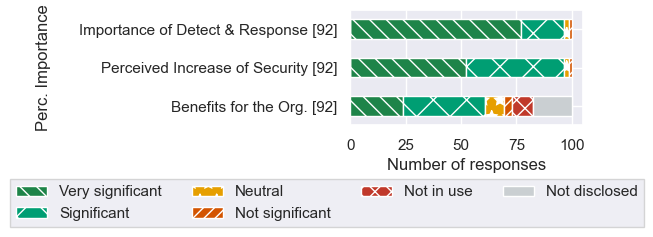

In [54]:
plot_data = pd.concat([pltq31, pltq32, pltq33])
# Pivot the data to get a matrix form suitable for a stacked bar chart
pivot_data = plot_data.pivot(index='variable', columns='value', values='Sizes').fillna(0)

display(pivot_data)
print(list(pivot_data.index))

pivot_data.index = pivot_data.index.to_series().apply(lambda x: f'{x} [{int(pivot_data.loc[x].sum())}]')

# Convert counts to percentages for a 100% stacked bar chart
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Sorting the risks based on the 'Enormous' category for emphasis
pivot_data_sorted = pivot_data_percentage.sort_values(by='Very significant', ascending=True)

# Plotting with a colorblind-friendly palette and patterns
patterns = ['\\\\', 'x', '*', '///', 'xx']  # Patterns for Low, High, Enormous, No response
colors = ['#1e8449','#009e73', '#e69f00', '#d35400', '#c0392b', '#cacfd2']  # Colorblind-friendly palette
fig, ax = plt.subplots(figsize=(3, 1.5))
pivot_data_sorted[['Very significant', 'Significant', 'Neutral', 'Not significant', 'Not in use', 'Not disclosed']].plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.xlabel('Number of responses')
plt.ylabel('Perc. Importance', labelpad=20)
#plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
#plt.subplots_adjust(left=0.3)  # Adjust the left margin
#plt.title('Requested Functionality by Organizational Representatives')

pl = []
for p in patterns:
    pl += [p] * len(pivot_data)

# Adding patterns to the bars
bars = ax.patches
for bar, pattern in zip(bars, pl):
    bar.set_hatch(pattern)

plt.legend(bbox_to_anchor=(-0.1, -0.4), loc='upper center', ncol=4, fancybox=False, shadow=False)

# Save the plot as an SVG
#plt.tight_layout()

plt.savefig('imprtance_of_ti_dodged_bar_chart.pdf', format='pdf', bbox_inches='tight')

In [55]:
get_bar('Q33','Q04[4]')[0].show()

Q33: Has the operation of detection and response systems generated benefits for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q04[4]: Does your education relate to one or more of the following areas? [IT Security] (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'No': 24, 'Yes': 65}

,Q33,Q04[4],count,rel_count,grp_count,total_count
0,Significant,Yes,22,33.85,65,89
1,Very significant,Yes,18,27.69,65,89
2,Significant,No,12,50.00,24,89
3,No response,Yes,11,16.92,65,89
4,Neutral,Yes,8,12.31,65,89
5,Very significant,No,4,16.67,24,89
6,We do not use such systems,No,4,16.67,24,89
7,We do not use such systems,Yes,4,6.15,65,89
8,No response,No,3,12.50,24,89
9,Not significant,Yes,2,3.08,65,89


In [56]:
adj_alpha=0.2
nq = ('Q33','Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

get_bar('Q33','Q08')[0].show()



Q08 Does your organization fall into any of the following categories?, 26.15811989867717, 0.010194219403450428, N 72.0, ('Q33', 'Q08') g1 False g5 False
Significant || VS || We do not use such systems | 0.0306248752493728 | cor_p 0.07656218812343199 | N 42.0 | G1 False | G5 False | ('Q33', 'Q08')
Very significant || VS || We do not use such systems | 0.028057468916897522 | cor_p 0.07656218812343199 | N 27.0 | G1 False | G5 False | ('Q33', 'Q08')
Very significant || VS || Neutral | 0.012029009745288399 | cor_p 0.07656218812343199 | N 27.0 | G1 False | G5 False | ('Q33', 'Q08')
Very significant || VS || Not significant | 0.02284492750530411 | cor_p 0.07656218812343199 | N 22.0 | G1 False | G5 False | ('Q33', 'Q08')
Q33: Has the operation of detection and response systems generated benefits for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08: Does your organization fall into any of the following categories? (Total survey participants:

{'Critical infrastructure, essential facilities, operators of essential services': 26,
 'Important organisation according to NIS 2.0': 12,
 'No': 25,
 'No response': 6,
 'Public administration and government organisations': 20}

,Q33,Q08,count,rel_count,grp_count,total_count
0,Significant,"Critical infrastructure, essential facilities,...",15,57.69,26,89
1,Very significant,"Critical infrastructure, essential facilities,...",9,34.62,26,89
2,Significant,No,8,32.00,25,89
3,Significant,Public administration and government organisat...,7,35.00,20,89
4,We do not use such systems,No,6,24.00,25,89
5,Very significant,Important organisation according to NIS 2.0,5,41.67,12,89
6,No response,Public administration and government organisat...,5,25.00,20,89
7,Significant,Important organisation according to NIS 2.0,4,33.33,12,89
8,Neutral,Public administration and government organisat...,4,20.00,20,89
9,Very significant,No,4,16.00,25,89


In [57]:
adj_alpha=0.05
nq = ('Q08', 'Q33')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})



Q33 Has the operation of detection and response systems generated benefits for your organization?, 26.15811989867717, 0.010194219403450428, N 72.0, ('Q08', 'Q33') g1 False g5 False
Critical infrastructure, essential facilities, operators of essential services || VS || No | 0.007317407991048121 | cor_p 0.021952223973144364 | N 46.0 | G1 False | G5 False | ('Q08', 'Q33')
Critical infrastructure, essential facilities, operators of essential services || VS || Public administration and government organisations | 0.0046338177163879135 | cor_p 0.021952223973144364 | N 39.0 | G1 False | G5 False | ('Q08', 'Q33')


## General participation and why

* [Q22][S3] › Would your organization participate in a government-provided detection and response system?
* [Q24][S3/O] › Please briefly describe in your own words why your organization would obtain these services:





### Q22

In [58]:
get_bar('Q22')[0].show()

Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)


,unique_values,counts,norm,norm2
0,Don't know,33,45.21,35.87
1,Yes,19,26.03,20.65
2,No,14,19.18,15.22
3,Other:,4,5.48,4.35
4,No response,3,4.11,3.26


In [59]:
list(usable_data[usable_data['Q22[other]'].notna()]['Q22[other]']) 

['abhängig von Kosten, Professionalität und Einfachheit ',
 'Vermutlich ja',
 'Aus meiner Sicht auf keinen Fall',
 'Aus meiner Persönlich Sicht NEIN']

In [60]:
test_against_all_odds('Q22')



Q34Copy How would you feel if a government agency operates such a system for your organization?, 31.54607378129117, 1.99338635015946e-05, N 62.0, ('Q22', 'Q34Copy') g1 False g5 False
Don't know || VS || No | 4.536033947908697e-05 | cor_p 0.00013608101843726091 | N 44.0 | G1 False | G5 False | ('Q22', 'Q34Copy')
Yes || VS || No | 0.00015815510485395881 | cor_p 0.00023723265728093824 | N 32.0 | G1 False | G5 False | ('Q22', 'Q34Copy')
Secure || VS || Insecure | 0.007984674952019663 | cor_p 0.015969349904039327 | N 43.0 | G1 False | G5 False | ('Q34Copy', 'Q22')
Secure || VS || Very insecure | 2.1462245735174147e-06 | cor_p 1.2877347441104489e-05 | N 31.0 | G1 False | G5 False | ('Q34Copy', 'Q22')
Very insecure || VS || Very secure | 0.0004342530553763542 | cor_p 0.0013027591661290627 | N 19.0 | G1 False | G5 False | ('Q34Copy', 'Q22')


Q34 How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?, 21.689714606381276, 0.0013780

In [61]:
get_bar('Q22', 'Q34')[0].show()
get_bar('Q34', 'Q22')[0].show()
get_bar('Q22', 'Q34Copy')[0].show()
get_bar('Q34Copy', 'Q22')[0].show()

Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)
Q34: How would you feel if a commercial agency operated such a service for your organisation on behalf of the government? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Insecure': 17,
 'No response': 7,
 'Secure': 30,
 'Very insecure': 13,
 'Very secure': 6}

,Q22,Q34,count,rel_count,grp_count,total_count
0,Don't know,Secure,13,43.33,30,73
1,Yes,Secure,11,36.67,30,73
2,Don't know,Insecure,10,58.82,17,73
3,No,Very insecure,8,61.54,13,73
4,Don't know,No response,5,71.43,7,73
5,Yes,Insecure,3,17.65,17,73
6,Yes,Very secure,3,50.00,6,73
7,No,Secure,3,10.00,30,73
8,No,Insecure,3,17.65,17,73
9,Don't know,Very secure,3,50.00,6,73


Q34: How would you feel if a commercial agency operated such a service for your organisation on behalf of the government? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)


{"Don't know": 33, 'No': 14, 'No response': 3, 'Other:': 4, 'Yes': 19}

,Q34,Q22,count,rel_count,grp_count,total_count
0,Secure,Don't know,13,39.39,33,73
1,Secure,Yes,11,57.89,19,73
2,Insecure,Don't know,10,30.30,33,73
3,Very insecure,No,8,57.14,14,73
4,No response,Don't know,5,15.15,33,73
5,Secure,No,3,21.43,14,73
6,Very secure,Don't know,3,9.09,33,73
7,Insecure,No,3,21.43,14,73
8,Very secure,Yes,3,15.79,19,73
9,Insecure,Yes,3,15.79,19,73


Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)
Q34Copy: How would you feel if a government agency operates such a system for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Insecure': 20,
 'No response': 5,
 'Secure': 27,
 'Very insecure': 10,
 'Very secure': 11}

,Q22,Q34Copy,count,rel_count,grp_count,total_count
0,Don't know,Secure,15,55.56,27,73
1,Don't know,Insecure,8,40.00,20,73
2,Yes,Secure,8,29.63,27,73
3,No,Insecure,7,35.00,20,73
4,No,Very insecure,7,70.00,10,73
5,Don't know,Very secure,6,54.55,11,73
6,Yes,Insecure,5,25.00,20,73
7,Yes,Very secure,5,45.45,11,73
8,Don't know,No response,3,60.00,5,73
9,No response,Secure,2,7.41,27,73


Q34Copy: How would you feel if a government agency operates such a system for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)


{"Don't know": 33, 'No': 14, 'No response': 3, 'Other:': 4, 'Yes': 19}

,Q34Copy,Q22,count,rel_count,grp_count,total_count
0,Secure,Don't know,15,45.45,33,73
1,Insecure,Don't know,8,24.24,33,73
2,Secure,Yes,8,42.11,19,73
3,Insecure,No,7,50.00,14,73
4,Very insecure,No,7,50.00,14,73
5,Very secure,Don't know,6,18.18,33,73
6,Insecure,Yes,5,26.32,19,73
7,Very secure,Yes,5,26.32,19,73
8,No response,Don't know,3,9.09,33,73
9,Secure,No response,2,66.67,3,73


In [62]:
get_bar('Q22', 'Q06')[0].show()

Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)
Q06: What position do you currently hold in your current organisation? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Employee': 31,
 'Employee with decision-making authority in the area of IT security': 30,
 'Management Board': 3,
 'No response': 4,
 'Other:': 5}

,Q22,Q06,count,rel_count,grp_count,total_count
0,Don't know,Employee with decision-making authority in the...,15,50.00,30,73
1,Don't know,Employee,14,45.16,31,73
2,Yes,Employee,10,32.26,31,73
3,No,Employee with decision-making authority in the...,8,26.67,30,73
4,Yes,Employee with decision-making authority in the...,6,20.00,30,73
5,No,Employee,4,12.90,31,73
6,Don't know,No response,2,50.00,4,73
7,Don't know,Other:,2,40.00,5,73
8,No response,Employee,2,6.45,31,73
9,Other:,Other:,1,20.00,5,73


In [63]:
my_df = get_bar('Q22', 'Q08')[1]

Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 22,
 'Important organisation according to NIS 2.0': 9,
 'No': 20,
 'No response': 5,
 'Public administration and government organisations': 17}

,Q22,Q08,count,rel_count,grp_count,total_count
0,Don't know,"Critical infrastructure, essential facilities,...",11,50.00,22,73
1,Don't know,No,8,40.00,20,73
2,Yes,"Critical infrastructure, essential facilities,...",8,36.36,22,73
3,Don't know,Public administration and government organisat...,8,47.06,17,73
4,No,No,7,35.00,20,73
5,Yes,Public administration and government organisat...,6,35.29,17,73
6,Don't know,Important organisation according to NIS 2.0,4,44.44,9,73
7,No,Important organisation according to NIS 2.0,3,33.33,9,73
8,Yes,No,3,15.00,20,73
9,No,"Critical infrastructure, essential facilities,...",2,9.09,22,73


### Q24 / Freitext

In [216]:
colwidth=20
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q24'].notna()]['Q24'])

49     Wäre hilfreich, ...
50     Auf Grund der sc...
56     Staatliche Organ...
57        Ist eine Behörde
62     Profit von fremd...
66     N/A aus Datensch...
68     Für den Informat...
73     Bundesheer muss ...
77     meine Organisati...
78     ergänzende maßna...
84             Sicherheit 
90     Da es im Bundesh...
101    Sammlung von Pra...
104    Bessere Erkennun...
122    Weil wir es brau...
141    Ich denke man mu...
144    Durch den massiv...
147    Aus meiner persö...
154    Bei einem Incide...
156    Informationen vo...
157                     - 
176    Um von anderen O...
185      Würden wir nicht.
189    Wir betreiben se...
Name: Q24, dtype: object

In [217]:

with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q24'].notna()][['Q22', 'Q24']]) # 'Q35', 
# trennen staatlich / priavte aussagen; dann cluster/gruppen finden

,Q22,Q24
49,Other:,"Wäre hilfreich, ..."
50,Yes,Auf Grund der sc...
56,Yes,Staatliche Organ...
57,Yes,Ist eine Behörde
62,Don't know,Profit von fremd...
66,No,N/A aus Datensch...
68,Don't know,Für den Informat...
73,Yes,Bundesheer muss ...
77,Yes,meine Organisati...
78,Yes,ergänzende maßna...


## Expectations of the system

* [Q25][S3/O] › What does your organization expect to gain from such a system?
* [Q25EXT][S3/O] › Other (please specify):

### Q25

In [67]:

get_bar('Q25', grp=True)[0].show()

this is a multiselection question
Q25[1]: What does your organization expect to gain from such a system? [A better internal exchange] (Total survey participants: 92, active 49)
No answer / not completed 43 (46.74%)
Q25[2]: What does your organization expect to gain from such a system? [A better overview of the current threat situation in the sector and across sectors] (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)
Q25[3]: What does your organization expect to gain from such a system? [Additional external expertise] (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)
Q25[4]: What does your organization expect to gain from such a system? [An additional communication platform for rapid exchange with other affected organizations] (Total survey participants: 92, active 50)
No answer / not completed 42 (45.65%)
Q25[5]: What does your organization expect to gain from such a system? [Access to cost-effective threat intelligence fee

,variable,value,Sizes
0,A better internal exchange,Desirable,23
1,A better internal exchange,Irrelevant,11
2,A better internal exchange,Very important,15
3,A better overview of the current threat situat...,Desirable,17
4,A better overview of the current threat situat...,Irrelevant,4
5,A better overview of the current threat situat...,Very important,31
6,Access to cost-effective threat intelligence f...,Desirable,24
7,Access to cost-effective threat intelligence f...,Irrelevant,5
8,Access to cost-effective threat intelligence f...,Very important,21
9,Additional external expertise,Desirable,20


5
15


<Figure size 1200x800 with 0 Axes>

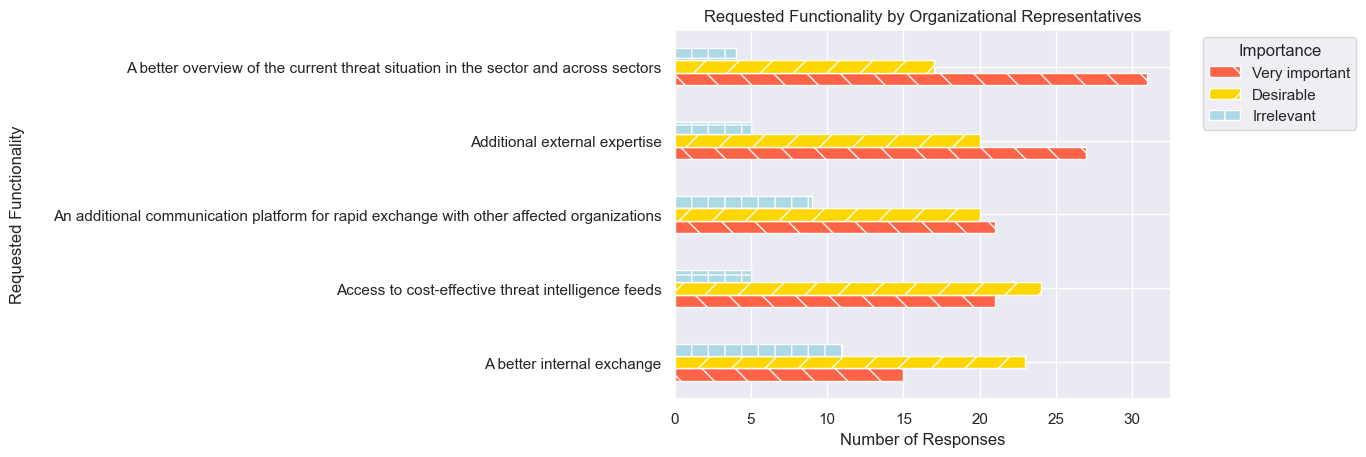

In [68]:
##fig q25
plot_data = get_bar('Q25',db=False)[1]
plot_data = plot_data[plot_data['variable']!='Other (please specify):']

# Pivot the data to get a matrix form suitable for a stacked bar chart
pivot_data = plot_data.pivot(index='variable', columns='value', values='Sizes').fillna(0)

# Sorting the risks based on the 'Enormous' category for emphasis
pivot_data_sorted = pivot_data.sort_values(by='Very important', ascending=True)

# Plotting
patterns = [ '\\', '/', '+']  #'/',
plt.figure(figsize=(12, 8))
ax = pivot_data_sorted[['Very important', 'Desirable', 'Irrelevant']].plot(kind='barh', stacked=False, color=['#ff6347', '#ffd700', '#add8e6'])

print(len(pivot_data_sorted))
print(len(ax.patches))

for bar, pattern in zip(ax.patches, [patterns[0]] * len(pivot_data_sorted) + [patterns[1]] * len(pivot_data_sorted) + [patterns[2]] * len(pivot_data_sorted)):

    bar.set_hatch(pattern)

plt.xlabel('Number of Responses')
plt.ylabel('Requested Functionality', labelpad=20)
#plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
#plt.subplots_adjust(left=0.3)  # Adjust the left margin
plt.title('Requested Functionality by Organizational Representatives')
plt.legend(title='Importance', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an SVG
#plt.tight_layout()

plt.savefig('participant_motivation_dodged_bar_chart.pdf', format='pdf', bbox_inches='tight')


value,Desirable,Irrelevant,Very important
variable,,,
A better internal exchange,23,11,15
A better overview of the current threat situation in the sector and across sectors,17,4,31
Access to cost-effective threat intelligence feeds,24,5,21
Additional external expertise,20,5,27
An additional communication platform for rapid exchange with other affected organizations,20,9,21


['A better internal exchange', 'A better overview of the current threat situation in the sector and across sectors', 'Access to cost-effective threat intelligence feeds', 'Additional external expertise', 'An additional communication platform for rapid exchange with other affected organizations']


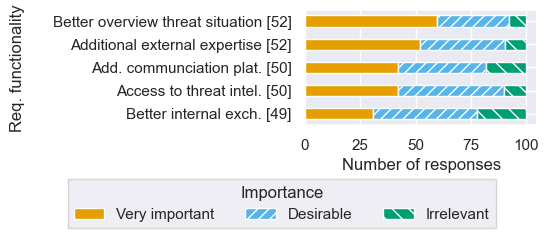

In [69]:
plot_data = get_bar('Q25',db=False)[1]
plot_data = plot_data[plot_data['variable']!='Other (please specify):']

# Pivot the data to get a matrix form suitable for a stacked bar chart
pivot_data = plot_data.pivot(index='variable', columns='value', values='Sizes').fillna(0)

display(pivot_data)
print(list(pivot_data.index))

pivot_data = pivot_data.rename(index={'A better internal exchange':'Better internal exch.', 
                                      'A better overview of the current threat situation in the sector and across sectors':'Better overview threat situation', 
                                      'Access to cost-effective threat intelligence feeds':'Access to threat intel.', 
                                      'Additional external expertise':'Additional external expertise', 
                                      'An additional communication platform for rapid exchange with other affected organizations':'Add. communciation plat.'
})
pivot_data.index = pivot_data.index.to_series().apply(lambda x: f'{x} [{pivot_data.loc[x].sum()}]')

# Convert counts to percentages for a 100% stacked bar chart
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Sorting the risks based on the 'Enormous' category for emphasis
pivot_data_sorted = pivot_data_percentage.sort_values(by='Very important', ascending=True)

# Plotting with a colorblind-friendly palette and patterns
patterns = ['', '///', '\\\\', 'xx']  # Patterns for Low, High, Enormous, No response
colors = ['#e69f00', '#56b4e9', '#009e73', '#f0e442']  # Colorblind-friendly palette
fig, ax = plt.subplots(figsize=(3, 1.5))
pivot_data_sorted[['Very important', 'Desirable', 'Irrelevant']].plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.xlabel('Number of responses')
plt.ylabel('Req. functionality', labelpad=20)
#plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
#plt.subplots_adjust(left=0.3)  # Adjust the left margin
#plt.title('Requested Functionality by Organizational Representatives')

pl = []
for p in patterns:
    pl += [p] * len(pivot_data)

# Adding patterns to the bars
bars = ax.patches
for bar, pattern in zip(bars, pl):
    bar.set_hatch(pattern)

plt.legend(title='Importance', bbox_to_anchor=(-0.1, -0.4), loc='upper center', ncol=4, fancybox=False, shadow=False)

# Save the plot as an SVG
#plt.tight_layout()

plt.savefig('participant_motivation_dodged_bar_chart.pdf', format='pdf', bbox_inches='tight')

In [70]:

adj_alpha=0.4
nq = ('Q08', 'Q25[1]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})



Q25[1] What does your organization expect to gain from such a system? [A better internal exchange], 10.016346069389549, 0.12396533672317087, N 47.0, ('Q08', 'Q25[1]') g1 False g5 False
Public administration and government organisations || VS || No | 0.0413666042095955 | cor_p 0.24819962525757303 | N 26.0 | G1 False | G5 False | ('Q08', 'Q25[1]')


In [218]:
print("other")
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q25EXT'].notna()]['Q25EXT']) 

other


49     Automatische Inc...
156    Es wäre Wünschen...
Name: Q25EXT, dtype: object

## Understanding:
What is the understanding of the actual protective function of such solutions? (The aim is to evaluate a flawed mental model) Do companies have an accurate understanding of what such a system is and what is is capable of?**

**Self-assessment of understanding**

* [Q07][S2] › How would you rate your knowledge in the area of detect and response systems?

**Understanding of these systems**

* [Q12][S4] › Which of the following answers is most likely to apply to detection and response systems in your organization?

### Q07 / Q12

In [72]:
get_bar('Q07')[0].show()

Q07: How would you rate your knowledge in the area of detect and response systems? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


,unique_values,counts,norm,norm2
0,Knowledgeable,36,40.45,39.13
1,Slightly knowledgeable,19,21.35,20.65
2,Average knowledgeable,18,20.22,19.57
3,Expert,13,14.61,14.13
4,No response,2,2.25,2.17
5,No knowledge,1,1.12,1.09


In [73]:
get_bar('Q12')[0].show()

Q12: Which of the following answers is most likely to apply to detection and response systems in your organization? (Total survey participants: 92, active 62)
No answer / not completed 30 (32.61%)


,unique_values,counts,norm,norm2
0,We use them to identify potential threats and ...,27,43.55,29.35
1,We use them to prevent attackers from penetrat...,18,29.03,19.57
2,We use them to detect attackers on our systems...,15,24.19,16.30
3,We use them to minimize the risk of our backup...,2,3.23,2.17


In [74]:
#make table for flawed mental model, test against all odds

In [75]:
get_bar('Q12', 'Q07')[0].show()

Q12: Which of the following answers is most likely to apply to detection and response systems in your organization? (Total survey participants: 92, active 62)
No answer / not completed 30 (32.61%)
Q07: How would you rate your knowledge in the area of detect and response systems? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Average knowledgeable': 12,
 'Expert': 9,
 'Knowledgeable': 28,
 'No response': 1,
 'Slightly knowledgeable': 12}

,Q12,Q07,count,rel_count,grp_count,total_count
0,We use them to identify potential threats and ...,Knowledgeable,13,46.43,28,62
1,We use them to detect attackers on our systems...,Knowledgeable,9,32.14,28,62
2,We use them to prevent attackers from penetrat...,Slightly knowledgeable,7,58.33,12,62
3,We use them to identify potential threats and ...,Average knowledgeable,6,50.00,12,62
4,We use them to prevent attackers from penetrat...,Knowledgeable,5,17.86,28,62
5,We use them to detect attackers on our systems...,Average knowledgeable,4,33.33,12,62
6,We use them to identify potential threats and ...,Expert,4,44.44,9,62
7,We use them to identify potential threats and ...,Slightly knowledgeable,4,33.33,12,62
8,We use them to prevent attackers from penetrat...,Expert,4,44.44,9,62
9,We use them to prevent attackers from penetrat...,Average knowledgeable,2,16.67,12,62


# RQ2: Needs and considerations
**Which services would be from interest**

* [Q23][S3] › Which of the following services would your organization obtain?

**What are the requirements for participation**

* [Q26][S3/O] › What would be the requirements for your organization to participate?
* [Q26EXT][S3/O] › Other (please specify):
* [Q27][S3] › **Achtung, Q26**; Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?

**Selection criteria of MSSPs (general)**

* [Q17][S4/O] › How does your organization rate the importance of the following criteria when selecting your security service providers?
* [Q17EXT][S4/O] › Other (please specify):

**Where should the Other (please specify):operation take place**

* [Q37][S1] › Where should the operation of the detection and response systems be based?

**Where should the data be located**

* [Q29][S3] › Where should data processing and data storage take place?
* [Q30][S3] › How should access to this data be regulated?

<span style="font-size:larger;">***Maybe relevant:***</span>

**How does data management currently work?**

* [Q15][S4/O] › Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)?
* [Q16][S4/O] › How is access to security-relevant data (e.g. log and detection data) by service providers regulated?

## Which services would be from interest

* [Q23][S3] › Which of the following services would your organization obtain?


### Q23

In [76]:
debug=False
get_bar('Q23')[0].show()

this is a multiselection question
Q23[1]: Which of the following services would your organization obtain? [Detection] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q23[2]: Which of the following services would your organization obtain? [Response] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)


Total no answer: max 31, min 31, med 31.0, avg 31.0


Q23[1]: Which of the following services would your organization obtain? [Detection]
Q23[2]: Which of the following services would your organization obtain? [Response]
['Detection', 'Response']


,variable,value,Sizes
1,Detection,No response,15
4,Response,No response,14
0,Detection,Full implementation,16
2,Detection,Supporting activities,30
3,Response,Full implementation,12
5,Response,Supporting activities,35


In [77]:
test_against_all_odds('Q23[2]')

sum or column = 0 on Q23[2] Q38
sum or column = 0 on Q23[2] Q40[5]


Q23[1] Which of the following services would your organization obtain? [Detection], 14.369730862775215, 0.00015019743513485385, N 43, ('Q23[2]', 'Q23[1]') g1 True g5 False
sum or column = 0 on Q23[2] Q25[6]


Q26[5] What would be the requirements for your organization to participate? [High system performance (e.g. coverage of all offices, all bandwidths, all end devices)], 6.146921182266009, 0.04626078786288957, N 37.0, ('Q23[2]', 'Q26[5]') g1 True g5 False


Q28[7] What would be potential concerns / security risks? [Vulnerabilities and security risks of the solution itself], 7.546875, 0.02297295786002387, N 42.0, ('Q23[2]', 'Q28[7]') g1 True g5 True


Q17[9] How does your organization rate the importance of the following criteria when selecting your security service providers? [Special service level agreement (availability and response, e.g. 24/7)], 6.666666666666666, 0.0356739933472524, N 28.0, ('Q23[2]', 'Q17[9]') 

In [78]:
get_bar('Q23')[0].show()

this is a multiselection question
Q23[1]: Which of the following services would your organization obtain? [Detection] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q23[2]: Which of the following services would your organization obtain? [Response] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)


Total no answer: max 31, min 31, med 31.0, avg 31.0


Q23[1]: Which of the following services would your organization obtain? [Detection]
Q23[2]: Which of the following services would your organization obtain? [Response]
['Detection', 'Response']


,variable,value,Sizes
1,Detection,No response,15
4,Response,No response,14
0,Detection,Full implementation,16
2,Detection,Supporting activities,30
3,Response,Full implementation,12
5,Response,Supporting activities,35


In [79]:
get_bar('Q23[1]', 'Q07')[0].show()

Q23[1]: Which of the following services would your organization obtain? [Detection] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q07: How would you rate your knowledge in the area of detect and response systems? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Average knowledgeable': 15,
 'Expert': 5,
 'Knowledgeable': 26,
 'No response': 1,
 'Slightly knowledgeable': 14}

,Q23[1],Q07,count,rel_count,grp_count,total_count
0,Supporting activities,Knowledgeable,15,57.69,26,61
1,Supporting activities,Average knowledgeable,9,60.00,15,61
2,Full implementation,Knowledgeable,6,23.08,26,61
3,Full implementation,Average knowledgeable,5,33.33,15,61
4,Full implementation,Slightly knowledgeable,5,35.71,14,61
5,No response,Knowledgeable,5,19.23,26,61
6,No response,Slightly knowledgeable,5,35.71,14,61
7,Supporting activities,Slightly knowledgeable,4,28.57,14,61
8,No response,Expert,3,60.00,5,61
9,Supporting activities,Expert,2,40.00,5,61


In [80]:
get_bar('Q23[2]', 'Q07')[0].show()

Q23[2]: Which of the following services would your organization obtain? [Response] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q07: How would you rate your knowledge in the area of detect and response systems? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Average knowledgeable': 15,
 'Expert': 6,
 'Knowledgeable': 26,
 'No response': 1,
 'Slightly knowledgeable': 13}

,Q23[2],Q07,count,rel_count,grp_count,total_count
0,Supporting activities,Knowledgeable,16,61.54,26,61
1,Supporting activities,Average knowledgeable,11,73.33,15,61
2,Supporting activities,Slightly knowledgeable,6,46.15,13,61
3,Full implementation,Knowledgeable,5,19.23,26,61
4,No response,Knowledgeable,5,19.23,26,61
5,Full implementation,Slightly knowledgeable,4,30.77,13,61
6,No response,Expert,4,66.67,6,61
7,Full implementation,Average knowledgeable,3,20.00,15,61
8,No response,Slightly knowledgeable,3,23.08,13,61
9,Supporting activities,Expert,2,33.33,6,61


In [81]:
get_bar('Q23[1]', 'Q11')[0].show() #y='count'

Q23[1]: Which of the following services would your organization obtain? [Detection] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q11: Does your organization already deal with detection and response? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


{"Don't know": 6, 'No': 5, 'No response': 4, 'Yes': 37}

,Q23[1],Q11,count,rel_count,grp_count,total_count
0,Supporting activities,Yes,18,48.65,37,52
1,Full implementation,Yes,10,27.03,37,52
2,No response,Yes,9,24.32,37,52
3,Supporting activities,Don't know,5,83.33,6,52
4,No response,No response,3,75.00,4,52
5,Full implementation,No,2,40.00,5,52
6,No response,No,2,40.00,5,52
7,Full implementation,Don't know,1,16.67,6,52
8,Supporting activities,No,1,20.00,5,52
9,Supporting activities,No response,1,25.00,4,52


In [82]:
get_bar('Q23[2]', 'Q11')[0].show() #y='count'

Q23[2]: Which of the following services would your organization obtain? [Response] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q11: Does your organization already deal with detection and response? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


{"Don't know": 6, 'No': 5, 'No response': 4, 'Yes': 38}

,Q23[2],Q11,count,rel_count,grp_count,total_count
0,Supporting activities,Yes,21,55.26,38,53
1,No response,Yes,9,23.68,38,53
2,Full implementation,Yes,8,21.05,38,53
3,Supporting activities,Don't know,4,66.67,6,53
4,Supporting activities,No,4,80.00,5,53
5,No response,No response,3,75.00,4,53
6,Full implementation,Don't know,2,33.33,6,53
7,No response,No,1,20.00,5,53
8,Supporting activities,No response,1,25.00,4,53


In [83]:
get_bar('Q23[1]', 'Q21')[0].show() #y='count'

Q23[1]: Which of the following services would your organization obtain? [Detection] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q21: How many years has your organization been involved in the implementation and enhancement of such systems? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


{'4 – 6': 10, '< 3': 12, '> 7': 10, 'No response': 15, 'Not yet': 5}

,Q23[1],Q21,count,rel_count,grp_count,total_count
0,No response,No response,6,40.00,15,52
1,Supporting activities,< 3,6,50.00,12,52
2,Supporting activities,> 7,6,60.00,10,52
3,Supporting activities,No response,5,33.33,15,52
4,Full implementation,No response,4,26.67,15,52
5,Supporting activities,4 – 6,4,40.00,10,52
6,Supporting activities,Not yet,4,80.00,5,52
7,Full implementation,4 – 6,3,30.00,10,52
8,Full implementation,< 3,3,25.00,12,52
9,Full implementation,> 7,3,30.00,10,52


In [84]:
get_bar('Q23[2]', 'Q22')[0].show() #y='count'

Q23[2]: Which of the following services would your organization obtain? [Response] (Total survey participants: 92, active 61)
No answer / not completed 31 (33.7%)
Q22: Would your organization participate in a government-provided detection and response system? (Total survey participants: 92, active 73)
No answer / not completed 19 (20.65%)


{"Don't know": 31, 'No': 6, 'No response': 3, 'Other:': 2, 'Yes': 19}

,Q23[2],Q22,count,rel_count,grp_count,total_count
0,Supporting activities,Don't know,18,58.06,31,61
1,Supporting activities,Yes,11,57.89,19,61
2,No response,Don't know,9,29.03,31,61
3,Full implementation,Yes,7,36.84,19,61
4,Full implementation,Don't know,4,12.90,31,61
5,Supporting activities,No,4,66.67,6,61
6,No response,No,2,33.33,6,61
7,No response,No response,2,66.67,3,61
8,Supporting activities,Other:,2,100.00,2,61
9,Full implementation,No response,1,33.33,3,61


## What are the requirements for participation

* [Q26][S3/O] › What would be the requirements for your organization to participate?
* [Q26EXT][S3/O] › Other (please specify):
* [Q27][S3] › **Achtung, Q26**; Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?



### Q26

In [85]:
get_bar('Q26')[0].show()

this is a multiselection question
Q26[1]: What would be the requirements for your organization to participate? [Cost savings compared to the current system] (Total survey participants: 92, active 46)
No answer / not completed 46 (50.0%)
Q26[2]: What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system] (Total survey participants: 92, active 48)
No answer / not completed 44 (47.83%)
Q26[3]: What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use] (Total survey participants: 92, active 45)
No answer / not completed 47 (51.09%)
Q26[4]: What would be the requirements for your organization to participate? [High system availability] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)
Q26[5]: What would be the requirements for your organization to participate? [High system performance (e.g. coverage of all offices, all bandwidt

,variable,value,Sizes
0,Ability to make claims against the operator in...,Irrelevant,11
1,Ability to make claims against the operator in...,"Preferred, not an exclusion criterion",23
2,Ability to make claims against the operator in...,"Required, exclusion criterion",8
3,Ability to receive immediate assistance from t...,Irrelevant,4
4,Ability to receive immediate assistance from t...,"Preferred, not an exclusion criterion",32
...,...,...,...
76,There is no need to install software on device...,"Preferred, not an exclusion criterion",20
77,There is no need to install software on device...,"Required, exclusion criterion",10
78,Transparency of all activities,Irrelevant,1
79,Transparency of all activities,"Preferred, not an exclusion criterion",11


In [86]:
latex_tables = get_bar('Q26', db=False)[1].pivot(index='variable', columns='value', values='Sizes').fillna(0)
first_column_width = "4cm"
latex_str= latex_tables[['Required, exclusion criterion', 'Preferred, not an exclusion criterion','Irrelevant']].sort_values('Required, exclusion criterion', ascending=False).to_latex(
    index=True,  # Keep the index (variable names)
    #column_format=f'p{{{first_column_width}}}ccc',  # One 'l' (left-aligned) for the index and 'c' (centered) for each of the three columns
    column_format='lccc',
    header=True,  # Include the column headers
    bold_rows=False,  # Make the row labels (variable names) bold
    caption="Requirements and Preferences for System Features",  # Add a caption to the table
    label="tab:requirements_preferences",  # Add a label for referencing
    #longtable=True,  # Use the longtable environment, useful for tables that span multiple pages
    escape=False  # Disable escaping LaTeX special characters in DataFrame
)
print(latex_str)
#with open('../usenix_paper/table.tex', 'w') as f:
#    f.write(latex_string)

\begin{table}
\caption{Requirements and Preferences for System Features}
\label{tab:requirements_preferences}
\begin{tabular}{lccc}
\toprule
value & Required, exclusion criterion & Preferred, not an exclusion criterion & Irrelevant \\
variable &  &  &  \\
\midrule
Compliance with legal and contractual requirements & 37 & 8 & 1 \\
Transparency of all activities & 35 & 11 & 1 \\
System is recognized and certified & 30 & 13 & 3 \\
Control over the collected data and control of data analysis & 30 & 14 & 3 \\
Regular security checks by independent bodies & 29 & 15 & 4 \\
High system availability & 27 & 18 & 2 \\
Anonymization of personal data & 27 & 15 & 2 \\
Audit rights (access to the systems) & 27 & 18 & 2 \\
Data does not leave our organization & 26 & 17 & 3 \\
Full access to the devices that are deployed in your network & 26 & 15 & 2 \\
Immediate access to all detection data & 25 & 17 & 4 \\
Pseudonymization of personal data & 24 & 15 & 2 \\
High system performance (e.g. coverage of al

In [87]:
NIS1 = usable_data[usable_data['Q08']=='Critical infrastructure, essential facilities, operators of essential services']
NIS2 = usable_data[usable_data['Q08']=='Important organisation according to NIS 2.0']
NO_NIS = usable_data[usable_data['Q08']=='No']
PUBLIC = usable_data[usable_data['Q08']=='Public administration and government organisations']
# Q06

# Q34, Q34Copy
# Expertise
# Q36 Trust the government / Q40

In [88]:
def rank_n_display(df, groups=['NIS1', 'NIS2', 'NO_NIS', 'PUBLIC']):
    rank_columns = []
    for g in groups:
        rank_columns += [f'{g}_RANK']
        print(f'Max answer from {g} {max(my_merge[g])}')

    # Apply the ranking function to each category column, excluding the 'variable' column
    df[rank_columns] = df[groups].rank(axis=0, method='min', ascending=False, na_option='bottom')
    
    #myn_merge.loc[len(myn_merge.index)] = ['test','Irrelevant', 1,1,1,1,1,1,1,1]
    #myn_merge.loc[len(myn_merge.index)+1] = ['test','Irrelevant', 1,1,1,1,1,1,1,24]
    #myn_merge.loc[len(myn_merge.index)+2] = ['test','Irrelevant', 1,1,1,1,1,6,12,18]

    # Calculate the standard deviation of ranks for each row
    df['RANK_SD'] = df[rank_columns].std(axis=1)
    
    # Alternatively, calculate the range of ranks for each row
    df['RANK_RANGE'] = df[rank_columns].max(axis=1) - df[rank_columns].min(axis=1)
    
    # Define a threshold for highlighting. Adjust this based on your specific criteria
    sd_threshold = df['RANK_SD'].quantile(0.9)  # For example, use the 75th percentile as a cutoff
    range_threshold = df['RANK_RANGE'].quantile(0.75)  # Similarly for range
    
    # Highlight rows with high rank differences based on standard deviation
    high_sd_rows = df[df['RANK_SD'] > sd_threshold]
    
    # Highlight rows with high rank differences based on range
    high_range_rows = df[df['RANK_RANGE'] > range_threshold]
    
    with pd.option_context('display.max_colwidth', None):
        display(high_sd_rows)
    #display(high_range_rows)

my_merge = None
for g in {'NIS1': NIS1, 'NIS2': NIS2, 'NO_NIS': NO_NIS, 'PUBLIC': PUBLIC}.items():
    if not isinstance(my_merge, pd.DataFrame):
        my_merge = get_bar('Q26', grp=False, df=g[1], db=False)[1].rename(columns={'Sizes':g[0]})
        continue
    my_merge = pd.merge(my_merge, get_bar('Q26', grp=False, df=g[1], db=False)[1].rename(columns={'Sizes':g[0]}), on=['variable','value'], how='outer')

#display(my_merge)

rank_n_display(my_merge[(my_merge['value'].str.contains('Required'))].copy())  # Required Irrelevant  Preferred
#
rank_n_display(my_merge[my_merge['value'].str.contains('Preferred')].copy()) 
#my_merge[(my_merge['value'].str.contains('Preferred'))]
rank_n_display(my_merge[my_merge['value'].str.contains('Irrelevant')].copy()) 
#display(myn_merge)

Max answer from NIS1 13.0
Max answer from NIS2 5.0
Max answer from NO_NIS 13.0
Max answer from PUBLIC 9.0


,variable,value,NIS1,NIS2,NO_NIS,PUBLIC,NIS1_RANK,NIS2_RANK,NO_NIS_RANK,PUBLIC_RANK,RANK_SD,RANK_RANGE
20,Comprehensive pre-analysis and thus reduction of the workload of my employees,"Required, exclusion criterion",4.0,3.0,7.0,NaN,17.0,6.0,7.0,24.0,8.582929,18.0
22,Control over the collected data and control of data analysis,"Required, exclusion criterion",12.0,1.0,9.0,8.0,2.0,21.0,3.0,3.0,9.178780,19.0
43,Operator is a government agency,"Required, exclusion criterion",3.0,1.0,1.0,7.0,21.0,21.0,24.0,5.0,8.616844,19.0


Max answer from NIS1 13.0
Max answer from NIS2 5.0
Max answer from NO_NIS 13.0
Max answer from PUBLIC 9.0


,variable,value,NIS1,NIS2,NO_NIS,PUBLIC,NIS1_RANK,NIS2_RANK,NO_NIS_RANK,PUBLIC_RANK,RANK_SD,RANK_RANGE
15,Better SLAs than with the solution currently in use,"Preferred, not an exclusion criterion",11.0,1.0,5.0,8.0,1.0,17.0,19.0,2.0,9.569918,18.0
21,Control over the collected data and control of data analysis,"Preferred, not an exclusion criterion",3.0,3.0,5.0,3.0,21.0,2.0,19.0,21.0,9.215024,19.0
67,Transparency of all activities,"Preferred, not an exclusion criterion",2.0,2.0,2.0,5.0,25.0,8.0,25.0,9.0,9.535023,17.0


Max answer from NIS1 13.0
Max answer from NIS2 5.0
Max answer from NO_NIS 13.0
Max answer from PUBLIC 9.0


,variable,value,NIS1,NIS2,NO_NIS,PUBLIC,NIS1_RANK,NIS2_RANK,NO_NIS_RANK,PUBLIC_RANK,RANK_SD,RANK_RANGE
8,Anonymization of personal data,Irrelevant,1.0,1.0,NaN,NaN,10.0,2.0,22.0,16.0,8.544004,20.0
41,Operator is a government agency,Irrelevant,9.0,1.0,6.0,NaN,1.0,2.0,2.0,16.0,7.182154,15.0


In [89]:
all_questions

['Q31',
 'Q32',
 'Q33',
 'Q34Copy',
 'Q34',
 'Q35',
 'Q36[1]',
 'Q36[2]',
 'Q36[3]',
 'Q36[4]',
 'Q36[5]',
 'Q36[6]',
 'Q36[7]',
 'Q36EXT',
 'Q37',
 'Q37[other]',
 'Q38',
 'Q39',
 'Q40[1]',
 'Q40[2]',
 'Q40[3]',
 'Q40[4]',
 'Q40[5]',
 'Q40[other]',
 'Q02',
 'Q04[1]',
 'Q04[2]',
 'Q04[3]',
 'Q04[4]',
 'Q04[5]',
 'Q04[6]',
 'Q05',
 'Q05[other]',
 'Q06',
 'Q06[other]',
 'Q07',
 'Q08',
 'Q09',
 'Q10',
 'Q10[other]',
 'Q22',
 'Q22[other]',
 'Q23[1]',
 'Q23[2]',
 'Q24',
 'Q25[1]',
 'Q25[2]',
 'Q25[3]',
 'Q25[4]',
 'Q25[5]',
 'Q25[6]',
 'Q25EXT',
 'Q26[1]',
 'Q26[2]',
 'Q26[3]',
 'Q26[4]',
 'Q26[5]',
 'Q26[6]',
 'Q26[7]',
 'Q26[8]',
 'Q26[9]',
 'Q26[10]',
 'Q26[11]',
 'Q26[12]',
 'Q26[13]',
 'Q26[14]',
 'Q26[15]',
 'Q26[16]',
 'Q26[17]',
 'Q26[18]',
 'Q26[19]',
 'Q26[20]',
 'Q26[21]',
 'Q26[22]',
 'Q26[23]',
 'Q26[25]',
 'Q26[26]',
 'Q26[27]',
 'Q26[28]',
 'Q26EXT',
 'Q27',
 'Q27[comment]',
 'Q28[1]',
 'Q28[2]',
 'Q28[3]',
 'Q28[4]',
 'Q28[5]',
 'Q28[6]',
 'Q28[7]',
 'Q28[8]',
 'Q28[9]',
 'Q2

In [220]:

with pd.option_context('display.max_colwidth', colwidth):
    display(data[data['Q26EXT'].notna()]['Q26EXT'])

154    Bezieht sich auf...
156    Wie schon beschr...
Name: Q26EXT, dtype: object

In [91]:
my_merge['Variable_Value'] = my_merge[['variable', 'value']].apply(lambda x: ': '.join(x), axis=1)
df_long = my_merge.melt(id_vars=['Variable_Value'], value_vars=['NIS1', 'NIS2', 'NO_NIS', 'PUBLIC'], var_name='Category', value_name='count')
#df_long = my_merge.melt(id_vars=['variable'], value_vars=['NIS1', 'NIS2', 'NO_NIS', 'PUBLIC'], var_name='Category', value_name='Count')

fig = px.bar(df_long, x='Variable_Value', y='count', color='Category', barmode='group',
             title='Counts by Variable and Value across Categories',
             labels={'Variable_Value': 'Variable and Value'})
fig.update_layout(xaxis_title='Variable and Value',
                  yaxis_title='Counts',
                  xaxis={'categoryorder':'total descending'},
                  legend_title_text='Category')
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()
#get_bar('Q26', grp=False, df=NIS2, db=False)[1]
#get_bar('Q26', grp=False, df=PUBLIC, db=False)[1]

In [92]:
adj_alpha=0.05
#filtered_df = df_long[(df_long['count']>=5) & (df_long['Variable_Value'].str.contains('Irrelevant')) & (df_long['Category']!='NIxS2')]
#filtered_df = df_long[(df_long['count']>=5) & (df_long['Variable_Value'].str.contains('Preferred')) & (df_long['Category']!='NIxS2')]
filtered_df = df_long[(df_long['count']>=1) & (df_long['Variable_Value'].str.contains('Required')) & (df_long['Category']!='NIxS2')]
#filtered_df = df_long[(df_long['count']>=1) & (df_long['Category']!='NIS2')]
#pr_pairwise_z_test((pairwise_z_tests(df_long[(df_long['count']>=5) & (df_long['Variable_Value'].str.contains('Irrelevant')) & (df_long['Category']!='NIS2')], 'Category', 'Variable_Value', alpha=adj_alpha, db=False, max_questions=50), 0), adj_alpha)
#pr_pairwise_z_test((pairwise_z_tests(df_long[(df_long['count']>=5) & (df_long['Variable_Value'].str.contains('Preferred')) & (df_long['Category']!='NIS2')], 'Category', 'Variable_Value', alpha=adj_alpha, db=False, max_questions=50), 0), adj_alpha)
pr_pairwise_z_test((pairwise_z_tests(filtered_df, 'Category', 'Variable_Value', alpha=adj_alpha, db=False, max_questions=50), 0), adj_alpha)

#for q in filtered_df['Variable_Value'].unique():
#    #print(filtered_df[filtered_df['Variable_Value']==q])
#    test_phi_df(filtered_df[filtered_df['Variable_Value']==q], 'Variable_Value', 'Category', alpha=0.7, db=True)

#pr_pairwise_z_test((pairwise_z_tests(filtered_df, 'Variable_Value', 'Category', alpha=adj_alpha, db=False, max_questions=50), 0), adj_alpha)

fig = px.bar(filtered_df, x='Variable_Value', y='count', color='Category', barmode='group',
             title='Counts by Variable and Value across Categories',
             labels={'Variable_Value': 'Variable and Value'})
fig.update_layout(xaxis_title='Variable and Value',
                  yaxis_title='Counts',
                  xaxis={'categoryorder':'total descending'},
                  legend_title_text='Category')
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


In [93]:
df_long[(df_long['count']>=1) & (df_long['Variable_Value'].str.contains('Preferred')) & (df_long['Category']!='XXX2')]

,Variable_Value,Category,count
1,Ability to make claims against the operator in...,NIS1,9.0
3,Ability to receive immediate assistance from t...,NIS1,9.0
6,Ability to receive in-depth analysis from the ...,NIS1,8.0
9,"Anonymization of personal data: Preferred, not...",NIS1,4.0
12,Audit rights (access to the systems): Preferre...,NIS1,4.0
...,...,...,...
293,"State control of the operator: Preferred, not ...",PUBLIC,2.0
296,"System is recognized and certified: Preferred,...",PUBLIC,2.0
299,The costs of such a solution are mainly covere...,PUBLIC,5.0
302,There is no need to install software on device...,PUBLIC,5.0


In [94]:
orig_data = usable_data.copy()

In [95]:
for r in ["50 – 249", "10 – 49", "2 - 9", "1"]:
    usable_data.loc[usable_data.Q09 == r, 'Q09'] = '<=249'
    #usable_data.Q09[usable_data.Q09==r] = "<=249"

In [96]:
for r in ["Management Board"]:
    usable_data.loc[usable_data.Q06 == r, 'Q06'] = 'Employee with decision-making authority in the area of IT security'
    #usable_data.Q09[usable_data.Q09==r] = "<=249"



In [97]:
for r in ["Knowledgeable", "Expert", ]:
    usable_data.loc[usable_data.Q07 == r, 'Q07'] = 'Good to Expert'
for r in ["Average knowledgeable", "Slightly knowledgeable", "No knowledge"]:
    usable_data.loc[usable_data.Q07 == r, 'Q07'] = 'No to Average'
    #usable_data.Q09[usable_data.Q09==r] = "<=249"

In [98]:
adj_alpha=0.05
for i in range(1,12):
    nq = ('Q09', f'Q26[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,12):
    nq = (f'Q26[{i}]', 'Q09')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})



Q26[2] What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system], 11.350921658986174, 0.0034290883870714737, N 48, ('Q09', 'Q26[2]') g1 True g5 True


Q26[9] What would be the requirements for your organization to participate? [Ability to make claims against the operator in the event of false reports or missed reports], 8.632411067193676, 0.013350445370625057, N 42.0, ('Q09', 'Q26[9]') g1 True g5 True


Q09 How many people work in your organisation?, 11.350921658986174, 0.0034290883870714737, N 48, ('Q26[2]', 'Q09') g1 False g5 False
Preferred, not an exclusion criterion || VS || Irrelevant | 0.019125667240308772 | cor_p 0.028688500860463158 | N 38 | G1 False | G5 False | ('Q26[2]', 'Q09')
Required, exclusion criterion || VS || Irrelevant | 0.008764213997501368 | cor_p 0.026292641992504105 | N 17 | G1 False | G5 False | ('Q26[2]', 'Q09')


Q09 How many people work in your organisation?, 8.632411067193678, 0.013

In [99]:
nq =  ('Q26[2]', 'Q09')
get_bar(nq[0], nq[1], rename=True)[0].show()

Q26[2]: What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system] (Total survey participants: 92, active 48)
No answer / not completed 44 (47.83%)
Q09: How many people work in your organisation? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'<=249': 16, '> 249': 32}

,Q26[2],Q09,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion",> 249,22,68.75,32,48
1,"Preferred, not an exclusion criterion",<=249,9,56.25,16,48
2,"Required, exclusion criterion",> 249,9,28.12,32,48
3,Irrelevant,<=249,6,37.50,16,48
4,Irrelevant,> 249,1,3.12,32,48
5,"Required, exclusion criterion",<=249,1,6.25,16,48


In [100]:
adj_alpha=0.05
for i in range(1,27):
    if i in [24]:
        continue
    nq = ('Q07', f'Q26[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,12):
    if i in [24]:
        continue
    nq = (f'Q26[{i}]', 'Q07')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

In [101]:
adj_alpha=0.05
for i in range(1,27):
    if i in [24]:
        continue
    nq = ('Q08', f'Q26[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,27):
    if i in [24]:
        continue
    nq = (f'Q26[{i}]', 'Q08')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
#get_bar(nq[0], nq[1])[0].show()




Q26[6] What would be the requirements for your organization to participate? [Operator is a government agency], 15.324654356060606, 0.01787649420938515, N 43.0, ('Q08', 'Q26[6]') g1 True g5 False
Critical infrastructure, essential facilities, operators of essential services || VS || Public administration and government organisations | 0.006678867657305687 | cor_p 0.02003660297191706 | N 27.0 | G1 True | G5 False | ('Q08', 'Q26[6]')
Public administration and government organisations || VS || No | 0.0052475183991813855 | cor_p 0.02003660297191706 | N 22.0 | G1 True | G5 False | ('Q08', 'Q26[6]')


Q26[10] What would be the requirements for your organization to participate? [Comprehensive pre-analysis and thus reduction of the workload of my employees], 15.498, 0.016717674688478852, N 41.0, ('Q08', 'Q26[10]') g1 True g5 False


Q08 Does your organization fall into any of the following categories?, 15.324654356060607, 0.017876494209385124, N 43.0, ('Q26[6]', 'Q08') g1 False g5 False
Irrel

In [102]:
adj_alpha=0.05
nq = ('Q26[10]', 'Q08')
get_bar(nq[0], nq[1], rename=True)[0].show()

Q26[10]: What would be the requirements for your organization to participate? [Comprehensive pre-analysis and thus reduction of the workload of my employees] (Total survey participants: 92, active 42)
No answer / not completed 50 (54.35%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 15,
 'Important organisation according to NIS 2.0': 5,
 'No': 14,
 'No response': 1,
 'Public administration and government organisations': 7}

,Q26[10],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",11,73.33,15,42
1,"Preferred, not an exclusion criterion",No,7,50.00,14,42
2,"Required, exclusion criterion",No,7,50.00,14,42
3,"Preferred, not an exclusion criterion",Public administration and government organisat...,5,71.43,7,42
4,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",4,26.67,15,42
5,"Required, exclusion criterion",Important organisation according to NIS 2.0,3,60.00,5,42
6,Irrelevant,Public administration and government organisat...,2,28.57,7,42
7,"Preferred, not an exclusion criterion",Important organisation according to NIS 2.0,2,40.00,5,42
8,Irrelevant,No response,1,100.00,1,42


In [103]:
adj_alpha=0.05
nq = ('Q26[10]', 'Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()



Q08 Does your organization fall into any of the following categories?, 15.498, 0.016717674688478852, N 41.0, ('Q26[10]', 'Q08') g1 False g5 False
Required, exclusion criterion || VS || Irrelevant | 0.0011339842897853216 | cor_p 0.003401952869355965 | N 16.0 | G1 False | G5 False | ('Q26[10]', 'Q08')
Q26[10]: What would be the requirements for your organization to participate? [Comprehensive pre-analysis and thus reduction of the workload of my employees] (Total survey participants: 92, active 42)
No answer / not completed 50 (54.35%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 15,
 'Important organisation according to NIS 2.0': 5,
 'No': 14,
 'No response': 1,
 'Public administration and government organisations': 7}

,Q26[10],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",11,73.33,15,42
1,"Preferred, not an exclusion criterion",No,7,50.00,14,42
2,"Required, exclusion criterion",No,7,50.00,14,42
3,"Preferred, not an exclusion criterion",Public administration and government organisat...,5,71.43,7,42
4,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",4,26.67,15,42
5,"Required, exclusion criterion",Important organisation according to NIS 2.0,3,60.00,5,42
6,Irrelevant,Public administration and government organisat...,2,28.57,7,42
7,"Preferred, not an exclusion criterion",Important organisation according to NIS 2.0,2,40.00,5,42
8,Irrelevant,No response,1,100.00,1,42


In [104]:
test_against_all_odds('Q26[6]') #Q26[6] Operator is a government agency



Q36[5] I trust a government agency regarding [National cooperation], 13.609146193391718, 0.034320358010980614, N 43.0, ('Q26[6]', 'Q36[5]') g1 False g5 False
Fully || VS || Barely | 0.005763271481312825 | cor_p 0.034579628887876954 | N 15.0 | G1 False | G5 False | ('Q36[5]', 'Q26[6]')
sum or column = 0 on Q26[6] Q38
sum or column = 0 on Q26[6] Q04[5]


Q08 Does your organization fall into any of the following categories?, 15.324654356060607, 0.017876494209385124, N 43.0, ('Q26[6]', 'Q08') g1 False g5 False
Irrelevant || VS || Required, exclusion criterion | 0.00408605899266747 | cor_p 0.01225817697800241 | N 28.0 | G1 False | G5 False | ('Q26[6]', 'Q08')
Critical infrastructure, essential facilities, operators of essential services || VS || Public administration and government organisations | 0.006678867657305687 | cor_p 0.02003660297191706 | N 27.0 | G1 True | G5 False | ('Q08', 'Q26[6]')
Public administration and government organisations || VS || No | 0.0052475183991813855 | cor_p 

In [105]:
test_against_all_odds('Q26[7]') #Q26[6] Operator is a private / commercial entity



Q36[5] I trust a government agency regarding [National cooperation], 14.240263157894738, 0.02706446137601253, N 39.0, ('Q26[7]', 'Q36[5]') g1 False g5 False
sum or column = 0 on Q26[7] Q38


Q02 Age group, 19.795043922127253, 0.011139912663488311, N 37.0, ('Q26[7]', 'Q02') g1 False g5 False
sum or column = 0 on Q26[7] Q04[5]
sum or column = 0 on Q26[7] Q04[6]


Q25[1] What does your organization expect to gain from such a system? [A better internal exchange], 13.395370370370372, 0.009497130992058572, N 37.0, ('Q26[7]', 'Q25[1]') g1 False g5 False


Q26[3] What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use], 10.911944934105598, 0.027571661229264514, N 36.0, ('Q26[7]', 'Q26[3]') g1 False g5 False
Irrelevant || VS || Required, exclusion criterion | 0.007233811961390595 | cor_p 0.021701435884171786 | N 25.0 | G1 False | G5 False | ('Q26[7]', 'Q26[3]')
Preferred, not an exclusion criterion || VS || Required, exclusion 

In [106]:
test_against_all_odds('Q26[3]')

sum or column = 0 on Q26[3] Q38


Q40[3] For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)], 6.807272727272728, 0.033252132997523304, N 45.0, ('Q26[3]', 'Q40[3]') g1 True g5 True


Q40[5] For what reason do you think the operation of such a solution might be of state interest? [No response], 6.469344608879494, 0.03937310521808215, N 45.0, ('Q26[3]', 'Q40[5]') g1 False g5 False
sum or column = 0 on Q26[3] Q04[5]


Q10 In which industry do you work?, 42.23376623376625, 0.012148335046627415, N 40.0, ('Q26[3]', 'Q10') g1 False g5 False


Q25[2] What does your organization expect to gain from such a system? [A better overview of the current threat situation in the sector and across sectors], 10.040123456790125, 0.03975720425275147, N 44.0, ('Q26[3]', 'Q25[2]') g1 False g5 False
Required, exclusion criterion || VS || Irrelevant | 0.012208847250506215 | cor_p 0.036626541751

In [107]:
adj_alpha=0.05
nq = ('Q26[3]', 'Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha, db=True)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=True), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()

Q26[3]: What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use] (Total survey participants: 92, active 45)
No answer / not completed 47 (51.09%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 15,
 'Important organisation according to NIS 2.0': 5,
 'No': 13,
 'No response': 1,
 'Public administration and government organisations': 11}

,Q26[3],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",11,73.33,15,45
1,"Preferred, not an exclusion criterion",Public administration and government organisat...,8,72.73,11,45
2,"Preferred, not an exclusion criterion",No,5,38.46,13,45
3,Irrelevant,No,4,30.77,13,45
4,"Required, exclusion criterion",No,4,30.77,13,45
5,Irrelevant,Public administration and government organisat...,3,27.27,11,45
6,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",3,20.00,15,45
7,Irrelevant,Important organisation according to NIS 2.0,2,40.00,5,45
8,"Required, exclusion criterion",Important organisation according to NIS 2.0,2,40.00,5,45
9,Irrelevant,"Critical infrastructure, essential facilities,...",1,6.67,15,45


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[3],,,,
Irrelevant,1.0,2.0,4.0,3.0
"Preferred, not an exclusion criterion",11.0,1.0,5.0,8.0
"Required, exclusion criterion",3.0,2.0,4.0,0.0




NOT Q08 Does your organization fall into any of the following categories?, 9.864205128205128, 0.13048835300002185, N 44.0, ('Q26[3]', 'Q08') g1 False g5 False
Q26[3]: What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use] (Total survey participants: 92, active 45)
No answer / not completed 47 (51.09%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 15,
 'Important organisation according to NIS 2.0': 5,
 'No': 13,
 'No response': 1,
 'Public administration and government organisations': 11}

,Q26[3],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",11,73.33,15,45
1,"Preferred, not an exclusion criterion",Public administration and government organisat...,8,72.73,11,45
2,"Preferred, not an exclusion criterion",No,5,38.46,13,45
3,Irrelevant,No,4,30.77,13,45
4,"Required, exclusion criterion",No,4,30.77,13,45
5,Irrelevant,Public administration and government organisat...,3,27.27,11,45
6,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",3,20.00,15,45
7,Irrelevant,Important organisation according to NIS 2.0,2,40.00,5,45
8,"Required, exclusion criterion",Important organisation according to NIS 2.0,2,40.00,5,45
9,Irrelevant,"Critical infrastructure, essential facilities,...",1,6.67,15,45


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[3],,,,
Irrelevant,1.0,2.0,4.0,3.0
"Preferred, not an exclusion criterion",11.0,1.0,5.0,8.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=7.815, stat=5.662
significance=0.050, p=0.129
Independent (fail to reject H0)


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[3],,,,
"Preferred, not an exclusion criterion",11.0,1.0,5.0,8.0
"Required, exclusion criterion",3.0,2.0,4.0,0.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=7.815, stat=7.047
significance=0.050, p=0.070
Independent (fail to reject H0)


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[3],,,,
Irrelevant,1.0,2.0,4.0,3.0
"Required, exclusion criterion",3.0,2.0,4.0,0.0


Validty checks: greater than 1 True, min 20% over 5 False
probability=0.950, critical=7.815, stat=3.958
significance=0.050, p=0.266
Independent (fail to reject H0)
Q26[3]: What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use] (Total survey participants: 92, active 45)
No answer / not completed 47 (51.09%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 15,
 'Important organisation according to NIS 2.0': 5,
 'No': 13,
 'No response': 1,
 'Public administration and government organisations': 11}

,Q26[3],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",11,73.33,15,45
1,"Preferred, not an exclusion criterion",Public administration and government organisat...,8,72.73,11,45
2,"Preferred, not an exclusion criterion",No,5,38.46,13,45
3,Irrelevant,No,4,30.77,13,45
4,"Required, exclusion criterion",No,4,30.77,13,45
5,Irrelevant,Public administration and government organisat...,3,27.27,11,45
6,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",3,20.00,15,45
7,Irrelevant,Important organisation according to NIS 2.0,2,40.00,5,45
8,"Required, exclusion criterion",Important organisation according to NIS 2.0,2,40.00,5,45
9,Irrelevant,"Critical infrastructure, essential facilities,...",1,6.67,15,45


In [108]:
adj_alpha=0.05
nq = ('Q26[6]', 'Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=True), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()



Q08 Does your organization fall into any of the following categories?, 15.324654356060607, 0.017876494209385124, N 43.0, ('Q26[6]', 'Q08') g1 False g5 False
Q26[6]: What would be the requirements for your organization to participate? [Operator is a government agency] (Total survey participants: 92, active 44)
No answer / not completed 48 (52.17%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 16,
 'Important organisation according to NIS 2.0': 5,
 'No': 11,
 'No response': 1,
 'Public administration and government organisations': 11}

,Q26[6],Q08,count,rel_count,grp_count,total_count
0,Irrelevant,"Critical infrastructure, essential facilities,...",9,56.25,16,44
1,"Required, exclusion criterion",Public administration and government organisat...,7,63.64,11,44
2,Irrelevant,No,6,54.55,11,44
3,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",4,25.00,16,44
4,"Preferred, not an exclusion criterion",No,4,36.36,11,44
5,"Preferred, not an exclusion criterion",Public administration and government organisat...,4,36.36,11,44
6,"Preferred, not an exclusion criterion",Important organisation according to NIS 2.0,3,60.00,5,44
7,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",3,18.75,16,44
8,Irrelevant,Important organisation according to NIS 2.0,1,20.00,5,44
9,Irrelevant,No response,1,100.00,1,44


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[6],,,,
Irrelevant,9.0,1.0,6.0,0.0
"Required, exclusion criterion",3.0,1.0,1.0,7.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=7.815, stat=13.271
significance=0.050, p=0.004
Dependent (reject H0)


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[6],,,,
Irrelevant,9.0,1.0,6.0,0.0
"Preferred, not an exclusion criterion",4.0,3.0,4.0,4.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=7.815, stat=7.298
significance=0.050, p=0.063
Independent (fail to reject H0)


Q08,"Critical infrastructure, essential facilities, operators of essential services",Important organisation according to NIS 2.0,No,Public administration and government organisations
Q26[6],,,,
"Preferred, not an exclusion criterion",4.0,3.0,4.0,4.0
"Required, exclusion criterion",3.0,1.0,1.0,7.0


Validty checks: greater than 1 False, min 20% over 5 False
probability=0.950, critical=7.815, stat=3.471
significance=0.050, p=0.325
Independent (fail to reject H0)
Irrelevant || VS || Required, exclusion criterion | 0.00408605899266747 | cor_p 0.01225817697800241 | N 28.0 | G1 False | G5 False | ('Q26[6]', 'Q08')
Q26[6]: What would be the requirements for your organization to participate? [Operator is a government agency] (Total survey participants: 92, active 44)
No answer / not completed 48 (52.17%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 16,
 'Important organisation according to NIS 2.0': 5,
 'No': 11,
 'No response': 1,
 'Public administration and government organisations': 11}

,Q26[6],Q08,count,rel_count,grp_count,total_count
0,Irrelevant,"Critical infrastructure, essential facilities,...",9,56.25,16,44
1,"Required, exclusion criterion",Public administration and government organisat...,7,63.64,11,44
2,Irrelevant,No,6,54.55,11,44
3,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",4,25.00,16,44
4,"Preferred, not an exclusion criterion",No,4,36.36,11,44
5,"Preferred, not an exclusion criterion",Public administration and government organisat...,4,36.36,11,44
6,"Preferred, not an exclusion criterion",Important organisation according to NIS 2.0,3,60.00,5,44
7,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",3,18.75,16,44
8,Irrelevant,Important organisation according to NIS 2.0,1,20.00,5,44
9,Irrelevant,No response,1,100.00,1,44


In [109]:
adj_alpha=0.05
nq = ('Q26[7]', 'Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()

Q26[7]: What would be the requirements for your organization to participate? [Operator is a private / commercial entity] (Total survey participants: 92, active 39)
No answer / not completed 53 (57.61%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 14,
 'Important organisation according to NIS 2.0': 4,
 'No': 14,
 'No response': 1,
 'Public administration and government organisations': 6}

,Q26[7],Q08,count,rel_count,grp_count,total_count
0,Irrelevant,"Critical infrastructure, essential facilities,...",8,57.14,14,39
1,Irrelevant,No,8,57.14,14,39
2,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",5,35.71,14,39
3,"Preferred, not an exclusion criterion",No,4,28.57,14,39
4,"Preferred, not an exclusion criterion",Public administration and government organisat...,3,50.00,6,39
5,Irrelevant,Public administration and government organisat...,2,33.33,6,39
6,"Required, exclusion criterion",Important organisation according to NIS 2.0,2,50.00,4,39
7,"Required, exclusion criterion",No,2,14.29,14,39
8,Irrelevant,Important organisation according to NIS 2.0,1,25.00,4,39
9,Irrelevant,No response,1,100.00,1,39


In [110]:
get_bar('Q26[13]', 'Q11')[0].show()

Q26[13]: What would be the requirements for your organization to participate? [Compliance with legal and contractual requirements] (Total survey participants: 92, active 46)
No answer / not completed 46 (50.0%)
Q11: Does your organization already deal with detection and response? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


{"Don't know": 3, 'No': 4, 'No response': 1, 'Yes': 33}

,Q26[13],Q11,count,rel_count,grp_count,total_count
0,"Required, exclusion criterion",Yes,27,81.82,33,41
1,"Preferred, not an exclusion criterion",Yes,5,15.15,33,41
2,"Required, exclusion criterion",No,4,100.00,4,41
3,"Preferred, not an exclusion criterion",Don't know,2,66.67,3,41
4,Irrelevant,Yes,1,3.03,33,41
5,"Required, exclusion criterion",Don't know,1,33.33,3,41
6,"Required, exclusion criterion",No response,1,100.00,1,41


### Q26EXT

In [221]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q26EXT'].notna()]['Q26EXT']) 

154    Bezieht sich auf...
156    Wie schon beschr...
Name: Q26EXT, dtype: object

### Q27
* altough the question and answers apply to booth governmental and service providers, 21,5% would answer the question differently when it would be about a managed SOC provider (emotional?)

In [112]:
get_bar('Q27')[0].show()

Q27: Would you answer the above question differently if it were a managed SOC provider (SOC service provider)? (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)


,unique_values,counts,norm,norm2
0,No,41,78.85,44.57
1,Yes,11,21.15,11.96


In [113]:
adj_alpha=0.05
for i in range(1,27):
    if i in [24]:
        continue
    nq = ('Q27', f'Q26[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,27):
    if i in [24]:
        continue
    nq = (f'Q26[{i}]', 'Q27')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})





Q26[20] What would be the requirements for your organization to participate? [Transparency of all activities], 13.062499999999998, 0.0014571832318481589, N 44.0, ('Q27', 'Q26[20]') g1 True g5 True


Q26[26] What would be the requirements for your organization to participate? [Ability to receive in-depth analysis from the operator], 9.266755952380953, 0.009721863350165519, N 43, ('Q27', 'Q26[26]') g1 True g5 False


Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 13.0625, 0.001457183231848156, N 44.0, ('Q26[20]', 'Q27') g1 False g5 False
Required, exclusion criterion || VS || Preferred, not an exclusion criterion | 0.010317372991034406 | cor_p 0.030952118973103217 | N 43.0 | G1 True | G5 False | ('Q26[20]', 'Q27')


Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 9.26675595238095, 0.009721863350165528, N 43, ('Q26[26]', 'Q27') g1 True g5 False


In [114]:
adj_alpha=0.05
nq = ('Q26[20]', 'Q27')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()



Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 13.0625, 0.001457183231848156, N 44.0, ('Q26[20]', 'Q27') g1 False g5 False
Required, exclusion criterion || VS || Preferred, not an exclusion criterion | 0.010317372991034406 | cor_p 0.030952118973103217 | N 43.0 | G1 True | G5 False | ('Q26[20]', 'Q27')
Q26[20]: What would be the requirements for your organization to participate? [Transparency of all activities] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)
Q27: Would you answer the above question differently if it were a managed SOC provider (SOC service provider)? (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)


{'No': 36, 'Yes': 8}

,Q26[20],Q27,count,rel_count,grp_count,total_count
0,"Required, exclusion criterion",No,30,83.33,36,44
1,"Preferred, not an exclusion criterion",No,6,16.67,36,44
2,"Preferred, not an exclusion criterion",Yes,5,62.50,8,44
3,"Required, exclusion criterion",Yes,2,25.00,8,44
4,Irrelevant,Yes,1,12.50,8,44


In [115]:
get_bar('Q27', 'Q26[6]')[0].show()

Q27: Would you answer the above question differently if it were a managed SOC provider (SOC service provider)? (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)
Q26[6]: What would be the requirements for your organization to participate? [Operator is a government agency] (Total survey participants: 92, active 44)
No answer / not completed 48 (52.17%)


{'Irrelevant': 15,
 'Preferred, not an exclusion criterion': 14,
 'Required, exclusion criterion': 11}

,Q27,Q26[6],count,rel_count,grp_count,total_count
0,No,Irrelevant,13,86.67,15,40
1,No,"Preferred, not an exclusion criterion",11,78.57,14,40
2,No,"Required, exclusion criterion",9,81.82,11,40
3,Yes,"Preferred, not an exclusion criterion",3,21.43,14,40
4,Yes,Irrelevant,2,13.33,15,40
5,Yes,"Required, exclusion criterion",2,18.18,11,40


In [116]:
get_bar('Q27', 'Q08')[0].show()

Q27: Would you answer the above question differently if it were a managed SOC provider (SOC service provider)? (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 16,
 'Important organisation according to NIS 2.0': 8,
 'No': 14,
 'No response': 2,
 'Public administration and government organisations': 12}

,Q27,Q08,count,rel_count,grp_count,total_count
0,No,"Critical infrastructure, essential facilities,...",14,87.50,16,52
1,No,Public administration and government organisat...,12,100.00,12,52
2,No,No,9,64.29,14,52
3,Yes,No,5,35.71,14,52
4,No,Important organisation according to NIS 2.0,4,50.00,8,52
5,Yes,Important organisation according to NIS 2.0,4,50.00,8,52
6,No,No response,2,100.00,2,52
7,Yes,"Critical infrastructure, essential facilities,...",2,12.50,16,52


In [117]:
get_bar('Q27', 'Q10')[0].show()

Q27: Would you answer the above question differently if it were a managed SOC provider (SOC service provider)? (Total survey participants: 92, active 52)
No answer / not completed 40 (43.48%)
Q10: In which industry do you work? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Chemicals & Raw Materials': 3,
 'Construction': 1,
 'Economy & Politics (Public Administration, Defense, ...)': 8,
 'Energy & Environment': 2,
 'Finance, Insurance & Real Estate': 7,
 'Internet': 2,
 'Metal & Electronics': 2,
 'No response': 1,
 'Other:': 5,
 'Pharmaceuticals & Health': 1,
 'Schools': 2,
 'Services & Crafts': 1,
 'Society (Education, Research, Law, …)': 6,
 'Telecommunications & IT': 10,
 'Transport & Logistics': 1}

,Q27,Q10,count,rel_count,grp_count,total_count
0,No,"Economy & Politics (Public Administration, Def...",8,100.00,8,52
1,No,Telecommunications & IT,8,80.00,10,52
2,No,"Society (Education, Research, Law, …)",5,83.33,6,52
3,No,"Finance, Insurance & Real Estate",5,71.43,7,52
4,No,Other:,4,80.00,5,52
5,Yes,Telecommunications & IT,2,20.00,10,52
6,Yes,"Finance, Insurance & Real Estate",2,28.57,7,52
7,No,Chemicals & Raw Materials,2,66.67,3,52
8,No,Metal & Electronics,2,100.00,2,52
9,No,Energy & Environment,2,100.00,2,52


## Selection criteria of MSSPs (general)

* [Q17][S4/O] › How does your organization rate the importance of the following criteria when selecting your security service providers?
* [Q17EXT][S4/O] › Other (please specify):


### Q17


In [118]:
get_bar('Q17', grp=False)[0].show()

this is a multiselection question
Q17[1]: How does your organization rate the importance of the following criteria when selecting your security service providers? [Head office location is in the same country as our organization] (Total survey participants: 92, active 42)
No answer / not completed 50 (54.35%)
Q17[2]: How does your organization rate the importance of the following criteria when selecting your security service providers? [At least one location in the same country as our organization] (Total survey participants: 92, active 37)
No answer / not completed 55 (59.78%)
Q17[3]: How does your organization rate the importance of the following criteria when selecting your security service providers? [The employed staff is in the same country as our organization] (Total survey participants: 92, active 40)
No answer / not completed 52 (56.52%)
Q17[4]: How does your organization rate the importance of the following criteria when selecting your security service providers? [The employed

,variable,value,Sizes
0,All personnel are security-checked,Irrelevant,5
1,All personnel are security-checked,"Preferred, not an exclusion criterion",16
2,All personnel are security-checked,"Required, exclusion criterion",21
3,At least one location in the same country as o...,Irrelevant,3
4,At least one location in the same country as o...,"Preferred, not an exclusion criterion",19
5,At least one location in the same country as o...,"Required, exclusion criterion",15
6,Data processing takes place exclusively in the...,Irrelevant,3
7,Data processing takes place exclusively in the...,"Preferred, not an exclusion criterion",20
8,Data processing takes place exclusively in the...,"Required, exclusion criterion",17
9,Head office location is in the same country as...,Irrelevant,3


In [119]:
latex_tables = get_bar('Q17', db=False)[1].pivot(index='variable', columns='value', values='Sizes').fillna(0).astype(int)
#latex_tables.iloc[:, [0, 2]] = latex_tables.iloc[:, [0, 2]]
first_column_width = "4cm"
latex_str= latex_tables[['Required, exclusion criterion', 'Preferred, not an exclusion criterion','Irrelevant']].sort_values('Required, exclusion criterion', ascending=False).to_latex(
    index=True,  # Keep the index (variable names)
    #column_format=f'p{{{first_column_width}}}ccc',  # One 'l' (left-aligned) for the index and 'c' (centered) for each of the three columns
    column_format='lccc',
    header=True,  # Include the column headers
    bold_rows=False,  # Make the row labels (variable names) bold
    caption="Requirements and preferences for service provider selection",  # Add a caption to the table
    label="tab:requirements_mssp",  # Add a label for referencing
    #longtable=True,  # Use the longtable environment, useful for tables that span multiple pages
    escape=False,  # Disable escaping LaTeX special characters in DataFrame
    position='htbp'  # Positioning flags for the table
)
print(latex_str)

\begin{table}[htbp]
\caption{Requirements and preferences for service provider selection}
\label{tab:requirements_mssp}
\begin{tabular}{lccc}
\toprule
value & Required, exclusion criterion & Preferred, not an exclusion criterion & Irrelevant \\
variable &  &  &  \\
\midrule
Organizational certifications (such as ISO27001) & 27 & 16 & 0 \\
Special service level agreement (availability and response, e.g. 24/7) & 27 & 12 & 1 \\
The organization has a high quality / good reputation & 22 & 18 & 0 \\
All personnel are security-checked & 21 & 16 & 5 \\
The employed staff is in the EU & 20 & 13 & 3 \\
Data processing takes place exclusively in the same country & 17 & 20 & 3 \\
Head office location is in the same country as our organization & 16 & 23 & 3 \\
At least one location in the same country as our organization & 15 & 19 & 3 \\
The employed staff is in the same country as our organization & 14 & 20 & 6 \\
Personal certifications (such as GIAC, CISSP, OSCP) & 8 & 27 & 5 \\
The services ar

In [120]:
adj_alpha=0.05
for i in range(1,12):
    nq = ('Q08', f'Q17[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,12):
    nq = (f'Q17[{i}]', 'Q08')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
#get_bar(nq[0], nq[1])[0].show()




Q17[3] How does your organization rate the importance of the following criteria when selecting your security service providers? [The employed staff is in the same country as our organization], 22.49145299145299, 0.0009859812365495065, N 38.0, ('Q08', 'Q17[3]') g1 True g5 False


Q17[6] How does your organization rate the importance of the following criteria when selecting your security service providers? [Personal certifications (such as GIAC, CISSP, OSCP)], 16.009259259259263, 0.013704355764202031, N 38.0, ('Q08', 'Q17[6]') g1 True g5 False
No || VS || Critical infrastructure, essential facilities, operators of essential services | 0.008229747049020028 | cor_p 0.049378482294120174 | N 24.0 | G1 True | G5 True | ('Q08', 'Q17[6]')


Q17[7] How does your organization rate the importance of the following criteria when selecting your security service providers? [The organization has a high quality / good reputation], 8.388057929724594, 0.038636922597459725, N 38, ('Q08', 'Q17[7]') g1 Fal

In [121]:
adj_alpha=0.05
nq = ('Q08', 'Q17[6]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1])[0].show()




Q17[6] How does your organization rate the importance of the following criteria when selecting your security service providers? [Personal certifications (such as GIAC, CISSP, OSCP)], 16.009259259259263, 0.013704355764202031, N 38.0, ('Q08', 'Q17[6]') g1 True g5 False
No || VS || Critical infrastructure, essential facilities, operators of essential services | 0.008229747049020028 | cor_p 0.049378482294120174 | N 24.0 | G1 True | G5 True | ('Q08', 'Q17[6]')
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
Q17[6]: How does your organization rate the importance of the following criteria when selecting your security service providers? [Personal certifications (such as GIAC, CISSP, OSCP)] (Total survey participants: 92, active 40)
No answer / not completed 52 (56.52%)


{'Irrelevant': 5,
 'Preferred, not an exclusion criterion': 27,
 'Required, exclusion criterion': 8}

,Q08,Q17[6],count,rel_count,grp_count,total_count
0,No,"Preferred, not an exclusion criterion",9,33.33,27,40
1,Public administration and government organisat...,"Preferred, not an exclusion criterion",8,29.63,27,40
2,"Critical infrastructure, essential facilities,...","Preferred, not an exclusion criterion",6,22.22,27,40
3,"Critical infrastructure, essential facilities,...","Required, exclusion criterion",6,75.00,8,40
4,Important organisation according to NIS 2.0,"Preferred, not an exclusion criterion",4,14.81,27,40
5,No,Irrelevant,3,60.00,5,40
6,No response,Irrelevant,2,40.00,5,40
7,Public administration and government organisat...,"Required, exclusion criterion",2,25.00,8,40


In [122]:
adj_alpha=0.05
nq = ('Q17[3]', 'Q08')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()




Q08 Does your organization fall into any of the following categories?, 22.49145299145299, 0.0009859812365495065, N 38.0, ('Q17[3]', 'Q08') g1 False g5 False
Preferred, not an exclusion criterion || VS || Irrelevant | 0.005907370960043071 | cor_p 0.008861056440064607 | N 26.0 | G1 False | G5 False | ('Q17[3]', 'Q08')
Irrelevant || VS || Required, exclusion criterion | 0.0036065631360157305 | cor_p 0.008861056440064607 | N 18.0 | G1 True | G5 False | ('Q17[3]', 'Q08')
Q17[3]: How does your organization rate the importance of the following criteria when selecting your security service providers? [The employed staff is in the same country as our organization] (Total survey participants: 92, active 40)
No answer / not completed 52 (56.52%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 13,
 'Important organisation according to NIS 2.0': 4,
 'No': 12,
 'No response': 2,
 'Public administration and government organisations': 9}

,Q17[3],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",9,69.23,13,40
1,Irrelevant,No,6,50.00,12,40
2,"Required, exclusion criterion",Public administration and government organisat...,6,66.67,9,40
3,"Preferred, not an exclusion criterion",Important organisation according to NIS 2.0,4,100.00,4,40
4,"Preferred, not an exclusion criterion",No,4,33.33,12,40
5,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",4,30.77,13,40
6,"Preferred, not an exclusion criterion",Public administration and government organisat...,3,33.33,9,40
7,"Required, exclusion criterion",No,2,16.67,12,40
8,"Required, exclusion criterion",No response,2,100.00,2,40


In [123]:
adj_alpha=0.05
for i in range(1,12):
    nq = ('Q09', f'Q17[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,12):
    nq = (f'Q17[{i}]', 'Q09')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
#get_bar(nq[0], nq[1])[0].show()


In [124]:
adj_alpha=0.05
for i in range(1,12):
    nq = ('Q06', f'Q17[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,12):
    nq = (f'Q17[{i}]', 'Q06')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
#get_bar(nq[0], nq[1])[0].show()


In [125]:
adj_alpha=0.05
for i in range(1,12):
    nq = ('Q07', f'Q17[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,12):
    nq = (f'Q17[{i}]', 'Q07')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
#get_bar(nq[0], nq[1])[0].show()




Q17[2] How does your organization rate the importance of the following criteria when selecting your security service providers? [At least one location in the same country as our organization], 8.702966507177033, 0.012887682695146306, N 37.0, ('Q07', 'Q17[2]') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 8.702966507177033, 0.012887682695146306, N 37.0, ('Q17[2]', 'Q07') g1 False g5 False


In [126]:
get_bar('Q17[2]', 'Q07', grp=False)[0].show()

Q17[2]: How does your organization rate the importance of the following criteria when selecting your security service providers? [At least one location in the same country as our organization] (Total survey participants: 92, active 37)
No answer / not completed 55 (59.78%)
Q07: How would you rate your knowledge in the area of detect and response systems? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Good to Expert': 22, 'No to Average': 15}

,Q17[2],Q07,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion",No to Average,12,80.00,15,37
1,"Required, exclusion criterion",Good to Expert,12,54.55,22,37
2,"Preferred, not an exclusion criterion",Good to Expert,7,31.82,22,37
3,Irrelevant,Good to Expert,3,13.64,22,37
4,"Required, exclusion criterion",No to Average,3,20.00,15,37


In [127]:
get_bar('Q17[10]', 'Q08')[0].show()

Q17[10]: How does your organization rate the importance of the following criteria when selecting your security service providers? [Data processing takes place exclusively in the same country] (Total survey participants: 92, active 40)
No answer / not completed 52 (56.52%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 13,
 'Important organisation according to NIS 2.0': 4,
 'No': 10,
 'No response': 2,
 'Public administration and government organisations': 11}

,Q17[10],Q08,count,rel_count,grp_count,total_count
0,"Preferred, not an exclusion criterion","Critical infrastructure, essential facilities,...",10,76.92,13,40
1,"Required, exclusion criterion",Public administration and government organisat...,8,72.73,11,40
2,"Preferred, not an exclusion criterion",No,6,60.00,10,40
3,"Preferred, not an exclusion criterion",Public administration and government organisat...,3,27.27,11,40
4,"Required, exclusion criterion","Critical infrastructure, essential facilities,...",3,23.08,13,40
5,Irrelevant,No,2,20.00,10,40
6,"Required, exclusion criterion",Important organisation according to NIS 2.0,2,50.00,4,40
7,"Required, exclusion criterion",No,2,20.00,10,40
8,"Required, exclusion criterion",No response,2,100.00,2,40
9,Irrelevant,Important organisation according to NIS 2.0,1,25.00,4,40


### Q17EXT

In [222]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q17EXT'].notna()]['Q17EXT']) 

139    Datenstandort EU
Name: Q17EXT, dtype: object

## Where should the operation take place

* [Q37][S1] › Where should the operation of the detection and response systems be based?



### Q37

In [129]:
get_bar('Q37')[0].show()

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,"Association or group (e.g. CERT, sector CERT)",31,33.70,33.70
1,Governmental,23,25.00,25.00
2,Private organisation on behalf of and under th...,15,16.30,16.30
3,Other:,10,10.87,10.87
4,At European / EU level,9,9.78,9.78
5,No response,4,4.35,4.35


In [130]:
test_against_all_odds('Q37')



Q34Copy How would you feel if a government agency operates such a system for your organization?, 24.520170074847492, 0.003550433556769382, N 71.0, ('Q37', 'Q34Copy') g1 True g5 False
Association or group (e.g. CERT, sector CERT) || VS || Governmental | 0.003783052173616009 | cor_p 0.02263223902891065 | N 49.0 | G1 True | G5 True | ('Q37', 'Q34Copy')
Governmental || VS || Private organisation on behalf of and under the control of a government agency | 0.007544079676303549 | cor_p 0.02263223902891065 | N 37.0 | G1 True | G5 True | ('Q37', 'Q34Copy')
Very secure || VS || Insecure | 0.0031305370204466956 | cor_p 0.011504880469790478 | N 33.0 | G1 False | G5 False | ('Q34Copy', 'Q37')
Very secure || VS || Very insecure | 0.003834960156596826 | cor_p 0.011504880469790478 | N 20.0 | G1 False | G5 False | ('Q34Copy', 'Q37')


Q36[1] I trust a government agency regarding [Quality of operation], 21.40278757351372, 0.010977195810382562, N 78.0, ('Q37', 'Q36[1]') g1 False g5 False
Governmental |

In [131]:
get_bar('Q36[1]', 'Q37', rename=True)[0].show()


Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Association or group (e.g. CERT, sector CERT)': 31,
 'At European / EU level': 9,
 'Governmental': 23,
 'No response': 4,
 'Other:': 10,
 'Private organisation on behalf of and under the control of a government agency': 15}

,Q36[1],Q37,count,rel_count,grp_count,total_count
0,Strongly,Governmental,18,78.26,23,92
1,Neutral,"Association or group (e.g. CERT, sector CERT)",16,51.61,31,92
2,Strongly,"Association or group (e.g. CERT, sector CERT)",7,22.58,31,92
3,Neutral,Private organisation on behalf of and under th...,7,46.67,15,92
4,Barely,"Association or group (e.g. CERT, sector CERT)",5,16.13,31,92
5,Neutral,Governmental,5,21.74,23,92
6,Strongly,At European / EU level,4,44.44,9,92
7,Strongly,Private organisation on behalf of and under th...,4,26.67,15,92
8,Fully,"Association or group (e.g. CERT, sector CERT)",3,9.68,31,92
9,Neutral,At European / EU level,3,33.33,9,92


In [132]:
get_bar('Q37', 'Q36[1]', rename=True)[0].show()

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Barely': 14, 'Fully': 5, 'Neutral': 34, 'No response': 2, 'Strongly': 37}

,Q37,Q36[1],count,rel_count,grp_count,total_count
0,Governmental,Strongly,18,48.65,37,92
1,"Association or group (e.g. CERT, sector CERT)",Neutral,16,47.06,34,92
2,"Association or group (e.g. CERT, sector CERT)",Strongly,7,18.92,37,92
3,Private organisation on behalf of and under th...,Neutral,7,20.59,34,92
4,"Association or group (e.g. CERT, sector CERT)",Barely,5,35.71,14,92
5,Governmental,Neutral,5,14.71,34,92
6,Private organisation on behalf of and under th...,Strongly,4,10.81,37,92
7,At European / EU level,Strongly,4,10.81,37,92
8,At European / EU level,Neutral,3,8.82,34,92
9,"Association or group (e.g. CERT, sector CERT)",Fully,3,60.00,5,92


In [133]:
get_bar('Q37', 'Q08', rename=True)[0].show()

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 26,
 'Important organisation according to NIS 2.0': 12,
 'No': 25,
 'No response': 6,
 'Public administration and government organisations': 20}

,Q37,Q08,count,rel_count,grp_count,total_count
0,"Association or group (e.g. CERT, sector CERT)","Critical infrastructure, essential facilities,...",10,38.46,26,89
1,Governmental,Public administration and government organisat...,10,50.00,20,89
2,Governmental,"Critical infrastructure, essential facilities,...",10,38.46,26,89
3,"Association or group (e.g. CERT, sector CERT)",No,9,36.00,25,89
4,"Association or group (e.g. CERT, sector CERT)",Important organisation according to NIS 2.0,6,50.00,12,89
5,At European / EU level,No,5,20.00,25,89
6,Other:,No,5,20.00,25,89
7,"Association or group (e.g. CERT, sector CERT)",Public administration and government organisat...,4,20.00,20,89
8,Private organisation on behalf of and under th...,"Critical infrastructure, essential facilities,...",4,15.38,26,89
9,Private organisation on behalf of and under th...,No,3,12.00,25,89


In [134]:
get_bar('Q08', 'Q37', rename=True)[0].show()

Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Association or group (e.g. CERT, sector CERT)': 29,
 'At European / EU level': 9,
 'Governmental': 23,
 'No response': 4,
 'Other:': 10,
 'Private organisation on behalf of and under the control of a government agency': 14}

,Q08,Q37,count,rel_count,grp_count,total_count
0,"Critical infrastructure, essential facilities,...","Association or group (e.g. CERT, sector CERT)",10,34.48,29,89
1,Public administration and government organisat...,Governmental,10,43.48,23,89
2,"Critical infrastructure, essential facilities,...",Governmental,10,43.48,23,89
3,No,"Association or group (e.g. CERT, sector CERT)",9,31.03,29,89
4,Important organisation according to NIS 2.0,"Association or group (e.g. CERT, sector CERT)",6,20.69,29,89
5,No,At European / EU level,5,55.56,9,89
6,No,Other:,5,50.00,10,89
7,Public administration and government organisat...,"Association or group (e.g. CERT, sector CERT)",4,13.79,29,89
8,"Critical infrastructure, essential facilities,...",Private organisation on behalf of and under th...,4,28.57,14,89
9,No,Private organisation on behalf of and under th...,3,21.43,14,89


In [135]:
adj_alpha=0.2
nq = ('Q37', 'Q26[11]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})



Q26[11] What would be the requirements for your organization to participate? [The costs of such a solution are mainly covered by the state], 21.74680417621594, 0.0013456482300253576, N 37.0, ('Q37', 'Q26[11]') g1 True g5 False
Association or group (e.g. CERT, sector CERT) || VS || Governmental | 0.0003230817916041966 | cor_p 0.0019384907496251796 | N 27.0 | G1 True | G5 False | ('Q37', 'Q26[11]')
Governmental || VS || At European / EU level | 0.023912992862805328 | cor_p 0.07173897858841599 | N 14.0 | G1 True | G5 False | ('Q37', 'Q26[11]')


In [136]:
get_bar('Q37', 'Q26[11]', rename=False)[0].show()


Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q26[11]: What would be the requirements for your organization to participate? [The costs of such a solution are mainly covered by the state] (Total survey participants: 92, active 43)
No answer / not completed 49 (53.26%)


{'Irrelevant': 9,
 'Preferred, not an exclusion criterion': 25,
 'Required, exclusion criterion': 9}

,Q37,Q26[11],count,rel_count,grp_count,total_count
0,"Association or group (e.g. CERT, sector CERT)","Preferred, not an exclusion criterion",12,48.00,25,43
1,Governmental,"Required, exclusion criterion",7,77.78,9,43
2,"Association or group (e.g. CERT, sector CERT)",Irrelevant,5,55.56,9,43
3,At European / EU level,"Preferred, not an exclusion criterion",4,16.00,25,43
4,Private organisation on behalf of and under th...,"Preferred, not an exclusion criterion",4,16.00,25,43
5,Governmental,"Preferred, not an exclusion criterion",2,8.00,25,43
6,Other:,Irrelevant,2,22.22,9,43
7,Other:,"Preferred, not an exclusion criterion",2,8.00,25,43
8,Governmental,Irrelevant,1,11.11,9,43
9,No response,"Preferred, not an exclusion criterion",1,4.00,25,43


In [223]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q37[other]'].notna()]['Q37[other]']) 

49                    egal
56     Zusammenarbeit a...
62                  intern
131    EU + Staatlich k...
141    Spezielle Dienst...
146    kommerzielle anb...
147    Die Daten beim U...
156    Nur IOCs sollten...
159                Inhouse
189    Privat, sofern s...
Name: Q37[other], dtype: object

In [138]:
get_bar('Q37', 'Q08', grp=False)[0].show()

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 26,
 'Important organisation according to NIS 2.0': 12,
 'No': 25,
 'No response': 6,
 'Public administration and government organisations': 20}

,Q37,Q08,count,rel_count,grp_count,total_count
0,"Association or group (e.g. CERT, sector CERT)","Critical infrastructure, essential facilities,...",10,38.46,26,89
1,Governmental,Public administration and government organisat...,10,50.00,20,89
2,Governmental,"Critical infrastructure, essential facilities,...",10,38.46,26,89
3,"Association or group (e.g. CERT, sector CERT)",No,9,36.00,25,89
4,"Association or group (e.g. CERT, sector CERT)",Important organisation according to NIS 2.0,6,50.00,12,89
5,At European / EU level,No,5,20.00,25,89
6,Other:,No,5,20.00,25,89
7,"Association or group (e.g. CERT, sector CERT)",Public administration and government organisat...,4,20.00,20,89
8,Private organisation on behalf of and under th...,"Critical infrastructure, essential facilities,...",4,15.38,26,89
9,Private organisation on behalf of and under th...,No,3,12.00,25,89


In [139]:
get_bar('Q37', 'Q12', grp=False)[0].show()

Q37: Where should the operation of the detection and response systems be based? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q12: Which of the following answers is most likely to apply to detection and response systems in your organization? (Total survey participants: 92, active 62)
No answer / not completed 30 (32.61%)


{'We use them to detect attackers on our systems and prevent worse.': 15,
 'We use them to identify potential threats and vulnerabilities at an early stage and counteract them.': 27,
 'We use them to minimize the risk of our backup systems failing.': 2,
 'We use them to prevent attackers from penetrating our systems.': 18}

,Q37,Q12,count,rel_count,grp_count,total_count
0,"Association or group (e.g. CERT, sector CERT)",We use them to identify potential threats and ...,11,40.74,27,62
1,Governmental,We use them to prevent attackers from penetrat...,8,44.44,18,62
2,Governmental,We use them to identify potential threats and ...,7,25.93,27,62
3,"Association or group (e.g. CERT, sector CERT)",We use them to detect attackers on our systems...,6,40.00,15,62
4,Other:,We use them to identify potential threats and ...,5,18.52,27,62
5,At European / EU level,We use them to identify potential threats and ...,4,14.81,27,62
6,"Association or group (e.g. CERT, sector CERT)",We use them to prevent attackers from penetrat...,4,22.22,18,62
7,Private organisation on behalf of and under th...,We use them to detect attackers on our systems...,4,26.67,15,62
8,Governmental,We use them to detect attackers on our systems...,2,13.33,15,62
9,No response,We use them to prevent attackers from penetrat...,2,11.11,18,62


## Where should the data be located

* [Q29][S3] › Where should data processing and data storage take place?
* [Q30][S3] › How should access to this data be regulated?

<span style="font-size:larger;">***Maybe relevant:***</span>

**How does data management currently work?**

* [Q15][S4/O] › Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)?
* [Q16][S4/O] › How is access to security-relevant data (e.g. log and detection data) by service providers regulated?

### Q29


In [140]:
get_bar('Q29', grp=False)[0].show() # 'Q12'

Q29: Where should data processing and data storage take place? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)


,unique_values,counts,norm,norm2
0,In our organization,35,49.30,38.04
1,At the operator but in the same country or wit...,22,30.99,23.91
2,Depending on data protection regulations,7,9.86,7.61
3,No response,4,5.63,4.35
4,Other:,2,2.82,2.17
5,Is not relevant,1,1.41,1.09


In [141]:
get_bar('Q29', 'Q12', grp=False)[0].show() # 'Q12'

Q29: Where should data processing and data storage take place? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q12: Which of the following answers is most likely to apply to detection and response systems in your organization? (Total survey participants: 92, active 62)
No answer / not completed 30 (32.61%)


{'We use them to detect attackers on our systems and prevent worse.': 15,
 'We use them to identify potential threats and vulnerabilities at an early stage and counteract them.': 27,
 'We use them to minimize the risk of our backup systems failing.': 2,
 'We use them to prevent attackers from penetrating our systems.': 18}

,Q29,Q12,count,rel_count,grp_count,total_count
0,In our organization,We use them to identify potential threats and ...,15,55.56,27,62
1,In our organization,We use them to detect attackers on our systems...,10,66.67,15,62
2,At the operator but in the same country or wit...,We use them to identify potential threats and ...,8,29.63,27,62
3,At the operator but in the same country or wit...,We use them to prevent attackers from penetrat...,7,38.89,18,62
4,In our organization,We use them to prevent attackers from penetrat...,6,33.33,18,62
5,At the operator but in the same country or wit...,We use them to detect attackers on our systems...,3,20.00,15,62
6,Depending on data protection regulations,We use them to identify potential threats and ...,3,11.11,27,62
7,No response,We use them to prevent attackers from penetrat...,3,16.67,18,62
8,Depending on data protection regulations,We use them to prevent attackers from penetrat...,2,11.11,18,62
9,At the operator but in the same country or wit...,We use them to minimize the risk of our backup...,1,50.00,2,62


In [142]:
get_bar('Q29', 'Q15[1]', grp=False)[0].show() # 'Q12'

Q29: Where should data processing and data storage take place? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q15[1]: Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)


{"Don't know": 4, 'No': 33, 'Yes': 10}

,Q29,Q15[1],count,rel_count,grp_count,total_count
0,In our organization,No,19,57.58,33,47
1,At the operator but in the same country or wit...,No,8,24.24,33,47
2,At the operator but in the same country or wit...,Yes,4,40.00,10,47
3,Depending on data protection regulations,No,4,12.12,33,47
4,In our organization,Yes,4,40.00,10,47
5,At the operator but in the same country or wit...,Don't know,2,50.00,4,47
6,In our organization,Don't know,2,50.00,4,47
7,Other:,No,2,6.06,33,47
8,Depending on data protection regulations,Yes,1,10.00,10,47
9,No response,Yes,1,10.00,10,47


In [143]:
get_bar('Q29', 'Q08', grp=True)[0].show() # 'Q12'

Q29: Where should data processing and data storage take place? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 21,
 'Important organisation according to NIS 2.0': 9,
 'No': 19,
 'No response': 5,
 'Public administration and government organisations': 17}

,Q29,Q08,count,rel_count,grp_count,total_count
0,In our organization,"Critical infrastructure, essential facilities,...",10,47.62,21,71
1,At the operator but in the same country or wit...,"Critical infrastructure, essential facilities,...",9,42.86,21,71
2,In our organization,Public administration and government organisat...,9,52.94,17,71
3,In our organization,No,9,47.37,19,71
4,At the operator but in the same country or wit...,No,8,42.11,19,71
5,In our organization,Important organisation according to NIS 2.0,5,55.56,9,71
6,At the operator but in the same country or wit...,Public administration and government organisat...,4,23.53,17,71
7,Depending on data protection regulations,Public administration and government organisat...,3,17.65,17,71
8,Depending on data protection regulations,Important organisation according to NIS 2.0,2,22.22,9,71
9,In our organization,No response,2,40.00,5,71


In [224]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q29[other]'].notna()]['Q29[other]']) 

176          in Österreich
189    Entweder lokal i...
Name: Q29[other], dtype: object

### Q15

* 70% are currently not using external service providers for security relevant data, while 40% of them are planning to use external service providers for security relevant data in the future

In [145]:
get_bar('Q15[1]', grp=True)[0].show() 

Q15[1]: Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)


,unique_values,counts,norm,norm2
0,No,33,70.21,35.87
1,Yes,10,21.28,10.87
2,Don't know,4,8.51,4.35


In [146]:
get_bar('Q15[2]', grp=True)[0].show() # 'Q12'

Q15[2]: Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [In the next 5 years] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)


,unique_values,counts,norm,norm2
0,No,18,38.30,19.57
1,Yes,15,31.91,16.30
2,Don't know,14,29.79,15.22


In [147]:
get_bar('Q11', 'Q15[1]', grp=True)[0].show() # 'Q12'

Q11: Does your organization already deal with detection and response? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)
Q15[1]: Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)


{"Don't know": 4, 'No': 33, 'Yes': 10}

,Q11,Q15[1],count,rel_count,grp_count,total_count
0,Yes,No,26,78.79,33,47
1,Yes,Yes,9,90.00,10,47
2,No,No,4,12.12,33,47
3,Yes,Don't know,3,75.00,4,47
4,No response,No,2,6.06,33,47
5,Don't know,Don't know,1,25.00,4,47
6,Don't know,No,1,3.03,33,47
7,Don't know,Yes,1,10.00,10,47


In [148]:
get_bar('Q15[1]', 'Q15[2]', grp=True)[0].show() # 'Q12'

Q15[1]: Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)
Q15[2]: Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [In the next 5 years] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)


{"Don't know": 14, 'No': 18, 'Yes': 15}

,Q15[1],Q15[2],count,rel_count,grp_count,total_count
0,No,No,18,100.00,18,47
1,No,Don't know,9,64.29,14,47
2,Yes,Yes,9,60.00,15,47
3,No,Yes,6,40.00,15,47
4,Don't know,Don't know,4,28.57,14,47
5,Yes,Don't know,1,7.14,14,47


### Q30

In [149]:
get_bar('Q30')[0].show()

Q30: How should access to this data be regulated? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)


,unique_values,counts,norm,norm2
0,"Permanent access, e.g. through direct access t...",22,30.99,23.91
1,"Direct, time-limited access after manual activ...",19,26.76,20.65
2,Made available on request via exports or compa...,10,14.08,10.87
3,No response,9,12.68,9.78
4,No access,8,11.27,8.70
5,Is not relevant,2,2.82,2.17
6,Other:,1,1.41,1.09


In [225]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q30[other]'].notna()]['Q30[other]']) 

141    Kommt drauf an w...
Name: Q30[other], dtype: object

In [151]:
test_against_all_odds('Q30') 



Q31 How important do you consider detection and response systems?, 33.764968927285686, 0.000734558137688431, N 61.0, ('Q30', 'Q31') g1 False g5 False
Direct, time-limited access after manual activation || VS || Is not relevant | 0.006719308153452018 | cor_p 0.03359654076726009 | N 21.0 | G1 False | G5 False | ('Q30', 'Q31')
Permanent access, e.g. through direct access to the systems || VS || Is not relevant | 0.0030304533136038926 | cor_p 0.030304533136038925 | N 24.0 | G1 False | G5 False | ('Q30', 'Q31')
Very significant || VS || Neutral | 0.004820352941195094 | cor_p 0.028922117647170564 | N 49.0 | G1 False | G5 False | ('Q31', 'Q30')


Q34 How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?, 27.373221247563347, 0.006825380031924697, N 55.0, ('Q30', 'Q34') g1 False g5 False
Direct, time-limited access after manual activation || VS || Is not relevant | 0.00016974243555282665 | cor_p 0.0016974243555282664 | N 20.0 | G1

In [152]:


adj_alpha=0.05
nq = ('Q39', 'Q30')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()



Q30 How should access to this data be regulated?, 17.01284263705482, 0.029975627841182045, N 57.0, ('Q39', 'Q30') g1 False g5 False
No || VS || We do not use such systems | 0.01369964926132247 | cor_p 0.041098947783967416 | N 50.0 | G1 False | G5 False | ('Q39', 'Q30')
Q39: Do you personally feel more monitored since your organisation started using detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q30: How should access to this data be regulated? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)


{'Direct, time-limited access after manual activation': 19,
 'Is not relevant': 2,
 'Made available on request via exports or comparable methods': 10,
 'No access': 8,
 'No response': 9,
 'Other:': 1,
 'Permanent access, e.g. through direct access to the systems': 22}

,Q39,Q30,count,rel_count,grp_count,total_count
0,No,"Permanent access, e.g. through direct access t...",19,86.36,22,71
1,No,"Direct, time-limited access after manual activ...",10,52.63,19,71
2,No,No access,5,62.50,8,71
3,No,No response,5,55.56,9,71
4,We do not use such systems,"Direct, time-limited access after manual activ...",5,26.32,19,71
5,No,Made available on request via exports or compa...,4,40.00,10,71
6,We do not use such systems,Made available on request via exports or compa...,3,30.00,10,71
7,Yes,No access,2,25.00,8,71
8,Yes,Made available on request via exports or compa...,2,20.00,10,71
9,Yes,"Direct, time-limited access after manual activ...",2,10.53,19,71


In [226]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q30[other]'].notna()]['Q30[other]']) 

141    Kommt drauf an w...
Name: Q30[other], dtype: object

In [154]:
get_bar('Q30', 'Q08')[0].show()

Q30: How should access to this data be regulated? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Critical infrastructure, essential facilities, operators of essential services': 21,
 'Important organisation according to NIS 2.0': 9,
 'No': 19,
 'No response': 5,
 'Public administration and government organisations': 17}

,Q30,Q08,count,rel_count,grp_count,total_count
0,"Permanent access, e.g. through direct access t...","Critical infrastructure, essential facilities,...",8,38.10,21,71
1,Made available on request via exports or compa...,No,6,31.58,19,71
2,"Permanent access, e.g. through direct access t...",No,6,31.58,19,71
3,"Direct, time-limited access after manual activ...",Public administration and government organisat...,6,35.29,17,71
4,"Direct, time-limited access after manual activ...","Critical infrastructure, essential facilities,...",5,23.81,21,71
5,"Permanent access, e.g. through direct access t...",Public administration and government organisat...,5,29.41,17,71
6,"Direct, time-limited access after manual activ...",No,4,21.05,19,71
7,"Direct, time-limited access after manual activ...",Important organisation according to NIS 2.0,4,44.44,9,71
8,Made available on request via exports or compa...,"Critical infrastructure, essential facilities,...",3,14.29,21,71
9,No access,"Critical infrastructure, essential facilities,...",3,14.29,21,71


In [155]:
get_bar('Q30', 'Q21', y='count', grp=False)[0].show()

Q30: How should access to this data be regulated? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q21: How many years has your organization been involved in the implementation and enhancement of such systems? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


{'4 – 6': 13, '< 3': 15, '> 7': 14, 'No response': 16, 'Not yet': 5}

,Q30,Q21,count,rel_count,grp_count,total_count
0,"Permanent access, e.g. through direct access t...",> 7,6,42.86,14,63
1,"Permanent access, e.g. through direct access t...",< 3,6,40.00,15,63
2,"Permanent access, e.g. through direct access t...",4 – 6,6,46.15,13,63
3,No access,> 7,5,35.71,14,63
4,"Direct, time-limited access after manual activ...",< 3,4,26.67,15,63
5,"Direct, time-limited access after manual activ...",No response,4,25.00,16,63
6,Made available on request via exports or compa...,No response,4,25.00,16,63
7,No response,No response,4,25.00,16,63
8,No response,4 – 6,3,23.08,13,63
9,"Direct, time-limited access after manual activ...",4 – 6,3,23.08,13,63


In [156]:
get_bar('Q30', 'Q07', grp=False, y='count')[0].show()

Q30: How should access to this data be regulated? (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q07: How would you rate your knowledge in the area of detect and response systems? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'Good to Expert': 40, 'No response': 1, 'No to Average': 30}

,Q30,Q07,count,rel_count,grp_count,total_count
0,"Permanent access, e.g. through direct access t...",Good to Expert,17,42.50,40,71
1,"Direct, time-limited access after manual activ...",No to Average,14,46.67,30,71
2,Made available on request via exports or compa...,Good to Expert,6,15.00,40,71
3,No access,Good to Expert,6,15.00,40,71
4,"Direct, time-limited access after manual activ...",Good to Expert,5,12.50,40,71
5,No response,Good to Expert,5,12.50,40,71
6,"Permanent access, e.g. through direct access t...",No to Average,5,16.67,30,71
7,Made available on request via exports or compa...,No to Average,4,13.33,30,71
8,No response,No to Average,3,10.00,30,71
9,Is not relevant,No to Average,2,6.67,30,71


### Q16

In [157]:
get_bar('Q16')[0].show()

this is a multiselection question
Q16[1]: How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently] (Total survey participants: 92, active 41)
No answer / not completed 51 (55.43%)
Q16[2]: How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [In the next 5 years] (Total survey participants: 92, active 41)
No answer / not completed 51 (55.43%)


Total no answer: max 51, min 51, med 51.0, avg 51.0


Q16[1]: How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently]
Q16[2]: How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [In the next 5 years]
['Currently', 'In the next 5 years']


,variable,value,Sizes
0,Currently,Direct access after manual activation,4
1,Currently,Don't know,3
2,Currently,No access,13
3,Currently,On request via exports or comparable methods,8
4,Currently,Permanent access,13
5,In the next 5 years,Direct access after manual activation,4
6,In the next 5 years,Don't know,11
7,In the next 5 years,No access,10
8,In the next 5 years,On request via exports or comparable methods,7
9,In the next 5 years,Permanent access,9


# RQ3: Emotional connection, risks and trust


## Monitoring d&r systems (general & personal view)

* [Q39][S1] › Do you personally feel more monitored since your organisation started using detection and response systems?




### Q39

In [158]:
get_bar('Q39')[0].show()

Q39: Do you personally feel more monitored since your organisation started using detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,No,50,54.35,54.35
1,We do not use such systems,19,20.65,20.65
2,No response,12,13.04,13.04
3,Yes,11,11.96,11.96


In [159]:
test_against_all_odds('Q39')



Q33 Has the operation of detection and response systems generated benefits for your organization?, 34.48302101435502, 3.320305089253218e-05, N 73.0, ('Q39', 'Q33') g1 False g5 False
No || VS || We do not use such systems | 3.389735234517039e-05 | cor_p 0.00010169205703551118 | N 64.0 | G1 False | G5 False | ('Q39', 'Q33')
Significant || VS || We do not use such systems | 0.00020218453763137822 | cor_p 0.001010922688156891 | N 40.0 | G1 True | G5 False | ('Q33', 'Q39')
Significant || VS || Neutral | 0.007723583955323656 | cor_p 0.01930895988830914 | N 39.0 | G1 True | G5 False | ('Q33', 'Q39')
Very significant || VS || We do not use such systems | 0.00010694275238336476 | cor_p 0.001010922688156891 | N 31.0 | G1 False | G5 False | ('Q33', 'Q39')
Very significant || VS || Not significant | 0.007660844933846906 | cor_p 0.01930895988830914 | N 25.0 | G1 False | G5 False | ('Q33', 'Q39')
sum or column = 0 on Q39 Q38


Q02 Age group, 27.74590023684544, 0.001982252829092841, N 76.0, ('Q39',

In [160]:
adj_alpha=0.05
nq = ('Q39', 'Q02')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True)[0].show()



Q02 Age group, 27.74590023684544, 0.001982252829092841, N 76.0, ('Q39', 'Q02') g1 True g5 False
No || VS || Yes | 0.0010117840713706105 | cor_p 0.003035352214111832 | N 59.0 | G1 True | G5 False | ('Q39', 'Q02')
Q39: Do you personally feel more monitored since your organisation started using detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q02: Age group (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'18-25': 12,
 '26-35': 19,
 '36-45': 30,
 '46-55': 18,
 '56-65': 6,
 '< 18': 1,
 'No response': 3}

,Q39,Q02,count,rel_count,grp_count,total_count
0,No,36-45,18,60.00,30,89
1,No,46-55,14,77.78,18,89
2,No,26-35,12,63.16,19,89
3,We do not use such systems,36-45,9,30.00,30,89
4,Yes,18-25,5,41.67,12,89
5,No,56-65,3,50.00,6,89
6,Yes,26-35,3,15.79,19,89
7,No response,18-25,3,25.00,12,89
8,No,18-25,2,16.67,12,89
9,We do not use such systems,56-65,2,33.33,6,89


In [161]:
get_bar('Q39', 'Q12')[0].show()

Q39: Do you personally feel more monitored since your organisation started using detection and response systems? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q12: Which of the following answers is most likely to apply to detection and response systems in your organization? (Total survey participants: 92, active 62)
No answer / not completed 30 (32.61%)


{'We use them to detect attackers on our systems and prevent worse.': 15,
 'We use them to identify potential threats and vulnerabilities at an early stage and counteract them.': 27,
 'We use them to minimize the risk of our backup systems failing.': 2,
 'We use them to prevent attackers from penetrating our systems.': 18}

,Q39,Q12,count,rel_count,grp_count,total_count
0,No,We use them to identify potential threats and ...,18,66.67,27,62
1,No,We use them to detect attackers on our systems...,13,86.67,15,62
2,No,We use them to prevent attackers from penetrat...,7,38.89,18,62
3,We do not use such systems,We use them to identify potential threats and ...,6,22.22,27,62
4,We do not use such systems,We use them to prevent attackers from penetrat...,5,27.78,18,62
5,Yes,We use them to prevent attackers from penetrat...,5,27.78,18,62
6,No response,We use them to identify potential threats and ...,2,7.41,27,62
7,No response,We use them to minimize the risk of our backup...,2,100.00,2,62
8,No response,We use them to prevent attackers from penetrat...,1,5.56,18,62
9,We do not use such systems,We use them to detect attackers on our systems...,1,6.67,15,62


## Emotional connection

* [Q34Copy][S1] › How would you feel if a government agency operates such a system for your organization?
* [Q34][S1] › How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?
* [Q35][S1] › Please describe why: \rule{1cm}{0.4pt}

### Q34Copy

In [162]:
get_bar('Q34Copy')[0].show()

Q34Copy: How would you feel if a government agency operates such a system for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,Secure,34,36.96,36.96
1,Insecure,24,26.09,26.09
2,Very secure,13,14.13,14.13
3,Very insecure,12,13.04,13.04
4,No response,9,9.78,9.78


In [163]:
test_against_all_odds('Q34Copy')



Q34 How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?, 33.178753808794134, 0.00012431131317144908, N 79.0, ('Q34Copy', 'Q34') g1 False g5 False
Secure || VS || Very insecure | 3.983560590223535e-05 | cor_p 0.0002390136354134121 | N 43.0 | G1 False | G5 False | ('Q34Copy', 'Q34')
Insecure || VS || Very insecure | 0.006608836705069658 | cor_p 0.013217673410139316 | N 36.0 | G1 False | G5 False | ('Q34Copy', 'Q34')
Very insecure || VS || Very secure | 0.002297849642018795 | cor_p 0.006893548926056385 | N 24.0 | G1 False | G5 False | ('Q34Copy', 'Q34')
Secure || VS || Very insecure | 8.159764653798309e-06 | cor_p 4.895858792278985e-05 | N 49.0 | G1 False | G5 False | ('Q34', 'Q34Copy')
Very insecure || VS || Insecure | 0.011724220542548403 | cor_p 0.023448441085096805 | N 34.0 | G1 False | G5 False | ('Q34', 'Q34Copy')
Very insecure || VS || Very secure | 0.008616778497902072 | cor_p 0.023448441085096805 | N 20.0 | G1 Fal

In [164]:
get_bar('Q34', grp=False)[0].show()

Q34: How would you feel if a commercial agency operated such a service for your organisation on behalf of the government? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


,unique_values,counts,norm,norm2
0,Secure,37,40.22,40.22
1,Insecure,23,25.00,25.00
2,Very insecure,13,14.13,14.13
3,No response,11,11.96,11.96
4,Very secure,8,8.70,8.70


In [165]:
q_dict_orig = q_dict.copy()

In [166]:
custom_check = usable_data.copy()

def check_if_changed(x): # q34copy = state operated, q34 = commercial
    if x['Q34Copy'] in ['Very insecure', 'Insecure']:
        if x['Q34'] in ['Very secure', 'Secure']:
            return "Safer"
        if x['Q34'] in ['Very insecure', 'Insecure']:
            return "Same"
        if x['Q34'] == 'No response':
            return "FeltUnsafeNowNoResponse"
    if x['Q34Copy'] in ['Very secure', 'Secure']:
        if x['Q34'] in ['Very insecure', 'Insecure']:
            return "Less safe"
        if x['Q34'] in ['Very secure', 'Secure']:
            return "Same"
        if x['Q34'] == 'No response':
            return "FeltSafeNowNoResponse"
q_dict['Q34B'] = 'How do you feel when a commercial agency operate such a system vs a state?'
custom_check['Q34B'] = custom_check[['Q34Copy', 'Q34']].apply(lambda x: check_if_changed(x), axis=1)
q_dict['Q08B'] = 'Government vs others'
custom_check['Q08B'] = custom_check['Q08'].apply(lambda x: 'No' if x in ['Important organisation according to NIS 2.0', 'Critical infrastructure, essential facilities, operators of essential services'] else x)


In [167]:
get_bar('Q34B',df=custom_check)[0].show()

Q34B: How do you feel when a commercial agency operate such a system vs a state? (Total survey participants: 92, active 83)
No answer / not completed 9 (9.78%)


,unique_values,counts,norm,norm2
0,Same,53,63.86,57.61
1,Safer,14,16.87,15.22
2,Less safe,12,14.46,13.04
3,FeltSafeNowNoResponse,4,4.82,4.35


In [168]:
test_against_all_odds('Q34B', df=custom_check, skip=['Q34Copy','Q34'])

Less safe || VS || Safer | 0.003004009207122222 | cor_p 0.018024055242733334 | N 26.0 | G1 False | G5 False | ('Q34B', 'Q36[1]')
Strongly || VS || Neutral | 0.015056171153848113 | cor_p 0.045168513461544345 | N 65.0 | G1 True | G5 False | ('Q36[1]', 'Q34B')
Strongly || VS || Barely | 0.013504447614953813 | cor_p 0.045168513461544345 | N 49.0 | G1 False | G5 False | ('Q36[1]', 'Q34B')
Strongly || VS || Barely | 0.004527700263731581 | cor_p 0.027166201582389485 | N 42.0 | G1 False | G5 False | ('Q36[2]', 'Q34B')


Q36[5] I trust a government agency regarding [National cooperation], 23.067699579831938, 0.006046050891826258, N 81.0, ('Q34B', 'Q36[5]') g1 False g5 False


Q36[6] I trust a government agency regarding [International cooperation], 18.400248988484282, 0.03080387377537883, N 80.0, ('Q34B', 'Q36[6]') g1 False g5 False
sum or column = 0 on Q34B Q38


Q02 Age group, 39.044972854837425, 0.0006310128454292211, N 79.0, ('Q34B', 'Q02') g1 False g5 False
Same || VS || FeltSafeNowNoRespo

In [169]:
adj_alpha=0.05
nq = ('Q08B', 'Q34B')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=custom_check)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=True, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True, df=custom_check)[0].show()



Q34B How do you feel when a commercial agency operate such a system vs a state?, 10.470888261142498, 0.014959684809073464, N 77.0, ('Q08B', 'Q34B') g1 True g5 True
Q08B: Government vs others (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
Q34B: How do you feel when a commercial agency operate such a system vs a state? (Total survey participants: 92, active 83)
No answer / not completed 9 (9.78%)


{'FeltSafeNowNoResponse': 4, 'Less safe': 12, 'Safer': 14, 'Same': 52}

,Q08B,Q34B,count,rel_count,grp_count,total_count
0,No,Same,38,73.08,52,82
1,No,Safer,13,92.86,14,82
2,Public administration and government organisat...,Same,10,19.23,52,82
3,No,Less safe,6,50.00,12,82
4,Public administration and government organisat...,Less safe,6,50.00,12,82
5,No response,Same,4,7.69,52,82
6,No,FeltSafeNowNoResponse,2,50.00,4,82
7,Public administration and government organisat...,FeltSafeNowNoResponse,2,50.00,4,82
8,No response,Safer,1,7.14,14,82


Q34B,FeltSafeNowNoResponse,Less safe,Safer,Same
Q08B,,,,
No,2.0,6.0,13.0,38.0
Public administration and government organisations,2.0,6.0,0.0,10.0


Validty checks: greater than 1 True, min 20% over 5 True
probability=0.950, critical=7.815, stat=10.471
significance=0.050, p=0.015
Dependent (reject H0)
Q08B: Government vs others (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
Q34B: How do you feel when a commercial agency operate such a system vs a state? (Total survey participants: 92, active 83)
No answer / not completed 9 (9.78%)


{'FeltSafeNowNoResponse': 4, 'Less safe': 12, 'Safer': 14, 'Same': 52}

,Q08B,Q34B,count,rel_count,grp_count,total_count
0,No,Same,38,73.08,52,82
1,No,Safer,13,92.86,14,82
2,Public administration and government organisat...,Same,10,19.23,52,82
3,No,Less safe,6,50.00,12,82
4,Public administration and government organisat...,Less safe,6,50.00,12,82
5,No response,Same,4,7.69,52,82
6,No,FeltSafeNowNoResponse,2,50.00,4,82
7,Public administration and government organisat...,FeltSafeNowNoResponse,2,50.00,4,82
8,No response,Safer,1,7.14,14,82


In [170]:
adj_alpha=0.05
nq = ('Q36[1]', 'Q34B')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=custom_check)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=True, df=custom_check)[0].show()

Strongly || VS || Neutral | 0.015056171153848113 | cor_p 0.045168513461544345 | N 65.0 | G1 True | G5 False | ('Q36[1]', 'Q34B')
Strongly || VS || Barely | 0.013504447614953813 | cor_p 0.045168513461544345 | N 49.0 | G1 False | G5 False | ('Q36[1]', 'Q34B')
Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q34B: How do you feel when a commercial agency operate such a system vs a state? (Total survey participants: 92, active 83)
No answer / not completed 9 (9.78%)


{'FeltSafeNowNoResponse': 4, 'Less safe': 12, 'Safer': 14, 'Same': 53}

,Q36[1],Q34B,count,rel_count,grp_count,total_count
0,Strongly,Same,24,45.28,53,83
1,Neutral,Same,18,33.96,53,83
2,Strongly,Less safe,9,75.00,12,83
3,Barely,Same,8,15.09,53,83
4,Neutral,Safer,8,57.14,14,83
5,Barely,Safer,4,28.57,14,83
6,Fully,Same,2,3.77,53,83
7,Neutral,Less safe,2,16.67,12,83
8,Strongly,FeltSafeNowNoResponse,2,50.00,4,83
9,Barely,FeltSafeNowNoResponse,1,25.00,4,83


In [171]:
get_bar('Q34B','Q08', df=custom_check, db=False)[0].show()

In [172]:
get_bar('Q34Copy', 'Q34', grp=False)[0].show()

Q34Copy: How would you feel if a government agency operates such a system for your organization? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q34: How would you feel if a commercial agency operated such a service for your organisation on behalf of the government? (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Insecure': 23,
 'No response': 11,
 'Secure': 37,
 'Very insecure': 13,
 'Very secure': 8}

,Q34Copy,Q34,count,rel_count,grp_count,total_count
0,Secure,Secure,18,48.65,37,92
1,Insecure,Secure,11,29.73,37,92
2,Secure,Insecure,8,34.78,23,92
3,Very insecure,Very insecure,8,61.54,13,92
4,Insecure,Insecure,8,34.78,23,92
5,No response,No response,7,63.64,11,92
6,Very secure,Secure,7,18.92,37,92
7,Secure,Very secure,4,50.00,8,92
8,Secure,No response,3,27.27,11,92
9,Very insecure,Insecure,3,13.04,23,92


### Q34

### Q35

In [227]:
print("why?")
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q35'].notna()][['Q34Copy', 'Q35']]) # 'Q35', 
# trennen staatlich / priavte aussagen; dann cluster/gruppen finden

why?


,Q34Copy,Q35
4,Very insecure,Das aktuelle Bes...
7,Very secure,Mehr Vertrauen i...
13,Very insecure,Korrekte Konfigu...
22,Secure,Manipulationen d...
49,Secure,Ich vertraue dem...
50,Secure,Auf Grund der pr...
56,No response,Auslagerung an p...
59,No response,"Niemand weiß, we..."
62,Insecure,Aufgabe von Souv...
66,Insecure,Die Auslagerung ...


## Trust in the state

* [Q36][S1] › I trust a government agency regarding
* [Q36EXT][S1] › Other (please specify):



### Q36

In [174]:
get_bar('Q36',grp=False)[0].show()

this is a multiselection question
Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[2]: I trust a government agency regarding [Expertise in cybersecurity] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[3]: I trust a government agency regarding [Compliance with data protection] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[4]: I trust a government agency regarding [Adherence to service level agreements] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[5]: I trust a government agency regarding [National cooperation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[6]: I trust a government agency regarding [International cooperation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q36[7]: I trust a government agency regarding

,variable,value,Sizes
18,International cooperation,No response,6
3,Adherence to service level agreements,No response,3
32,Quality of operation,No response,2
8,Compliance with data protection,No response,2
27,Other (please specify):,No response,80
23,National cooperation,No response,5
13,Expertise in cybersecurity,No response,2
0,Adherence to service level agreements,Barely,5
20,National cooperation,Barely,9
29,Quality of operation,Barely,14


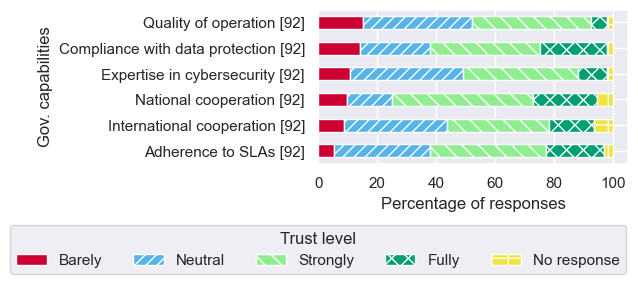

In [175]:
# Pivot the data to get a matrix form suitable for a stacked bar chart
plot_data = get_bar('Q36',grp=False,db=False)[1]
plot_data = plot_data[plot_data['variable']!='Other (please specify):']
pivot_data = plot_data.pivot(index='variable', columns='value', values='Sizes').fillna(0)

pivot_data = pivot_data.rename(index={'Adherence to service level agreements':'Adherence to SLAs'
})
pivot_data.index = pivot_data.index.to_series().apply(lambda x: f'{x} [{pivot_data.loc[x].sum()}]')

# Convert counts to percentages for a 100% stacked bar chart
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Sorting the risks based on the 'Enormous' category for emphasis
pivot_data_sorted = pivot_data_percentage.sort_values(by='Barely', ascending=True)

# Plotting with a colorblind-friendly palette and patterns
patterns = ['', '///', '\\\\', 'xx', '+']  # Patterns for Low, High, Enormous, No response
colors = ['#CC0033', '#56b4e9', '#90EE90', '#009e73' , '#f0e442']  # Colorblind-friendly palette
fig, ax = plt.subplots(figsize=(4, 2))
pivot_data_sorted[['Barely', 'Neutral', 'Strongly','Fully', 'No response']].plot(kind='barh', stacked=True, color=colors, ax=ax)
ax.set_xlabel('Percentage of responses')
ax.set_ylabel('Gov. capabilities')
#ax.set_title('Perceived Security Risks by Organizational Representatives (100% Stacked)')

# Adding patterns to the bars
bars = ax.patches
pl = []
for p in patterns:
    pl += [p] * len(pivot_data_sorted)

for bar, pattern in zip(bars, pl):
    bar.set_hatch(pattern)

#plt.legend(title='Trust level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Trust level', bbox_to_anchor=(-0, -0.35), loc='upper center', ncol=5, fancybox=True, shadow=False)
plt.savefig('govtrust_dodged_bar_chart.pdf', format='pdf', bbox_inches='tight')

In [176]:
get_bar('Q36',grp=False,db=False)[1]

,variable,value,Sizes
18,International cooperation,No response,6
3,Adherence to service level agreements,No response,3
32,Quality of operation,No response,2
8,Compliance with data protection,No response,2
27,Other (please specify):,No response,80
23,National cooperation,No response,5
13,Expertise in cybersecurity,No response,2
0,Adherence to service level agreements,Barely,5
20,National cooperation,Barely,9
29,Quality of operation,Barely,14


### Q36EXT

In [228]:
print("other")
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q36EXT'].notna()][['Q36[7]', 'Q36EXT']])

other


,Q36[7],Q36EXT
10,Neutral,.
18,Neutral,a
50,Neutral,Kommerzielle Unt...
62,Strongly,Schnelligkeit
100,Neutral,bin mir nicht g...
101,Neutral,Es hat sich in d...
111,Strongly,Yes
157,Barely,immer abhängig v...
175,Barely,"Know How, Ressou..."
176,Barely,Compliance


## Why is the state active

* [Q40][S1] › For what reason do you think the operation of such a solution might be of state interest?



### Q40

In [178]:
get_bar('Q40')[0].show()

this is a multiselection question
Q40[1]: For what reason do you think the operation of such a solution might be of state interest? [Containment of damage to the economy] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q40[2]: For what reason do you think the operation of such a solution might be of state interest? [Better response in the event of a crisis] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q40[3]: For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q40[4]: For what reason do you think the operation of such a solution might be of state interest? [Containment of espionage activities] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q40[5]: For what reason do you think the operation of such a

,variable,value,Sizes
0,Better response in the event of a crisis,No,26
1,Better response in the event of a crisis,Yes,66
2,Containment of damage to the economy,No,28
3,Containment of damage to the economy,Yes,64
4,Containment of espionage activities,No,36
5,Containment of espionage activities,Yes,56
6,No response,No,87
7,No response,Yes,5
8,Records in the interest of criminal law (embez...,No,39
9,Records in the interest of criminal law (embez...,Yes,53


In [179]:
adj_alpha=0.05
for i in range(1,5):
    nq = ('Q09', f'Q40[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

adj_alpha=0.05
for i in range(1,5):
    nq = (f'Q40[{i}]', 'Q09')
    test_phi(nq[0], nq[1], alpha=adj_alpha)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})



In [180]:
pr_pairwise_z_test(pairwise_z_tests_wr('Q40[3]', 'Q08B', alpha=adj_alpha, db=True, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})
pr_pairwise_z_test(pairwise_z_tests_wr('Q08B', 'Q40[3]', alpha=adj_alpha, db=True, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})
test_phi('Q08B', 'Q40[3]', alpha=adj_alpha, df=custom_check)
test_phi('Q40[3]', 'Q08B', alpha=adj_alpha, df=custom_check)

Q40[3]: For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)
Q08B: Government vs others (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'No': 63,
 'No response': 6,
 'Public administration and government organisations': 20}

,Q40[3],Q08B,count,rel_count,grp_count,total_count
0,Yes,No,39,61.90,63,89
1,No,No,24,38.10,63,89
2,No,Public administration and government organisat...,10,50.00,20,89
3,Yes,Public administration and government organisat...,10,50.00,20,89
4,No,No response,4,66.67,6,89
5,Yes,No response,2,33.33,6,89


Q08B,No,Public administration and government organisations
Q40[3],,
No,24,10
Yes,39,10


Validty checks: greater than 1 True, min 20% over 5 True
probability=0.950, critical=3.841, stat=0.465
significance=0.050, p=0.495
Independent (fail to reject H0)
Q08B: Government vs others (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
Q40[3]: For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'No': 38, 'Yes': 51}

,Q08B,Q40[3],count,rel_count,grp_count,total_count
0,No,Yes,39,76.47,51,89
1,No,No,24,63.16,38,89
2,Public administration and government organisat...,No,10,26.32,38,89
3,Public administration and government organisat...,Yes,10,19.61,51,89
4,No response,No,4,10.53,38,89
5,No response,Yes,2,3.92,51,89


Q40[3],No,Yes
Q08B,,
No,24,39
Public administration and government organisations,10,10


Validty checks: greater than 1 True, min 20% over 5 True
probability=0.950, critical=3.841, stat=0.465
significance=0.050, p=0.495
Independent (fail to reject H0)


In [181]:
test_against_all_odds('Q40[3]')



Q34 How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?, 10.654671717743085, 0.013747553810222718, N 81, ('Q40[3]', 'Q34') g1 True g5 True


Q36[4] I trust a government agency regarding [Adherence to service level agreements], 7.919077731577732, 0.047714067534271896, N 89.0, ('Q40[3]', 'Q36[4]') g1 True g5 True
sum or column = 0 on Q40[3] Q38


Q40[4] For what reason do you think the operation of such a solution might be of state interest? [Containment of espionage activities], 7.274122453367737, 0.0069955061465182, N 92, ('Q40[3]', 'Q40[4]') g1 True g5 True


Q40[5] For what reason do you think the operation of such a solution might be of state interest? [No response], 4.907341974876133, 0.026742763946879, N 92.0, ('Q40[3]', 'Q40[5]') g1 False g5 False


Q25[1] What does your organization expect to gain from such a system? [A better internal exchange], 7.016713181369563, 0.02994608769943985, N 49, ('Q40[3]', 'Q25[1]') 

In [182]:
adj_alpha=0.05
nq =('Q28[3]', 'Q40[3]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=False)[0].show()



Q40[3] For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)], 9.102395019168474, 0.0105545576291407, N 61, ('Q28[3]', 'Q40[3]') g1 True g5 False
High || VS || Enormous | 0.010795566473236677 | cor_p 0.032386699419710036 | N 39 | G1 True | G5 False | ('Q28[3]', 'Q40[3]')
Q28[3]: What would be potential concerns / security risks? [Monitoring of employees] (Total survey participants: 92, active 67)
No answer / not completed 25 (27.17%)
Q40[3]: For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'No': 27, 'Yes': 40}

,Q28[3],Q40[3],count,rel_count,grp_count,total_count
0,High,Yes,19,47.50,40,67
1,Low,Yes,15,37.50,40,67
2,Enormous,No,10,37.04,27,67
3,Low,No,7,25.93,27,67
4,High,No,6,22.22,27,67
5,Enormous,Yes,4,10.00,40,67
6,No response,No,4,14.81,27,67
7,No response,Yes,2,5.00,40,67


In [183]:
adj_alpha=0.05
nq =('Q26[23]', 'Q40[3]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=False)[0].show()

Q26[23]: What would be the requirements for your organization to participate? [Audit rights (access to the systems)] (Total survey participants: 92, active 47)
No answer / not completed 45 (48.91%)
Q40[3]: For what reason do you think the operation of such a solution might be of state interest? [Records in the interest of criminal law (embezzlement, corruption, tax evasion)] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'No': 16, 'Yes': 31}

,Q26[23],Q40[3],count,rel_count,grp_count,total_count
0,"Required, exclusion criterion",Yes,18,58.06,31,47
1,"Preferred, not an exclusion criterion",Yes,11,35.48,31,47
2,"Required, exclusion criterion",No,9,56.25,16,47
3,"Preferred, not an exclusion criterion",No,7,43.75,16,47
4,Irrelevant,Yes,2,6.45,31,47


In [229]:

with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q40[other]'].notna()][['Q22', 'Q24']]) # 'Q35', 
# trennen staatlich / priavte aussagen; dann cluster/gruppen finden

,Q22,Q24
62,Don't know,Profit von fremd...
66,No,N/A aus Datensch...
139,Don't know,NaN
141,No,Ich denke man mu...
147,Other:,Aus meiner persö...
156,Other:,Informationen vo...
176,Yes,Um von anderen O...
185,No,Würden wir nicht.


In [230]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q40[other]'].notna()]['Q40[other]']) 

62               Kontrolle
66     Monitoring der g...
139    Die Verbesserung...
141    alle untentehend...
147    Nur Informatione...
156            Überwachung
176    Frühwarnsystem f...
185    Der Staat soll s...
Name: Q40[other], dtype: object

## Risks seen when operated by state

* [Q28][S3] › What would be potential concerns / security risks?
* [Q28EXT][S3] › Other (please specify):

### Q28

In [186]:
get_bar('Q28')[0].show()

this is a multiselection question
Q28[1]: What would be potential concerns / security risks? [Centralization of data] (Total survey participants: 92, active 69)
No answer / not completed 23 (25.0%)
Q28[2]: What would be potential concerns / security risks? [Sale of data] (Total survey participants: 92, active 65)
No answer / not completed 27 (29.35%)
Q28[3]: What would be potential concerns / security risks? [Monitoring of employees] (Total survey participants: 92, active 67)
No answer / not completed 25 (27.17%)
Q28[4]: What would be potential concerns / security risks? [Lack of transparency and documentation] (Total survey participants: 92, active 70)
No answer / not completed 22 (23.91%)
Q28[5]: What would be potential concerns / security risks? [Breaking encrypted connections] (Total survey participants: 92, active 71)
No answer / not completed 21 (22.83%)
Q28[6]: What would be potential concerns / security risks? [Exposure of private or sensitive information] (Total survey partici

,variable,value,Sizes
3,"Abuse, corruption concerns, economic espionage...",No response,8
7,Breaking encrypted connections,No response,6
11,Centralization of data,No response,6
15,Competition with commercial service providers,No response,12
19,Concealment of information (attacks) for state...,No response,6
23,Exposure of private or sensitive information,No response,5
27,Lack of transparency and documentation,No response,5
31,Monitoring of employees,No response,6
35,Non-compliance with contractual agreements,No response,9
39,Official principle / close relationship with l...,No response,10


<Figure size 400x800 with 0 Axes>

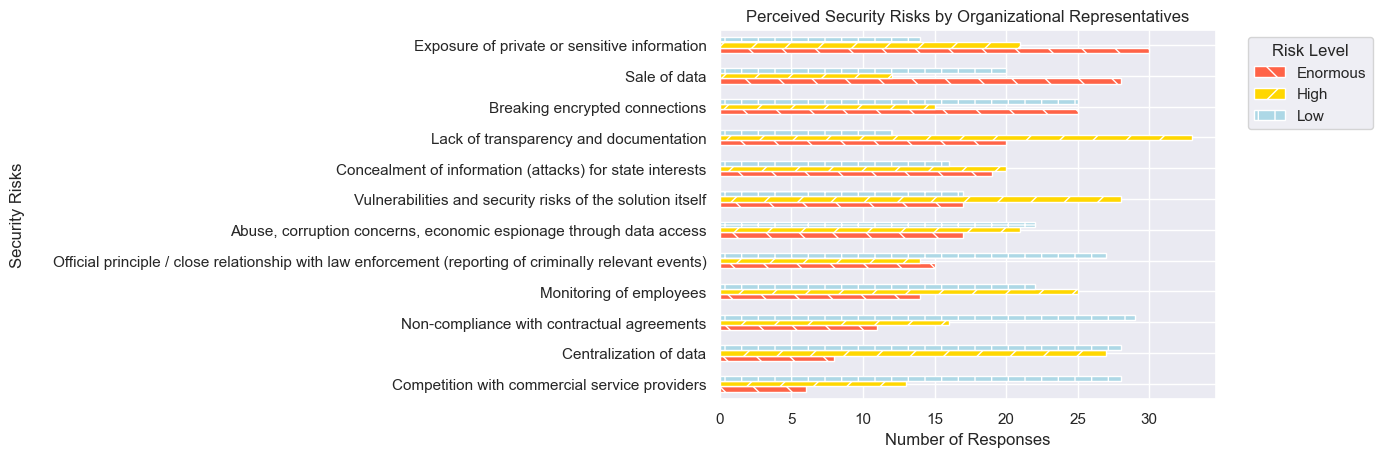

In [187]:


plot_data = get_bar('Q28',db=False)[1]
plot_data = plot_data[plot_data['variable']!='Other (please specify):']

# Pivot the data to get a matrix form suitable for a stacked bar chart
pivot_data = plot_data.pivot(index='variable', columns='value', values='Sizes').fillna(0)

# Sorting the risks based on the 'Enormous' category for emphasis
pivot_data_sorted = pivot_data.sort_values(by='Enormous', ascending=True)

# Plotting
patterns = [ '\\', '/', '+']  #'/',
plt.figure(figsize=(4, 8))
ax = pivot_data_sorted[[ 'Enormous', 'High', 'Low']].plot(kind='barh', stacked=False, color=['#ff6347', '#ffd700', '#add8e6'])

for bar, pattern in zip(ax.patches, [patterns[0]] * len(pivot_data_sorted) + [patterns[1]] * len(pivot_data_sorted) + [patterns[2]] * len(pivot_data_sorted)):
    bar.set_hatch(pattern)

plt.xlabel('Number of Responses')
plt.ylabel('Security Risks', labelpad=20)
#plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
#plt.subplots_adjust(left=0.3)  # Adjust the left margin
plt.title('Perceived Security Risks by Organizational Representatives')
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an SVG
#plt.tight_layout()

plt.savefig('security_risks_dodged_bar_chart.pdf', format='pdf', bbox_inches='tight')

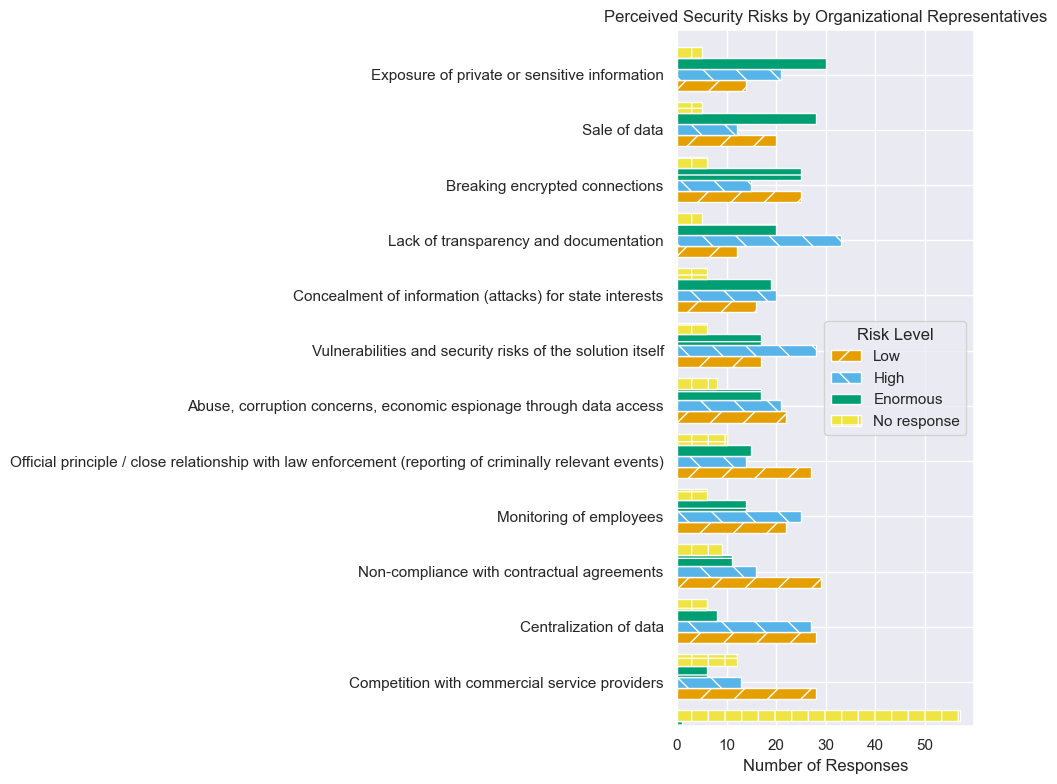

In [188]:
plot_data = get_bar('Q28',db=False)[1]
# Preparing the data
data_grouped = plot_data.groupby(['variable', 'value'])['Sizes'].sum().unstack(fill_value=0).reset_index()

# Sorting the risks based on 'Enormous' to highlight significant concerns
data_grouped_sorted = data_grouped.sort_values(by='Enormous', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.2
index = np.arange(len(data_grouped_sorted))
patterns = ['/', '\\', '-', '+']  # Patterns for Low, High, Enormous, No response
colors = ['#e69f00', '#56b4e9', '#009e73', '#f0e442']  # Colorblind-friendly palette

for i, (value, pattern, color) in enumerate(zip(['Low', 'High', 'Enormous', 'No response'], patterns, colors)):
    plt.barh(index + i * bar_width, data_grouped_sorted[value], bar_width, label=value, color=color, hatch=pattern)

ax.set(yticks=index + bar_width, yticklabels=data_grouped_sorted['variable'], ylim=[2*bar_width, len(data_grouped_sorted)])
ax.set_xlabel('Number of Responses')
ax.set_title('Perceived Security Risks by Organizational Representatives')
plt.legend(title='Risk Level')

plt.tight_layout()

value,Enormous,High,Low,No response
variable,,,,
"Abuse, corruption concerns, economic espionage through data access",17,21,22,8
Breaking encrypted connections,25,15,25,6
Centralization of data,8,27,28,6
Competition with commercial service providers,6,13,28,12
Concealment of information (attacks) for state interests,19,20,16,6
Exposure of private or sensitive information,30,21,14,5
Lack of transparency and documentation,20,33,12,5
Monitoring of employees,14,25,22,6
Non-compliance with contractual agreements,11,16,29,9


['Abuse, corruption concerns, economic espionage through data access', 'Breaking encrypted connections', 'Centralization of data', 'Competition with commercial service providers', 'Concealment of information (attacks) for state interests', 'Exposure of private or sensitive information', 'Lack of transparency and documentation', 'Monitoring of employees', 'Non-compliance with contractual agreements', 'Official principle / close relationship with law enforcement (reporting of criminally relevant events)', 'Sale of data', 'Vulnerabilities and security risks of the solution itself']


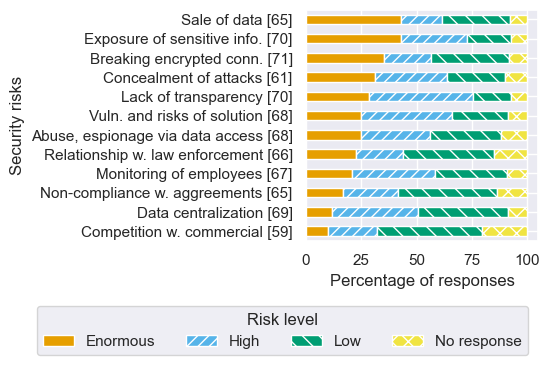

In [189]:
plot_data = get_bar('Q28',db=False)[1]
plot_data = plot_data[plot_data['variable']!='Other (please specify):']

# Pivot the data to get a matrix form suitable for a stacked bar chart
pivot_data = plot_data.pivot(index='variable', columns='value', values='Sizes').fillna(0)

display(pivot_data)
print(list(pivot_data.index))

pivot_data = pivot_data.rename(index={'Abuse, corruption concerns, economic espionage through data access':'Abuse, espionage via data access',
                  'Breaking encrypted connections':'Breaking encrypted conn.',
                  'Centralization of data':'Data centralization',
                  'Competition with commercial service providers':'Competition w. commercial',
                  'Concealment of information (attacks) for state interests':'Concealment of attacks',
                  'Exposure of private or sensitive information':'Exposure of sensitive info.',
                  'Lack of transparency and documentation':'Lack of transparency',
                  'Monitoring of employees':'Monitoring of employees',
                  'Non-compliance with contractual agreements':'Non-compliance w. aggreements',
                  'Official principle / close relationship with law enforcement (reporting of criminally relevant events)':'Relationship w. law enforcement',
                  'Sale of data':'Sale of data',
                  'Vulnerabilities and security risks of the solution itself':'Vuln. and risks of solution'
})
pivot_data.index = pivot_data.index.to_series().apply(lambda x: f'{x} [{pivot_data.loc[x].sum()}]')

# Convert counts to percentages for a 100% stacked bar chart
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Sorting the risks based on the 'Enormous' category for emphasis
pivot_data_sorted = pivot_data_percentage.sort_values(by='Enormous', ascending=True)

# Plotting with a colorblind-friendly palette and patterns
patterns = ['', '///', '\\\\', 'xx']  # Patterns for Low, High, Enormous, No response
colors = ['#e69f00', '#56b4e9', '#009e73', '#f0e442']  # Colorblind-friendly palette
fig, ax = plt.subplots(figsize=(3, 3))
pivot_data_sorted[['Enormous', 'High', 'Low',  'No response']].plot(kind='barh', stacked=True, color=colors, ax=ax)
ax.set_xlabel('Percentage of responses')
ax.set_ylabel('Security risks')
#ax.set_title('Perceived Risks by Org. Represantives')

pl = []
for p in patterns:
    pl += [p] * len(pivot_data)

# Adding patterns to the bars
bars = ax.patches
for bar, pattern in zip(bars, pl):
    bar.set_hatch(pattern)

plt.legend(title='Risk level', bbox_to_anchor=(-0.1, -0.25), loc='upper center', ncol=4, fancybox=True, shadow=False)

plt.savefig('security_risks_dodged_bar_chart.pdf', format='pdf', bbox_inches='tight')


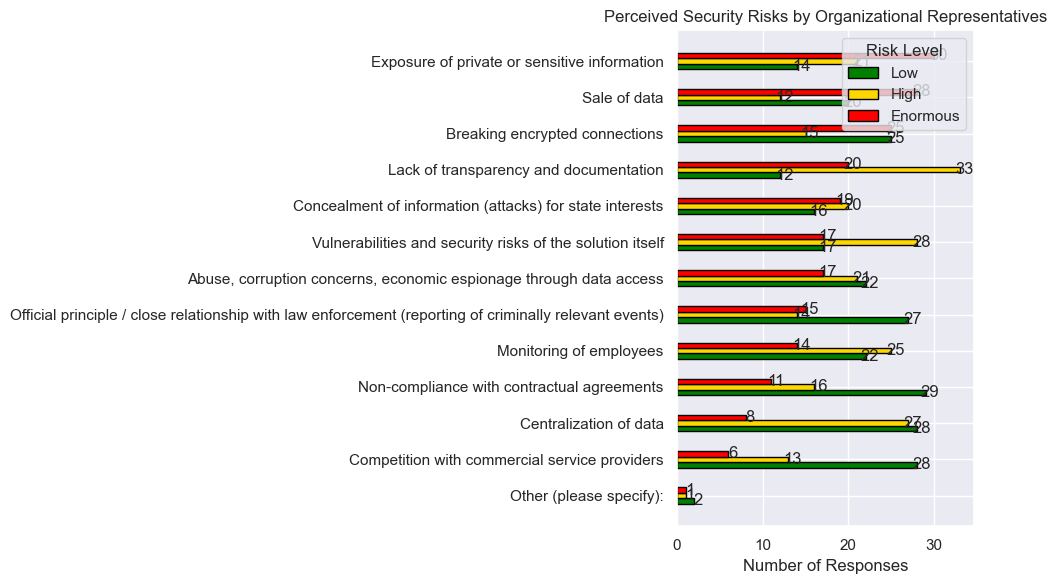

In [190]:
fig, ax = plt.subplots(figsize=(10, 6))  # Reduced figure size for compactness
bar_width = 0.15  # Reduced bar width for less padding between risks
index = np.arange(len(data_grouped_sorted))
colors = ['#008000', '#FFD700', '#FF0000']  # Green, Yellow, Red for Low, High, Enormous

# Plotting each risk category
for i, (value, color) in enumerate(zip(['Low', 'High', 'Enormous'], colors)):
    bars = plt.barh(index + i * bar_width, data_grouped_sorted[value], bar_width, label=value, color=color, edgecolor='black')

    # Adding the data labels on each bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center')

ax.set(yticks=index + bar_width, yticklabels=data_grouped_sorted['variable'])
ax.set_xlabel('Number of Responses')
ax.set_title('Perceived Security Risks by Organizational Representatives')
plt.legend(title='Risk Level', loc='upper right')

plt.tight_layout()

In [231]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q28EXT'].notna()][['Q28EXT','Q28[12]']])

,Q28EXT,Q28[12]
49,Eigene Vertrauli...,Low
111,Yes,High
156,Es muss eine neu...,Enormous
164,Der Staat der je...,High


In [192]:
adj_alpha=0.05
for i in range(1,12):
    nq = ('Q08B', f'Q28[{i}]')
    test_phi(nq[0], nq[1], alpha=adj_alpha, df=custom_check)
    pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})



Q28[10] What would be potential concerns / security risks? [Competition with commercial service providers], 7.726150392817059, 0.021003310802812526, N 44.0, ('Q08B', 'Q28[10]') g1 True g5 True


In [193]:
for i in range(1,12):
    test_against_all_odds(f'Q28[{i}]', quest=imporant_chi2)



Q25[2] What does your organization expect to gain from such a system? [A better overview of the current threat situation in the sector and across sectors], 25.425457930756842, 4.131006255187509e-05, N 47.0, ('Q28[1]', 'Q25[2]') g1 False g5 False
High || VS || Enormous | 0.00017388039900303716 | cor_p 0.0005216411970091115 | N 24.0 | G1 False | G5 False | ('Q28[1]', 'Q25[2]')
Low || VS || Enormous | 0.001059908196836821 | cor_p 0.0015898622952552316 | N 27.0 | G1 False | G5 False | ('Q28[1]', 'Q25[2]')
Very important || VS || Irrelevant | 0.00032492655829050374 | cor_p 0.0009747796748715113 | N 31.0 | G1 False | G5 False | ('Q25[2]', 'Q28[1]')
Desirable || VS || Irrelevant | 0.0007559767017882706 | cor_p 0.001133965052682406 | N 20.0 | G1 False | G5 False | ('Q25[2]', 'Q28[1]')


Q25[3] What does your organization expect to gain from such a system? [Additional external expertise], 20.009367588932804, 0.0004972772636880667, N 47.0, ('Q28[1]', 'Q25[3]') g1 False g5 False
Low || VS || En

In [194]:
adj_alpha=0.05
nq =  ('Q28[7]', 'Q04[3]')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=custom_check)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})

get_bar(nq[0], nq[1], rename=True, df=custom_check)[0].show()



Q04[3] Does your education relate to one or more of the following areas? [Information Technology], 10.251145274163177, 0.005942813306654187, N 62, ('Q28[7]', 'Q04[3]') g1 True g5 True
Enormous || VS || Low | 0.0047540656801357975 | cor_p 0.014262197040407393 | N 34 | G1 True | G5 True | ('Q28[7]', 'Q04[3]')
Q28[7]: What would be potential concerns / security risks? [Vulnerabilities and security risks of the solution itself] (Total survey participants: 92, active 68)
No answer / not completed 24 (26.09%)
Q04[3]: Does your education relate to one or more of the following areas? [Information Technology] (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)


{'No': 24, 'Yes': 44}

,Q28[7],Q04[3],count,rel_count,grp_count,total_count
0,High,Yes,18,40.91,44,68
1,Enormous,Yes,15,34.09,44,68
2,Low,No,11,45.83,24,68
3,High,No,10,41.67,24,68
4,Low,Yes,6,13.64,44,68
5,No response,Yes,5,11.36,44,68
6,Enormous,No,2,8.33,24,68
7,No response,No,1,4.17,24,68


In [195]:
adj_alpha=0.05
nq =  ('Q28[11]', 'Q36[1]')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=custom_check)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False, df=custom_check), adj_alpha) #drop={'sq':[], 'q':[]})

get_bar(nq[0], nq[1], rename=True, df=custom_check)[0].show()



Q36[1] I trust a government agency regarding [Quality of operation], 13.637562437562439, 0.033957495033266324, N 54.0, ('Q28[11]', 'Q36[1]') g1 False g5 False
Low || VS || High | 0.015495251853434863 | cor_p 0.04648575556030459 | N 40.0 | G1 False | G5 False | ('Q28[11]', 'Q36[1]')
Q28[11]: What would be potential concerns / security risks? [Official principle / close relationship with law enforcement (reporting of criminally relevant events)] (Total survey participants: 92, active 66)
No answer / not completed 26 (28.26%)
Q36[1]: I trust a government agency regarding [Quality of operation] (Total survey participants: 92, active 92)
No answer / not completed 0 (0.0%)


{'Barely': 8, 'Fully': 5, 'Neutral': 25, 'No response': 2, 'Strongly': 26}

,Q28[11],Q36[1],count,rel_count,grp_count,total_count
0,Low,Strongly,14,53.85,26,66
1,Low,Neutral,9,36.00,25,66
2,High,Neutral,8,32.00,25,66
3,No response,Strongly,6,23.08,26,66
4,Enormous,Neutral,5,20.00,25,66
5,Enormous,Barely,4,50.00,8,66
6,Enormous,Strongly,4,15.38,26,66
7,High,Fully,3,60.00,5,66
8,Low,Barely,3,37.50,8,66
9,No response,Neutral,3,12.00,25,66


In [196]:
##high/enormous are quiet similar
adj_alpha=0.05
nq = ('Q28[7]', 'Q26[7]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

get_bar(nq[0], nq[1], rename=True)[0].show()



Q26[7] What would be the requirements for your organization to participate? [Operator is a private / commercial entity], 10.95368040264234, 0.027089544614110662, N 36, ('Q28[7]', 'Q26[7]') g1 True g5 False
High || VS || Enormous | 0.006810618073985948 | cor_p 0.020431854221957844 | N 28 | G1 True | G5 False | ('Q28[7]', 'Q26[7]')
Q28[7]: What would be potential concerns / security risks? [Vulnerabilities and security risks of the solution itself] (Total survey participants: 92, active 68)
No answer / not completed 24 (26.09%)
Q26[7]: What would be the requirements for your organization to participate? [Operator is a private / commercial entity] (Total survey participants: 92, active 39)
No answer / not completed 53 (57.61%)


{'Irrelevant': 18,
 'Preferred, not an exclusion criterion': 13,
 'Required, exclusion criterion': 6}

,Q28[7],Q26[7],count,rel_count,grp_count,total_count
0,High,Irrelevant,11,61.11,18,37
1,Enormous,"Preferred, not an exclusion criterion",8,61.54,13,37
2,Low,Irrelevant,5,27.78,18,37
3,High,"Preferred, not an exclusion criterion",3,23.08,13,37
4,High,"Required, exclusion criterion",3,50.00,6,37
5,Enormous,"Required, exclusion criterion",2,33.33,6,37
6,Low,"Preferred, not an exclusion criterion",2,15.38,13,37
7,Enormous,Irrelevant,1,5.56,18,37
8,Low,"Required, exclusion criterion",1,16.67,6,37
9,No response,Irrelevant,1,5.56,18,37


In [197]:
##TODO GIBT HIER DIE GRUNDMENGE GENUG HER? (Organizations that prefer 
adj_alpha=0.05
nq = ('Q28[7]', 'Q26[6]')
test_phi(nq[0], nq[1], alpha=adj_alpha)
pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha) #drop={'sq':[], 'q':[]})

get_bar(nq[0], nq[1], rename=True)[0].show()

Q28[7]: What would be potential concerns / security risks? [Vulnerabilities and security risks of the solution itself] (Total survey participants: 92, active 68)
No answer / not completed 24 (26.09%)
Q26[6]: What would be the requirements for your organization to participate? [Operator is a government agency] (Total survey participants: 92, active 44)
No answer / not completed 48 (52.17%)


{'Irrelevant': 15,
 'Preferred, not an exclusion criterion': 15,
 'Required, exclusion criterion': 12}

,Q28[7],Q26[6],count,rel_count,grp_count,total_count
0,Enormous,"Preferred, not an exclusion criterion",8,53.33,15,42
1,High,Irrelevant,8,53.33,15,42
2,High,"Required, exclusion criterion",6,50.00,12,42
3,Low,"Preferred, not an exclusion criterion",4,26.67,15,42
4,Enormous,Irrelevant,3,20.00,15,42
5,High,"Preferred, not an exclusion criterion",3,20.00,15,42
6,Low,Irrelevant,3,20.00,15,42
7,Low,"Required, exclusion criterion",3,25.00,12,42
8,Enormous,"Required, exclusion criterion",2,16.67,12,42
9,No response,Irrelevant,1,6.67,15,42


### Q28EXT

In [232]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q28EXT'].notna()]['Q28EXT']) 

49     Eigene Vertrauli...
111                    Yes
156    Es muss eine neu...
164    Der Staat der je...
Name: Q28EXT, dtype: object

# Drop out rate

In [199]:
get_bar('Q11')[0]

Q11: Does your organization already deal with detection and response? (Total survey participants: 92, active 63)
No answer / not completed 29 (31.52%)


,unique_values,counts,norm,norm2
0,Yes,48,76.19,52.17
1,Don't know,6,9.52,6.52
2,No,5,7.94,5.43
3,No response,4,6.35,4.35


In [200]:

q_dict['HereCheck']="still here question"
test_q = []
absprung_df = usable_data.copy()
for q in all_questions:
    if 'EXT' in q or 'other' in q or 'Q35' == q or 'Q24' == q:
        continue
    
    print(f'{q}: {absprung_df[q].count()}')
    absprung_df[f'HereCheck{q}'] = absprung_df[q].apply(lambda x: 'Still here' if not pd.isna(x) else 'Gone')
    test_against_all_odds(f'HereCheck{q}',  df=absprung_df, quest=test_q)
    test_q.append(q)
    #Q25[6]Q25[6]
#
    

Q31: 92
Q32: 92
Q33: 92
Q34Copy: 92
Q34: 92
Q36[1]: 92
Q36[2]: 92
Q36[3]: 92
Q36[4]: 92
Q36[5]: 92
Q36[6]: 92
Q36[7]: 91
Q37: 92
Q38: 92
Q39: 92
sum or column = 0 on HereCheckQ39 Q38
Q40[1]: 92
sum or column = 0 on HereCheckQ40[1] Q38
Q40[2]: 92
sum or column = 0 on HereCheckQ40[2] Q38
Q40[3]: 92
sum or column = 0 on HereCheckQ40[3] Q38
Q40[4]: 92
sum or column = 0 on HereCheckQ40[4] Q38
Q40[5]: 92
sum or column = 0 on HereCheckQ40[5] Q38
Q02: 89


Q36[5] I trust a government agency regarding [National cooperation], 10.673949579831932, 0.013626155946119408, N 87.0, ('HereCheckQ02', 'Q36[5]') g1 False g5 False
sum or column = 0 on HereCheckQ02 Q38
Q04[1]: 89


Q36[5] I trust a government agency regarding [National cooperation], 10.673949579831932, 0.013626155946119408, N 87.0, ('HereCheckQ04[1]', 'Q36[5]') g1 False g5 False
sum or column = 0 on HereCheckQ04[1] Q38
Q04[2]: 89


Q36[5] I trust a government agency regarding [National cooperation], 10.673949579831932, 0.013626155946119408, 

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ16[2] Q38


Q04[2] Does your education relate to one or more of the following areas? [Law], 4.919263134392708, 0.026558842361513603, N 89, ('HereCheckQ16[2]', 'Q04[2]') g1 True g5 False


Q28[2] What would be potential concerns / security risks? [Sale of data], 7.936880980359241, 0.018902889402168905, N 60, ('HereCheckQ16[2]', 'Q28[2]') g1 True g5 False


Q13[2][1] Welche der nachfolgenden Aktivitäten im Bereich der Reaktion auf Vorfälle werden in Ihrer Organisation verfolgt? [Reaktion][Skala 1], 11.541289592760181, 0.02110915448371165, N 55.0, ('HereCheckQ16[2]', 'Q13[2][1]') g1 False g5 False
Q17[1]: 42


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[1] Q38


Q06 What position do you currently hold in your current organisation?, 6.983428924876295, 0.008226783789893003, N 77, ('HereCheckQ17[1]', 'Q06') g1 True g5 True


Q26[2] What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system], 8.076011730205279, 0.017632599161567352, N 48.0, ('HereCheckQ17[1]', 'Q26[2]') g1 True g5 True


Q26[4] What would be the requirements for your organization to participate? [High system availability], 9.45727112393779, 0.008838522432313296, N 47.0, ('HereCheckQ17[1]', 'Q26[4]') g1 True g5 True
Required, exclusion criterion || VS || Preferred, not an exclusion criterion | 0.010364550881955767 | cor_p 0.031093652645867303 | N 45.0 | G1 True | G5 True | ('Q26[4]', 'HereCheckQ17[1]')


Q26[23] What would be the requirements for your organization to participate? [Audit rights (access to the systems)], 6.623857623857625, 0.0364458088044014, N 47.0, ('H

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[2] Q38


Q40[2] For what reason do you think the operation of such a solution might be of state interest? [Better response in the event of a crisis], 5.478173914537551, 0.019255364199327087, N 92, ('HereCheckQ17[2]', 'Q40[2]') g1 True g5 True


Q26[4] What would be the requirements for your organization to participate? [High system availability], 10.103122730573713, 0.006399333943970836, N 47.0, ('HereCheckQ17[2]', 'Q26[4]') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 18.475434243176178, 0.0009961243446201902, N 41.0, ('HereCheckQ17[2]', 'Q16[1]') g1 False g5 False
Permanent access || VS || Don't know | 0.009636670578809377 | cor_p 0.047570101465276224 | N 16.0 | G1 False | G5 False | ('Q16[1]', 'HereCheckQ17[2]')
On request via exports or comparable methods || VS || Don't know | 0.010571133658950271 | cor_p 0.047570101465276224 | N 11.0 | G1 False | G5 Fals

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[3] Q38


Q06 What position do you currently hold in your current organisation?, 4.977264001806684, 0.025682569027982407, N 77, ('HereCheckQ17[3]', 'Q06') g1 True g5 True


Q25[5] What does your organization expect to gain from such a system? [Access to cost-effective threat intelligence feeds], 6.6127232142857135, 0.03664927593167016, N 50, ('HereCheckQ17[3]', 'Q25[5]') g1 False g5 False


Q26[4] What would be the requirements for your organization to participate? [High system availability], 6.834864097968938, 0.032796546820916136, N 47, ('HereCheckQ17[3]', 'Q26[4]') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 17.2302036199095, 0.0017436636343467406, N 41.0, ('HereCheckQ17[3]', 'Q16[1]') g1 False g5 False


Q17[1] How does your organization rate the importance of the following criteria when selecting your security service providers? [Head office location is 

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[4] Q38


Q26[4] What would be the requirements for your organization to participate? [High system availability], 7.015316067947648, 0.029967014048238934, N 47.0, ('HereCheckQ17[4]', 'Q26[4]') g1 True g5 True


Q26[5] What would be the requirements for your organization to participate? [High system performance (e.g. coverage of all offices, all bandwidths, all end devices)], 6.186251540708678, 0.045359947800118566, N 46, ('HereCheckQ17[4]', 'Q26[5]') g1 True g5 True


Q26[22] What would be the requirements for your organization to participate? [Regular security checks by independent bodies], 7.18483008949246, 0.027531759638423803, N 48.0, ('HereCheckQ17[4]', 'Q26[22]') g1 True g5 False


Q13[2][1] Welche der nachfolgenden Aktivitäten im Bereich der Reaktion auf Vorfälle werden in Ihrer Organisation verfolgt? [Reaktion][Skala 1], 9.51484593837535, 0.04944308861605842, N 55.0, ('HereCheckQ17[4]', 'Q13[2][1]') g1 False g5 False


Q13[2][2] Welche der nachf

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[5] Q38


Q06 What position do you currently hold in your current organisation?, 6.983428924876295, 0.008226783789893003, N 77, ('HereCheckQ17[5]', 'Q06') g1 True g5 True


Q26[2] What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system], 7.106966657630794, 0.02862475635340506, N 48.0, ('HereCheckQ17[5]', 'Q26[2]') g1 True g5 True


Q26[4] What would be the requirements for your organization to participate? [High system availability], 7.480853024970671, 0.023743973870023315, N 47.0, ('HereCheckQ17[5]', 'Q26[4]') g1 True g5 True


Q26[26] What would be the requirements for your organization to participate? [Ability to receive in-depth analysis from the operator], 6.066523220369374, 0.048158308062818865, N 46.0, ('HereCheckQ17[5]', 'Q26[26]') g1 True g5 True


Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 4.65040650406

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[6] Q38


Q40[2] For what reason do you think the operation of such a solution might be of state interest? [Better response in the event of a crisis], 5.03560606060606, 0.024831396960934213, N 92, ('HereCheckQ17[6]', 'Q40[2]') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 6.181388888888891, 0.01291009001288143, N 77, ('HereCheckQ17[6]', 'Q06') g1 True g5 True


Q25[5] What does your organization expect to gain from such a system? [Access to cost-effective threat intelligence feeds], 6.932773109243698, 0.031229673743933536, N 50, ('HereCheckQ17[6]', 'Q25[5]') g1 False g5 False


Q26[4] What would be the requirements for your organization to participate? [High system availability], 6.800945967612634, 0.03335748867651104, N 47, ('HereCheckQ17[6]', 'Q26[4]') g1 True g5 True


Q26[26] What would be the requirements for your organization to participate? [Ability to receive in-depth analysis from the operator], 7.2151

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[7] Q38


Q06 What position do you currently hold in your current organisation?, 7.234400406504064, 0.007151969178588023, N 77, ('HereCheckQ17[7]', 'Q06') g1 True g5 True


Q25[5] What does your organization expect to gain from such a system? [Access to cost-effective threat intelligence feeds], 6.932773109243698, 0.031229673743933536, N 50, ('HereCheckQ17[7]', 'Q25[5]') g1 False g5 False


Q26[23] What would be the requirements for your organization to participate? [Audit rights (access to the systems)], 6.623857623857625, 0.0364458088044014, N 47.0, ('HereCheckQ17[7]', 'Q26[23]') g1 True g5 False


Q26[26] What would be the requirements for your organization to participate? [Ability to receive in-depth analysis from the operator], 7.215144230769232, 0.02711760542396831, N 46.0, ('HereCheckQ17[7]', 'Q26[26]') g1 True g5 True


Q13[2][1] Welche der nachfolgenden Aktivitäten im Bereich der Reaktion auf Vorfälle werden in Ihrer Organisation verfolgt? [Rea

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[8] Q38


Q06 What position do you currently hold in your current organisation?, 5.214529183766528, 0.022398911149482614, N 77, ('HereCheckQ17[8]', 'Q06') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 17.652777777777775, 0.0014425868139852796, N 41.0, ('HereCheckQ17[8]', 'Q16[1]') g1 False g5 False
Permanent access || VS || Don't know | 0.009636670578809377 | cor_p 0.047570101465276224 | N 16.0 | G1 False | G5 False | ('Q16[1]', 'HereCheckQ17[8]')
On request via exports or comparable methods || VS || Don't know | 0.010571133658950271 | cor_p 0.047570101465276224 | N 11.0 | G1 False | G5 False | ('Q16[1]', 'HereCheckQ17[8]')


Q17[1] How does your organization rate the importance of the following criteria when selecting your security service providers? [Head office location is in the same country as our organization], 9.222972972972974, 0.00993703605395012, N 42

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ17[9] Q38


Q02 Age group, 11.826351056735405, 0.03724622076420583, N 86.0, ('HereCheckQ17[9]', 'Q02') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 7.234400406504064, 0.007151969178588023, N 77, ('HereCheckQ17[9]', 'Q06') g1 True g5 True


Q26[2] What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system], 6.251612903225806, 0.04390151489608529, N 48.0, ('HereCheckQ17[9]', 'Q26[2]') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 18.18099547511312, 0.0011375214221921008, N 41.0, ('HereCheckQ17[9]', 'Q16[1]') g1 False g5 False
Permanent access || VS || Don't know | 0.009636670578809377 | cor_p 0.047570101465276224 | N 16.0 | G1 False | G5 False | ('Q16[1]', 'HereCheckQ17[9]')
On request via exports or comparable methods || VS || Don't know | 0.01057113

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[5] I trust a government agency regarding [National cooperation], 8.572206955235954, 0.03555402902423023, N 87, ('HereCheckQ17[10]', 'Q36[5]') g1 True g5 True
sum or column = 0 on HereCheckQ17[10] Q38


Q06 What position do you currently hold in your current organisation?, 7.234400406504064, 0.007151969178588023, N 77, ('HereCheckQ17[10]', 'Q06') g1 True g5 True


Q26[4] What would be the requirements for your organization to participate? [High system availability], 6.004048420715086, 0.04968639079906736, N 47.0, ('HereCheckQ17[10]', 'Q26[4]') g1 True g5 True


Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 10.517169053754417, 0.0011827052738134114, N 52, ('HereCheckQ17[10]', 'Q27') g1 True g5 False


Q13[2][2] Welche der nachfolgenden Aktivitäten im Bereich der Reaktion auf Vorfälle werden in Ihrer Organisation verfolgt? [Reaktion][Skala 2], 10.057814336075207, 0.01808103147156219, N 52.0, ('HereCheckQ17[10]', 'Q13[2

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[6] I trust a government agency regarding [International cooperation], 8.616086041617958, 0.03485566737279771, N 86, ('HereCheckQ17[11]', 'Q36[6]') g1 True g5 True
sum or column = 0 on HereCheckQ17[11] Q38


Q05 In which country is your organization based?, 6.251490099136881, 0.0439042106216156, N 89.0, ('HereCheckQ17[11]', 'Q05') g1 False g5 False


Q06 What position do you currently hold in your current organisation?, 6.983428924876295, 0.008226783789893003, N 77, ('HereCheckQ17[11]', 'Q06') g1 True g5 True


Q26[2] What would be the requirements for your organization to participate? [Opportunity to provide feedback and contribute to the system], 7.106966657630794, 0.02862475635340506, N 48.0, ('HereCheckQ17[11]', 'Q26[2]') g1 True g5 True


Q26[4] What would be the requirements for your organization to participate? [High system availability], 7.480853024970671, 0.023743973870023315, N 47.0, ('HereCheckQ17[11]', 'Q26[4]') g1 True g5 True


Q26[26] What would be the requirements 

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[5] I trust a government agency regarding [National cooperation], 7.910836236933799, 0.04789084604845412, N 87.0, ('HereCheckQ17[12]', 'Q36[5]') g1 True g5 False
sum or column = 0 on HereCheckQ17[12] Q38


Q26[23] What would be the requirements for your organization to participate? [Audit rights (access to the systems)], 7.043927648578811, 0.029541364117489345, N 47.0, ('HereCheckQ17[12]', 'Q26[23]') g1 True g5 False


Q28[7] What would be potential concerns / security risks? [Vulnerabilities and security risks of the solution itself], 6.604010025062656, 0.036809290275436266, N 62.0, ('HereCheckQ17[12]', 'Q28[7]') g1 True g5 True


Q13[1][1] Welche der nachfolgenden Aktivitäten im Bereich der Reaktion auf Vorfälle werden in Ihrer Organisation verfolgt? [Erkennung][Skala 1], 20.697174254317115, 0.0003635863007163811, N 54.0, ('HereCheckQ17[12]', 'Q13[1][1]') g1 False g5 False
Performed entirely internally (without external companies) || VS || We don't do that | 0.004222241661330548

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[3] I trust a government agency regarding [Compliance with data protection], 9.128500601915292, 0.02763029991099992, N 90, ('HereCheckQ21', 'Q36[3]') g1 True g5 True
sum or column = 0 on HereCheckQ21 Q38


Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 4.441426459719143, 0.03507692812139204, N 52, ('HereCheckQ21', 'Q27') g1 True g5 False


Q28[1] What would be potential concerns / security risks? [Centralization of data], 6.890624999999999, 0.031894793362157114, N 63.0, ('HereCheckQ21', 'Q28[1]') g1 True g5 True


Q28[5] What would be potential concerns / security risks? [Breaking encrypted connections], 7.001642036124795, 0.030172600999891948, N 65.0, ('HereCheckQ21', 'Q28[5]') g1 True g5 False


Q30 How should access to this data be regulated?, 17.875172780435935, 0.0013053785326687252, N 61.0, ('HereCheckQ21', 'Q30') g1 False g5 False
Q01: 48


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ01 Q38


Q26[19] What would be the requirements for your organization to participate? [Pseudonymization of personal data], 7.199247311827958, 0.02733400750388239, N 41.0, ('HereCheckQ01', 'Q26[19]') g1 True g5 False


Q27 Would you answer the above question differently if it were a managed SOC provider (SOC service provider)?, 4.650406504065041, 0.03104619453130752, N 52, ('HereCheckQ01', 'Q27') g1 True g5 True


Q28[4] What would be potential concerns / security risks? [Lack of transparency and documentation], 6.133893280632411, 0.04656311195289529, N 65, ('HereCheckQ01', 'Q28[4]') g1 True g5 True
Q03: 53


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ03 Q38


Q15[2] Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [In the next 5 years], 6.192366757000903, 0.04522146667261743, N 47.0, ('HereCheckQ03', 'Q15[2]') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 10.420478170478171, 0.03391019101042328, N 41.0, ('HereCheckQ03', 'Q16[1]') g1 False g5 False
Q18[1]: 36


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[2] I trust a government agency regarding [Expertise in cybersecurity], 9.55026455026455, 0.02280259861514849, N 90, ('HereCheckQ18[1]', 'Q36[2]') g1 True g5 False


Q36[6] I trust a government agency regarding [International cooperation], 8.60688275310124, 0.03500102315885488, N 86, ('HereCheckQ18[1]', 'Q36[6]') g1 True g5 True
sum or column = 0 on HereCheckQ18[1] Q38


Q04[4] Does your education relate to one or more of the following areas? [IT Security], 4.1936355191366985, 0.04057599414648335, N 89, ('HereCheckQ18[1]', 'Q04[4]') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 12.03125, 0.0005231598025674351, N 77, ('HereCheckQ18[1]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 5.256960020850447, 0.021859168059293877, N 87, ('HereCheckQ18[1]', 'Q07') g1 True g5 True


Q30 How should access to this data be regulated?, 11.290421948466207, 0.023486851307482303, N 61.0, ('HereCh

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ18[2] Q38


Q06 What position do you currently hold in your current organisation?, 9.177579365079364, 0.0024499783929089664, N 77, ('HereCheckQ18[2]', 'Q06') g1 True g5 True


Q13[2][1] Welche der nachfolgenden Aktivitäten im Bereich der Reaktion auf Vorfälle werden in Ihrer Organisation verfolgt? [Reaktion][Skala 1], 10.428921568627452, 0.03379028906702034, N 55.0, ('HereCheckQ18[2]', 'Q13[2][1]') g1 False g5 False


Q17[1] How does your organization rate the importance of the following criteria when selecting your security service providers? [Head office location is in the same country as our organization], 6.115489130434782, 0.0469935667069005, N 42.0, ('HereCheckQ18[2]', 'Q17[1]') g1 False g5 False


Q03 Your highest level of education, 17.53461352657005, 0.0035899383261424403, N 52.0, ('HereCheckQ18[2]', 'Q03') g1 False g5 False
University of Applied Sciences || VS || High school diploma | 0.0017626617859749112 | cor_p 0.02467726500364876 | N 19.0 | 

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q34Copy How would you feel if a government agency operates such a system for your organization?, 7.90665460118785, 0.04798078501108992, N 83, ('HereCheckQ18[3]', 'Q34Copy') g1 True g5 True


Q36[2] I trust a government agency regarding [Expertise in cybersecurity], 8.781512605042018, 0.03234135986389897, N 90, ('HereCheckQ18[3]', 'Q36[2]') g1 True g5 False


Q36[6] I trust a government agency regarding [International cooperation], 8.360970786340852, 0.03911187805272822, N 86, ('HereCheckQ18[3]', 'Q36[6]') g1 True g5 True
sum or column = 0 on HereCheckQ18[3] Q38


Q06 What position do you currently hold in your current organisation?, 7.234400406504064, 0.007151969178588023, N 77, ('HereCheckQ18[3]', 'Q06') g1 True g5 True


Q15[1] Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently], 6.1908766233766235, 0.04525517224152263, N 47, ('HereCheckQ18[3]', 'Q15[1]') g1 True g5 True


Q

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ18[4] Q38


Q06 What position do you currently hold in your current organisation?, 5.407643638850891, 0.020048761188164857, N 77, ('HereCheckQ18[4]', 'Q06') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 11.033455433455432, 0.026190583251246822, N 41.0, ('HereCheckQ18[4]', 'Q16[1]') g1 False g5 False


Q16[2] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [In the next 5 years], 13.71103896103896, 0.008276765084023219, N 41.0, ('HereCheckQ18[4]', 'Q16[2]') g1 False g5 False
Q18[5]: 45


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ18[5] Q38


Q06 What position do you currently hold in your current organisation?, 9.177579365079364, 0.0024499783929089664, N 77, ('HereCheckQ18[5]', 'Q06') g1 True g5 True


Q28[3] What would be potential concerns / security risks? [Monitoring of employees], 6.812716503009186, 0.03316174748554192, N 61, ('HereCheckQ18[5]', 'Q28[3]') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 13.496459096459095, 0.009088320272685841, N 41.0, ('HereCheckQ18[5]', 'Q16[1]') g1 False g5 False
Q18[6]: 42


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q34Copy How would you feel if a government agency operates such a system for your organization?, 9.605472613911395, 0.022235380568540176, N 83, ('HereCheckQ18[6]', 'Q34Copy') g1 True g5 True


Q36[6] I trust a government agency regarding [International cooperation], 9.620480061943477, 0.022083600285839104, N 86, ('HereCheckQ18[6]', 'Q36[6]') g1 True g5 True
sum or column = 0 on HereCheckQ18[6] Q38


Q06 What position do you currently hold in your current organisation?, 8.126478857399908, 0.004362338617966862, N 77, ('HereCheckQ18[6]', 'Q06') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 10.00132434116809, 0.04040537955081017, N 41.0, ('HereCheckQ18[6]', 'Q16[1]') g1 False g5 False


Q21 How many years has your organization been involved in the implementation and enhancement of such systems?, 8.44911196911197, 0.03758693506524726, N 47.0, ('HereCheckQ18[6]', 'Q21') g1 True g5 False
Q18[7]: 37

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[6] I trust a government agency regarding [International cooperation], 9.380228174603175, 0.02464026819936829, N 86, ('HereCheckQ18[7]', 'Q36[6]') g1 True g5 True
Neutral || VS || Barely | 0.007752200574875371 | cor_p 0.04651320344925223 | N 40 | G1 True | G5 True | ('Q36[6]', 'HereCheckQ18[7]')
sum or column = 0 on HereCheckQ18[7] Q38


Q02 Age group, 15.028833521712777, 0.010239844615698023, N 86.0, ('HereCheckQ18[7]', 'Q02') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 17.033133834929316, 3.673319585709206e-05, N 77, ('HereCheckQ18[7]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 6.126046898133362, 0.01332043831980049, N 87, ('HereCheckQ18[7]', 'Q07') g1 True g5 True


Q30 How should access to this data be regulated?, 10.315828382144172, 0.03543071866561495, N 61.0, ('HereCheckQ18[7]', 'Q30') g1 False g5 False


Q15[1] Do you use an external service provider (including cl

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q34Copy How would you feel if a government agency operates such a system for your organization?, 10.598143076393853, 0.014109703738829048, N 83, ('HereCheckQ18[8]', 'Q34Copy') g1 True g5 True


Q36[6] I trust a government agency regarding [International cooperation], 9.881529996867169, 0.019600488400662797, N 86, ('HereCheckQ18[8]', 'Q36[6]') g1 True g5 True
Neutral || VS || Barely | 0.007752200574875371 | cor_p 0.04651320344925223 | N 40 | G1 True | G5 True | ('Q36[6]', 'HereCheckQ18[8]')
sum or column = 0 on HereCheckQ18[8] Q38


Q02 Age group, 11.531131373756027, 0.04180892266419542, N 86.0, ('HereCheckQ18[8]', 'Q02') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 11.238271396396392, 0.0008012774799079789, N 77, ('HereCheckQ18[8]', 'Q06') g1 True g5 True


Q22 Would your organization participate in a government-provided detection and response system?, 7.877414879229762, 0.01947336899051483, N 66, ('HereCheckQ18[8]', 'Q22') g1 True g5 False

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[6] I trust a government agency regarding [International cooperation], 9.036092779503106, 0.02881484236782829, N 86, ('HereCheckQ18[9]', 'Q36[6]') g1 True g5 True
sum or column = 0 on HereCheckQ18[9] Q38


Q02 Age group, 14.721213107327328, 0.011622396237338094, N 86.0, ('HereCheckQ18[9]', 'Q02') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 9.612443769680613, 0.0019326328874285296, N 77, ('HereCheckQ18[9]', 'Q06') g1 True g5 True


Q28[1] What would be potential concerns / security risks? [Centralization of data], 6.709849272349274, 0.03491200115757162, N 63, ('HereCheckQ18[9]', 'Q28[1]') g1 True g5 True


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 16.081330128205124, 0.0029119499876478798, N 41.0, ('HereCheckQ18[9]', 'Q16[1]') g1 False g5 False
Permanent access || VS || Don't know | 0.0014753589570141524 | cor_p 0.013278230613127372 | N 16.0 | G1 False | G5 F

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[5] I trust a government agency regarding [National cooperation], 10.599134076151122, 0.014103274737225429, N 87, ('HereCheckQ18[10]', 'Q36[5]') g1 True g5 True
sum or column = 0 on HereCheckQ18[10] Q38


Q02 Age group, 12.873319956783455, 0.024595263488205305, N 86.0, ('HereCheckQ18[10]', 'Q02') g1 True g5 False


Q06 What position do you currently hold in your current organisation?, 14.581306146572105, 0.00013423965811004197, N 77, ('HereCheckQ18[10]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 4.027558267625233, 0.044762682479109785, N 87, ('HereCheckQ18[10]', 'Q07') g1 True g5 True


Q26[17] What would be the requirements for your organization to participate? [Data does not leave our organization], 6.1815700639230045, 0.04546624793329749, N 46, ('HereCheckQ18[10]', 'Q26[17]') g1 True g5 False


Q15[1] Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of secu

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q34Copy How would you feel if a government agency operates such a system for your organization?, 8.593689745353833, 0.03521042596620467, N 83, ('HereCheckQ18[11]', 'Q34Copy') g1 True g5 True


Q34 How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?, 7.849144424350065, 0.04923452294464753, N 81, ('HereCheckQ18[11]', 'Q34') g1 True g5 True


Q36[6] I trust a government agency regarding [International cooperation], 11.908942277568922, 0.00770168481258625, N 86, ('HereCheckQ18[11]', 'Q36[6]') g1 True g5 True
Neutral || VS || Barely | 0.004266724822176128 | cor_p 0.02560034893305677 | N 40 | G1 True | G5 True | ('Q36[6]', 'HereCheckQ18[11]')
sum or column = 0 on HereCheckQ18[11] Q38


Q02 Age group, 13.896445701241408, 0.016280760766288063, N 86.0, ('HereCheckQ18[11]', 'Q02') g1 True g5 True
36-45 || VS || 18-25 | 0.0021114910066706003 | cor_p 0.031672365100059004 | N 42.0 | G1 False | G5 False | ('Q02', 'HereCheckQ18[11]')


/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[6] I trust a government agency regarding [International cooperation], 9.383773509403762, 0.02460050882884705, N 86, ('HereCheckQ18[12]', 'Q36[6]') g1 True g5 True
Neutral || VS || Barely | 0.007752200574875371 | cor_p 0.04651320344925223 | N 40 | G1 True | G5 True | ('Q36[6]', 'HereCheckQ18[12]')
sum or column = 0 on HereCheckQ18[12] Q38


Q02 Age group, 11.714099628155356, 0.0389223792282652, N 86.0, ('HereCheckQ18[12]', 'Q02') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 13.441204970360232, 0.00024615746507274306, N 77, ('HereCheckQ18[12]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 4.152881745870465, 0.041563730529989046, N 87, ('HereCheckQ18[12]', 'Q07') g1 True g5 True


Q22 Would your organization participate in a government-provided detection and response system?, 7.126617094206102, 0.028344889004111726, N 66, ('HereCheckQ18[12]', 'Q22') g1 True g5 False


Q15[1] Do

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[6] I trust a government agency regarding [International cooperation], 10.381929347826087, 0.015583605815882178, N 86, ('HereCheckQ18[13]', 'Q36[6]') g1 True g5 True
Neutral || VS || Barely | 0.007752200574875371 | cor_p 0.04651320344925223 | N 40 | G1 True | G5 True | ('Q36[6]', 'HereCheckQ18[13]')
sum or column = 0 on HereCheckQ18[13] Q38


Q06 What position do you currently hold in your current organisation?, 10.946002024291495, 0.0009380580256400607, N 77, ('HereCheckQ18[13]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 4.392107181218352, 0.03610566307086634, N 87, ('HereCheckQ18[13]', 'Q07') g1 True g5 True


Q15[1] Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently], 9.116609073188021, 0.01047981202711581, N 47, ('HereCheckQ18[13]', 'Q15[1]') g1 True g5 False


Q16[1] How is access to security-relevant da

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[6] I trust a government agency regarding [International cooperation], 9.71861293859649, 0.021115887692004273, N 86, ('HereCheckQ18[14]', 'Q36[6]') g1 True g5 True
Neutral || VS || Barely | 0.007752200574875371 | cor_p 0.04651320344925223 | N 40 | G1 True | G5 True | ('Q36[6]', 'HereCheckQ18[14]')
sum or column = 0 on HereCheckQ18[14] Q38


Q02 Age group, 11.215287897994665, 0.04727464829242287, N 86.0, ('HereCheckQ18[14]', 'Q02') g1 True g5 True


Q06 What position do you currently hold in your current organisation?, 9.912358852755194, 0.0016417256474296072, N 77, ('HereCheckQ18[14]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 3.8844339988019514, 0.04873568696620026, N 87, ('HereCheckQ18[14]', 'Q07') g1 True g5 True


Q15[1] Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently], 12.765281385281389, 0.0016906525

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ18[15] Q38


Q06 What position do you currently hold in your current organisation?, 11.597579365079367, 0.0006603771832341555, N 77, ('HereCheckQ18[15]', 'Q06') g1 True g5 True


Q07 How would you rate your knowledge in the area of detect and response systems?, 4.9356817363725405, 0.026307683237390935, N 87, ('HereCheckQ18[15]', 'Q07') g1 True g5 True


Q15[1] Do you use an external service provider (including cloud or SaaS solutions) for the storage or processing of security-relevant data (e.g. log data)? [Currently], 11.440340052104757, 0.003279153313449567, N 47.0, ('HereCheckQ18[15]', 'Q15[1]') g1 True g5 True
No || VS || Don't know | 0.007435487411958724 | cor_p 0.022306462235876175 | N 37.0 | G1 False | G5 False | ('Q15[1]', 'HereCheckQ18[15]')
Yes || VS || Don't know | 0.032778869508858575 | cor_p 0.04916830426328787 | N 14.0 | G1 False | G5 False | ('Q15[1]', 'HereCheckQ18[15]')


Q16[1] How is access to security-relevant data (e.g. log and detect

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q36[5] I trust a government agency regarding [National cooperation], 15.397787456445991, 0.0015064162080786875, N 87.0, ('HereCheckQ18[16]', 'Q36[5]') g1 False g5 False
Strongly || VS || Barely | 0.0016251546744439323 | cor_p 0.009750928046663594 | N 53.0 | G1 False | G5 False | ('Q36[5]', 'HereCheckQ18[16]')


Q36[6] I trust a government agency regarding [International cooperation], 21.876905487804883, 6.919334968404475e-05, N 86.0, ('HereCheckQ18[16]', 'Q36[6]') g1 False g5 False
Strongly || VS || Barely | 0.004352360609046879 | cor_p 0.021761803045234396 | N 40.0 | G1 False | G5 False | ('Q36[6]', 'HereCheckQ18[16]')
sum or column = 0 on HereCheckQ18[16] Q38


Q25[2] What does your organization expect to gain from such a system? [A better overview of the current threat situation in the sector and across sectors], 13.063725490196077, 0.0014562906234645318, N 52.0, ('HereCheckQ18[16]', 'Q25[2]') g1 True g5 False
Very important || VS || Irrelevant | 0.0036128749143903567 | cor_p 0.01

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ19 Q38


Q06 What position do you currently hold in your current organisation?, 5.726073999100312, 0.01671481023831212, N 77, ('HereCheckQ19', 'Q06') g1 True g5 True


Q09 How many people work in your organisation?, 4.635028929071462, 0.031325616222528406, N 86, ('HereCheckQ19', 'Q09') g1 True g5 True


Q28[3] What would be potential concerns / security risks? [Monitoring of employees], 9.011791856791858, 0.011043691396499857, N 61, ('HereCheckQ19', 'Q28[3]') g1 True g5 True
High || VS || Enormous | 0.007690062889558835 | cor_p 0.023070188668676505 | N 39 | G1 True | G5 True | ('Q28[3]', 'HereCheckQ19')


Q16[1] How is access to security-relevant data (e.g. log and detection data) by service providers regulated? [Currently], 18.475434243176178, 0.0009961243446201902, N 41.0, ('HereCheckQ19', 'Q16[1]') g1 False g5 False
Permanent access || VS || Don't know | 0.009636670578809377 | cor_p 0.047570101465276224 | N 16.0 | G1 False | G5 False | ('Q16[1]', 'Here

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ20 Q38


Q26[3] What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use], 16.0, 0.0003354626279025119, N 45.0, ('HereCheckQ20', 'Q26[3]') g1 True g5 False
Preferred, not an exclusion criterion || VS || Required, exclusion criterion | 0.006013832540978311 | cor_p 0.00904112537345147 | N 34.0 | G1 True | G5 False | ('Q26[3]', 'HereCheckQ20')
Irrelevant || VS || Required, exclusion criterion | 0.006027416915634313 | cor_p 0.00904112537345147 | N 20.0 | G1 False | G5 False | ('Q26[3]', 'HereCheckQ20')


Q26[5] What would be the requirements for your organization to participate? [High system performance (e.g. coverage of all offices, all bandwidths, all end devices)], 6.353693406324985, 0.04171699400236354, N 46.0, ('HereCheckQ20', 'Q26[5]') g1 True g5 False


Q26[18] What would be the requirements for your organization to participate? [Anonymization of personal data], 10.339094650205759, 0.0056

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



sum or column = 0 on HereCheckQ99 Q38


Q26[5] What would be the requirements for your organization to participate? [High system performance (e.g. coverage of all offices, all bandwidths, all end devices)], 8.077898094518593, 0.017615976249112174, N 46.0, ('HereCheckQ99', 'Q26[5]') g1 True g5 True


Q26[11] What would be the requirements for your organization to participate? [The costs of such a solution are mainly covered by the state], 6.768730864197532, 0.03389914683238325, N 43, ('HereCheckQ99', 'Q26[11]') g1 True g5 True


Q28[4] What would be potential concerns / security risks? [Lack of transparency and documentation], 9.710113636363637, 0.007788890790125693, N 65, ('HereCheckQ99', 'Q28[4]') g1 True g5 True
Enormous || VS || Low | 0.007036227091823251 | cor_p 0.021108681275469755 | N 32 | G1 True | G5 False | ('Q28[4]', 'HereCheckQ99')


Q28[10] What would be potential concerns / security risks? [Competition with commercial service providers], 9.886424731182796, 0.00713165206238

/tmp/ipykernel_2082714/3584717636.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`





Q34 How would you feel if a commercial agency operated such a service for your organisation on behalf of the government?, 7.971998327759199, 0.04659397457330034, N 81.0, ('HereCheckQ100', 'Q34') g1 False g5 False
sum or column = 0 on HereCheckQ100 Q38


Q26[3] What would be the requirements for your organization to participate? [Better SLAs than with the solution currently in use], 8.451219512195122, 0.01461641954089163, N 45.0, ('HereCheckQ100', 'Q26[3]') g1 False g5 False


Q26[18] What would be the requirements for your organization to participate? [Anonymization of personal data], 6.9822342667871125, 0.030466817653643462, N 44.0, ('HereCheckQ100', 'Q26[18]') g1 False g5 False


Q26[25] What would be the requirements for your organization to participate? [Ability to receive immediate assistance from the operator], 6.537179571881607, 0.03806006208250758, N 47.0, ('HereCheckQ100', 'Q26[25]') g1 False g5 False


Q28[2] What would be potential concerns / security risks? [Sale of data]

TypeError: 'NoneType' object is not iterable

In [201]:
q22_stillhere=absprung_df[absprung_df['HereCheckQ30']!='Gone']
#display(background[background['value']=='Yes'])
display(get_bar('Q06', db=False, df=q22_stillhere)[1])
background=get_bar('Q04', db=False, df=q22_stillhere)[1]
display(background[background['value']=='Yes'])
display(get_bar('Q08', db=False, df=q22_stillhere)[1])
display(get_bar('Q05', db=False, df=q22_stillhere)[1])
display(get_bar('Q07', db=False, df=q22_stillhere)[1])
display(get_bar('Q10', db=False, df=q22_stillhere)[1])


,unique_values,counts,norm,norm2
0,Employee with decision-making authority in the...,33,46.48,46.48
1,Employee,29,40.85,40.85
2,Other:,5,7.04,7.04
3,No response,4,5.63,5.63


,variable,value,Sizes
1,IT Security,Yes,52
3,Information Technology,Yes,45
5,Law,Yes,11
7,No response,Yes,4
9,Sociology,Yes,1
11,Technology,Yes,40


,unique_values,counts,norm,norm2
0,"Critical infrastructure, essential facilities,...",21,29.58,29.58
1,No,19,26.76,26.76
2,Public administration and government organisat...,17,23.94,23.94
3,Important organisation according to NIS 2.0,9,12.68,12.68
4,No response,5,7.04,7.04


,unique_values,counts,norm,norm2
0,Austria,66,92.96,92.96
1,Germany,3,4.23,4.23
2,Hungary,2,2.82,2.82


,unique_values,counts,norm,norm2
0,Good to Expert,40,56.34,56.34
1,No to Average,30,42.25,42.25
2,No response,1,1.41,1.41


,unique_values,counts,norm,norm2
0,Telecommunications & IT,14,19.72,19.72
1,"Economy & Politics (Public Administration, Def...",10,14.08,14.08
2,"Finance, Insurance & Real Estate",9,12.68,12.68
3,"Society (Education, Research, Law, …)",7,9.86,9.86
4,Other:,7,9.86,9.86
5,Schools,3,4.23,4.23
6,Chemicals & Raw Materials,3,4.23,4.23
7,Construction,3,4.23,4.23
8,Metal & Electronics,3,4.23,4.23
9,Pharmaceuticals & Health,2,2.82,2.82


In [202]:
test_against_all_odds('HereCheckQ22', df=absprung_df)



Q33 Has the operation of detection and response systems generated benefits for your organization?, 14.101709496930084, 0.006977417036734939, N 76.0, ('HereCheckQ22', 'Q33') g1 False g5 False


Q36[2] I trust a government agency regarding [Expertise in cybersecurity], 8.082177274171345, 0.04434353114670501, N 90.0, ('HereCheckQ22', 'Q36[2]') g1 False g5 False
sum or column = 0 on HereCheckQ22 Q38


Q05 In which country is your organization based?, 6.41804664470262, 0.04039604792852984, N 89.0, ('HereCheckQ22', 'Q05') g1 True g5 False


In [203]:
adj_alpha=0.05
nq = ('HereCheckQ22', 'Q34Copy')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=absprung_df)
#pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha, df=absprung_df) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=False, db=False, df=absprung_df)[0].show()


In [204]:
# this is due to an error in the csv; Q23 misses the "no" responess
adj_alpha=0.05
nq = ('HereCheckQ23[1]', 'Q34Copy')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=absprung_df)
#pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha, df=absprung_df) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=False, db=False, df=absprung_df)[0].show()




Q34Copy How would you feel if a government agency operates such a system for your organization?, 14.082064823792761, 0.0027955500997289386, N 83, ('HereCheckQ23[1]', 'Q34Copy') g1 True g5 True


In [205]:
adj_alpha=0.05
nq = ('HereCheckQ23[2]', 'Q34Copy')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=absprung_df)
#pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha, df=absprung_df) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=False, db=False, df=absprung_df)[0].show()




Q34Copy How would you feel if a government agency operates such a system for your organization?, 12.864840202462748, 0.004938202788900447, N 83, ('HereCheckQ23[2]', 'Q34Copy') g1 True g5 True


In [206]:
adj_alpha=0.05
nq = ('HereCheckQ23[2]', 'HereCheckQ22')
test_phi(nq[0], nq[1], alpha=adj_alpha, df=absprung_df)
#pr_pairwise_z_test(pairwise_z_tests_wr(nq[0], nq[1], alpha=adj_alpha, db=False), adj_alpha, df=absprung_df) #drop={'sq':[], 'q':[]})
get_bar(nq[0], nq[1], rename=False, db=False, df=absprung_df)[0].show()



HereCheckQ22 HereCheckQ22, 43.45203954374247, 4.344785675019078e-11, N 92.0, ('HereCheckQ23[2]', 'HereCheckQ22') g1 True g5 True


In [207]:
## TODO: merge <50?
print_simple_pie('Q05')

Q05: In which country is your organization based? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
  unique_values  counts   norm  norm2
0       Austria      79  88.76  85.87
1       Germany       8   8.99   8.70
2       Hungary       2   2.25   2.17


In [233]:
with pd.option_context('display.max_colwidth', colwidth):
    display(usable_data[usable_data['Q06[other]'].notna()]['Q06[other]']) 

1            Schüler
13              CISO
50               CIO
122       Schüler*in
147    Cyber Defence
Name: Q06[other], dtype: object

In [209]:
## TODO: merge <50?
print_simple_pie('Q06')

Q06: What position do you currently hold in your current organisation? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
                                       unique_values  counts   norm  norm2
0  Employee with decision-making authority in the...      42  47.19  45.65
1                                           Employee      35  39.33  38.04
2                                        No response       7   7.87   7.61
3                                             Other:       5   5.62   5.43


In [234]:
print_simple_pie('Q05')

Q05: In which country is your organization based? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
  unique_values  counts   norm  norm2
0       Austria      79  88.76  85.87
1       Germany       8   8.99   8.70
2       Hungary       2   2.25   2.17


In [235]:
print_simple_pie('Q06')

Q06: What position do you currently hold in your current organisation? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
                                       unique_values  counts   norm  norm2
0  Employee with decision-making authority in the...      42  47.19  45.65
1                                           Employee      35  39.33  38.04
2                                        No response       7   7.87   7.61
3                                             Other:       5   5.62   5.43


In [236]:
print_simple_pie('Q08')

Q08: Does your organization fall into any of the following categories? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
                                       unique_values  counts   norm  norm2
0  Critical infrastructure, essential facilities,...      26  29.21  28.26
1                                                 No      25  28.09  27.17
2  Public administration and government organisat...      20  22.47  21.74
3        Important organisation according to NIS 2.0      12  13.48  13.04
4                                        No response       6   6.74   6.52


In [237]:
## TODO: Sonstiges zuordnen, eventuell Internet mergen
print_simple_pie('Q10')

Q10: In which industry do you work? (Total survey participants: 92, active 89)
No answer / not completed 3 (3.26%)
                                        unique_values  counts   norm  norm2
0                             Telecommunications & IT      20  22.47  21.74
1   Economy & Politics (Public Administration, Def...      12  13.48  13.04
2                    Finance, Insurance & Real Estate       9  10.11   9.78
3                                              Other:       9  10.11   9.78
4               Society (Education, Research, Law, …)       7   7.87   7.61
5                                         No response       6   6.74   6.52
6                                             Schools       4   4.49   4.35
7                                Energy & Environment       4   4.49   4.35
8                               Transport & Logistics       3   3.37   3.26
9                           Chemicals & Raw Materials       3   3.37   3.26
10                                       Construc